<a href="https://colab.research.google.com/github/Nnando0220/Cienca-Dados-Python/blob/main/Trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Varaveis do ambiente

In [ ]:
!pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip install pandas pandas-flavor numpy scipy pingouin scikit-learn matplotlib seaborn plotly tensorflow xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install pandas-flavor
!pip install pingouin
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.2 MB/s eta 0:00:00


##Carregando dataset

In [ ]:
datasetSalary = pd.read_csv("/content/drive/MyDrive/Fernando/Curso ciencia de dados/trabalho_final/Salary.csv")

## Visualização Inicial do Dataset: `datasetSalary`

Para obter uma compreensão inicial dos dados contidos no dataset `datasetSalary`, utilizamos o método `.head()`, que retorna as primeiras cinco linhas do dataset. Essa visualização permite verificar rapidamente a estrutura do conjunto de dados, identificando as colunas e o tipo de dados armazenados.

```python
datasetSalary.head()


In [ ]:
datasetSalary.head()

Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

     Salary Country      Race  Senior  
0   90000.0      UK     White       0  
1   65000.0     USA  Hispanic       0  
2  150000.0  Canada     White       1  
3   60000.0     USA  Hispanic       0  
4  200000.0     USA     Asian       0

## Análise Estrutural do Dataset: `datasetSalary`

Para obter informações detalhadas sobre a estrutura do dataset `datasetSalary`, utilizamos o método `.info()`. Esse comando fornece uma visão geral das colunas, incluindo o número de entradas não nulas, os tipos de dados e o consumo de memória, auxiliando na compreensão da composição e da qualidade dos dados.

```python
datasetSalary.info()


In [ ]:
datasetSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


## Análise Exploratória de Dados do Dataset `datasetSalary`

Este código realiza uma análise exploratória abrangente do dataset `datasetSalary`, dividida em três etapas principais: visualização de distribuições, estatísticas descritivas e análise de frequência de variáveis categóricas.


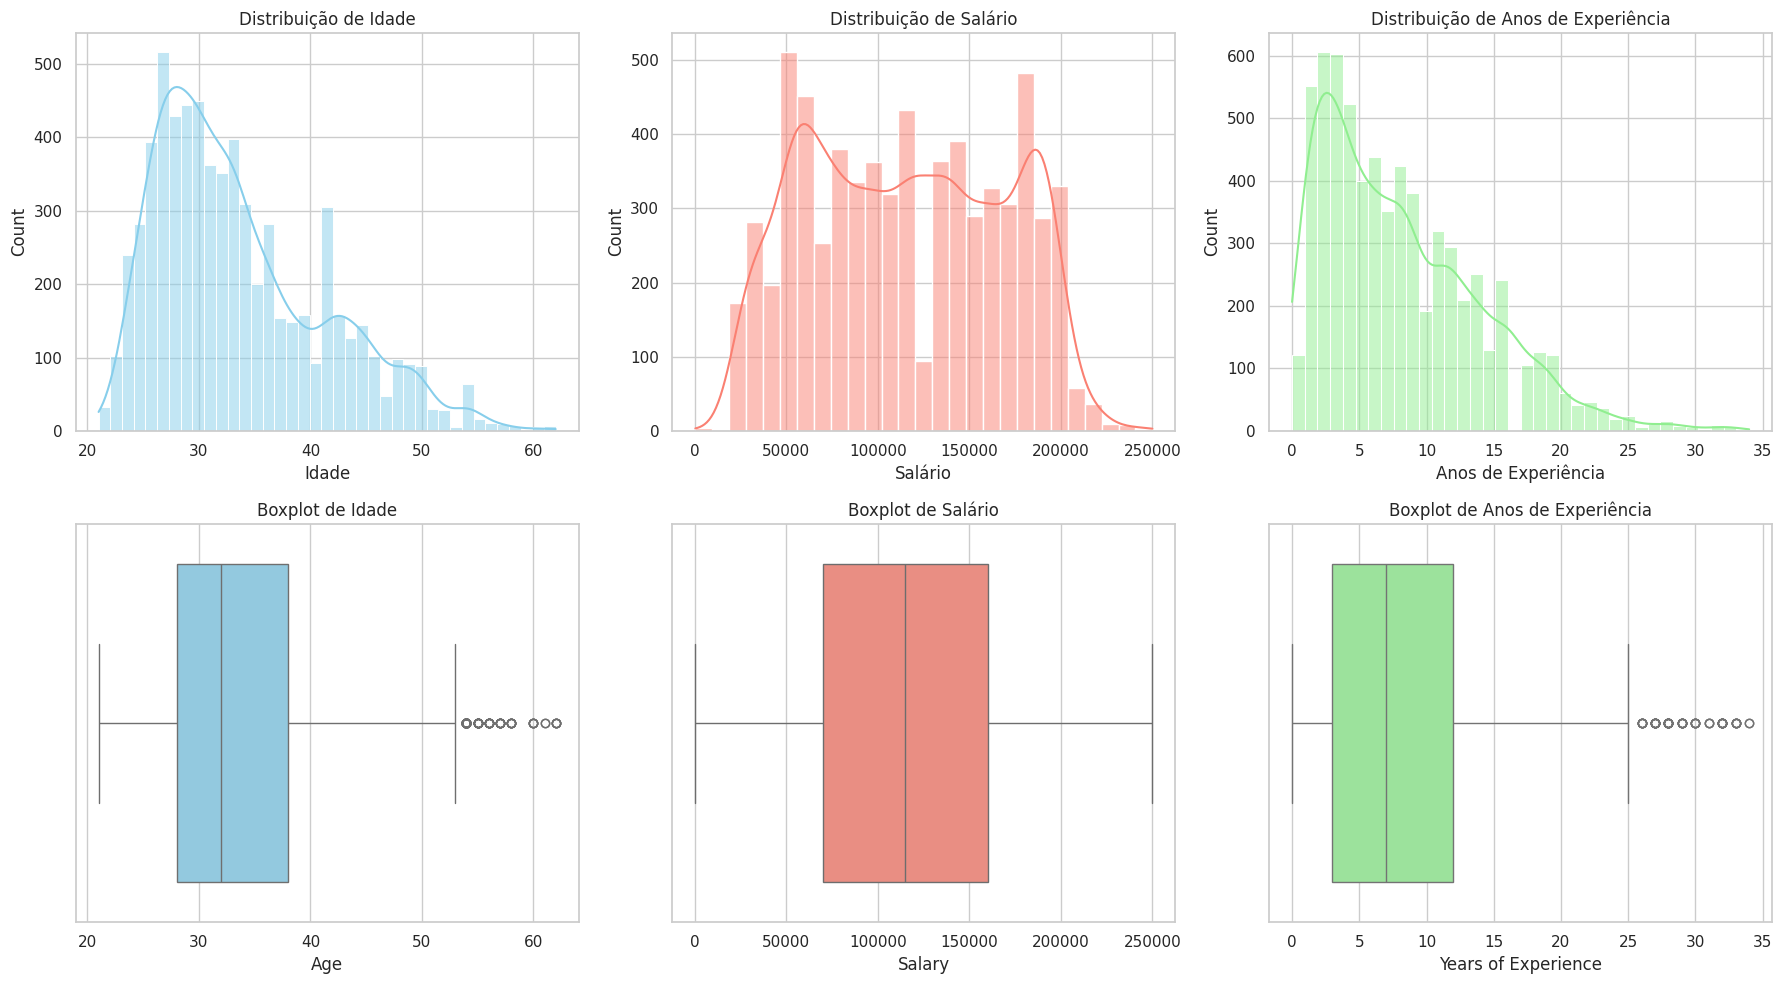

(               Age         Salary  Years of Experience
 count  6684.000000    6684.000000          6684.000000
 mean     33.610563  115307.175194             8.077723
 std       7.595994   52806.810881             6.029305
 min      21.000000     350.000000             0.000000
 25%      28.000000   70000.000000             3.000000
 50%      32.000000  115000.000000             7.000000
 75%      38.000000  160000.000000            12.000000
 max      62.000000  250000.000000            34.000000,
 Gender
 Male      3671
 Female    3013
 Name: count, dtype: int64,
 Country
 USA          1356
 China        1339
 Australia    1335
 UK           1332
 Canada       1322
 Name: count, dtype: int64,
 Job Title
 Software Engineer            809
 Data Scientist               515
 Data Analyst                 391
 Software Engineer Manager    376
 Product Manager              323
 Project Engineer             317
 Marketing Manager            315
 Full Stack Engineer          304
 Back end De

In [ ]:
# Configuração do estilo de visualização
sns.set(style="whitegrid")

# Análise de Distribuição - Histogramas e Boxplots para Idade, Salário e Anos de Experiência
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograma para Idade
sns.histplot(datasetSalary['Age'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribuição de Idade')
axes[0, 0].set_xlabel('Idade')

# Histograma para Salário
sns.histplot(datasetSalary['Salary'], kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title('Distribuição de Salário')
axes[0, 1].set_xlabel('Salário')

# Histograma para Anos de Experiência
sns.histplot(datasetSalary['Years of Experience'], kde=True, ax=axes[0, 2], color="lightgreen")
axes[0, 2].set_title('Distribuição de Anos de Experiência')
axes[0, 2].set_xlabel('Anos de Experiência')

# Boxplot para Idade
sns.boxplot(x=datasetSalary['Age'], ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title('Boxplot de Idade')

# Boxplot para Salário
sns.boxplot(x=datasetSalary['Salary'], ax=axes[1, 1], color="salmon")
axes[1, 1].set_title('Boxplot de Salário')

# Boxplot para Anos de Experiência
sns.boxplot(x=datasetSalary['Years of Experience'], ax=axes[1, 2], color="lightgreen")
axes[1, 2].set_title('Boxplot de Anos de Experiência')

plt.tight_layout()
plt.show()

# Estatísticas Básicas (Média, Mediana, Desvio Padrão, Quartis)
estatisticas_descritivas = datasetSalary[['Age', 'Salary', 'Years of Experience', 'Race']].describe()

# Análise de Frequência para Colunas Categóricas
frequencia_genero = datasetSalary['Gender'].value_counts()
frequencia_pais = datasetSalary['Country'].value_counts()
frequencia_cargo = datasetSalary['Job Title'].value_counts()
frequencia_raca = datasetSalary['Race'].value_counts()

estatisticas_descritivas, frequencia_genero, frequencia_pais, frequencia_cargo.head(10), frequencia_raca  # Exibindo os 10 principais cargos para brevidade

## Análise de Correlação entre Variáveis Numéricas do Dataset `datasetSalary`

Para investigar a relação entre as variáveis numéricas do dataset `datasetSalary`, realizamos uma análise de correlação. Este processo ajuda a identificar quais variáveis estão mais associadas entre si, fornecendo insights sobre padrões e possíveis relações lineares.


Matriz de correlação:
                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.596380             0.937609  0.728343   
Education Level      0.596380         1.000000             0.613165  0.645444   
Years of Experience  0.937609         0.613165             1.000000  0.810942   
Salary               0.728343         0.645444             0.810942  1.000000   
Senior               0.334070         0.273466             0.317877  0.223636   

                       Senior  
Age                  0.334070  
Education Level      0.273466  
Years of Experience  0.317877  
Salary               0.223636  
Senior               1.000000  


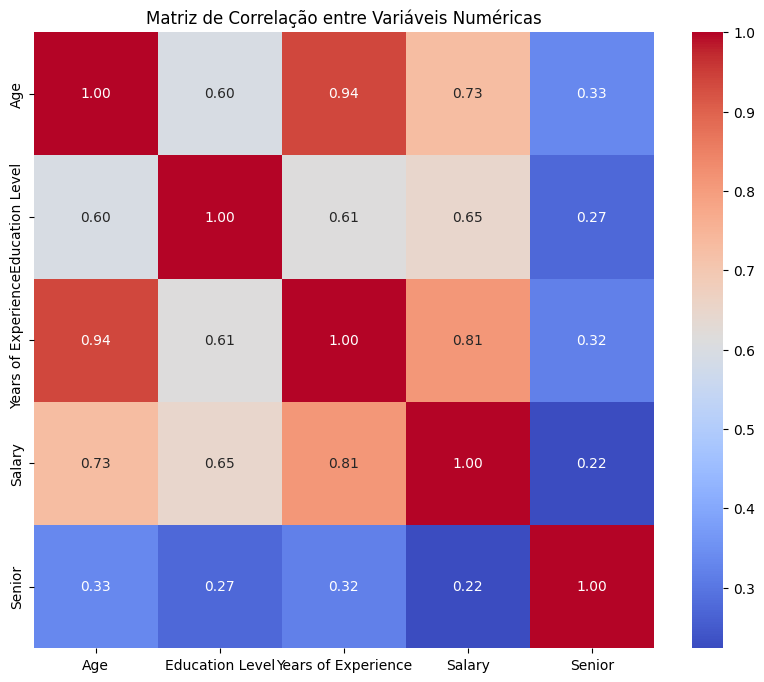

In [ ]:
# Selecionar colunas numéricas
numeric_data = datasetSalary.select_dtypes(include=['float64', 'int64'])
correlacoes = numeric_data.corr()

print("Matriz de correlação:")
print(correlacoes)

# Visualizar a correlação com heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


# Cálculo de Correlação entre Salário e Anos de Experiência

Neste trecho de código, utilizamos a biblioteca `scipy.stats` para calcular a correlação de Pearson entre duas variáveis numéricas: **Salário** e **Anos de Experiência**. A correlação de Pearson mede a força e a direção de uma relação linear entre duas variáveis.

In [ ]:
from scipy.stats import pearsonr

# Calcular correlação e valor p entre Salário e uma outra variável numérica (exemplo: Anos de Experiência)
correlation, p_value = pearsonr(datasetSalary['Salary'], datasetSalary['Years of Experience'])

print(f"Coeficiente de Correlação: {correlation:.3f}")
print(f"Valor p: {p_value:.3f}")
if p_value < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Coeficiente de Correlação: 0.811
Valor p: 0.000
A correlação é estatisticamente significativa.


# Análise de Proporção de Cargos e Raças

Neste trecho de código, utilizamos a biblioteca `matplotlib` para visualizar a distribuição dos principais cargos e raças no conjunto de dados **datasetSalary**. Gráficos de pizza são utilizados para representar a proporção de cada categoria em relação ao total.

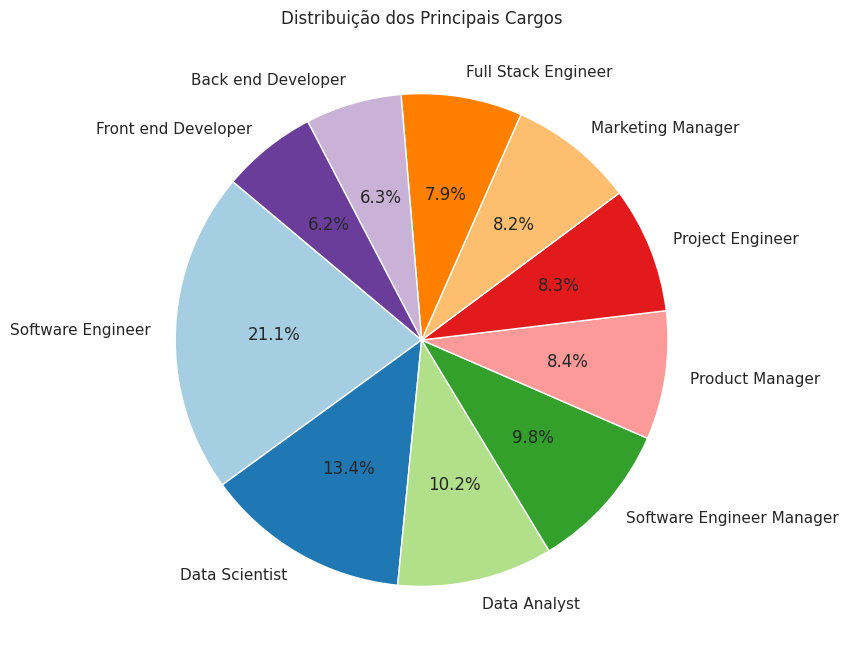

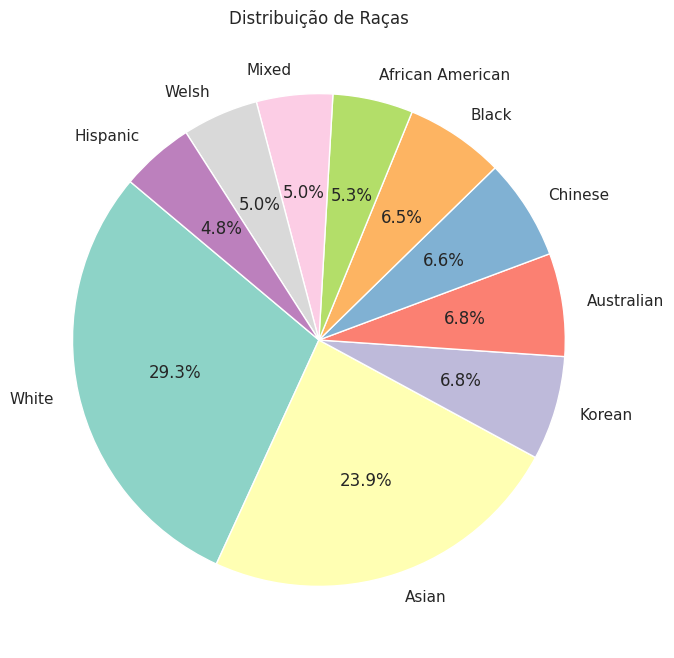

In [ ]:
# Proporção de cargos
job_counts = datasetSalary['Job Title'].value_counts().head(10)  # Os 10 cargos mais comuns
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribuição dos Principais Cargos")
plt.show()

# Proporção de raças
race_counts = datasetSalary['Race'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribuição de Raças")
plt.show()


# Análise de Distribuição de Salários por Cargo

Neste trecho de código, utilizamos a biblioteca `seaborn` e `matplotlib` para visualizar a distribuição dos salários dos cinco cargos mais comuns no conjunto de dados **datasetSalary**. Um histograma é gerado para cada cargo, mostrando a frequência dos salários e a curva de densidade (KDE).

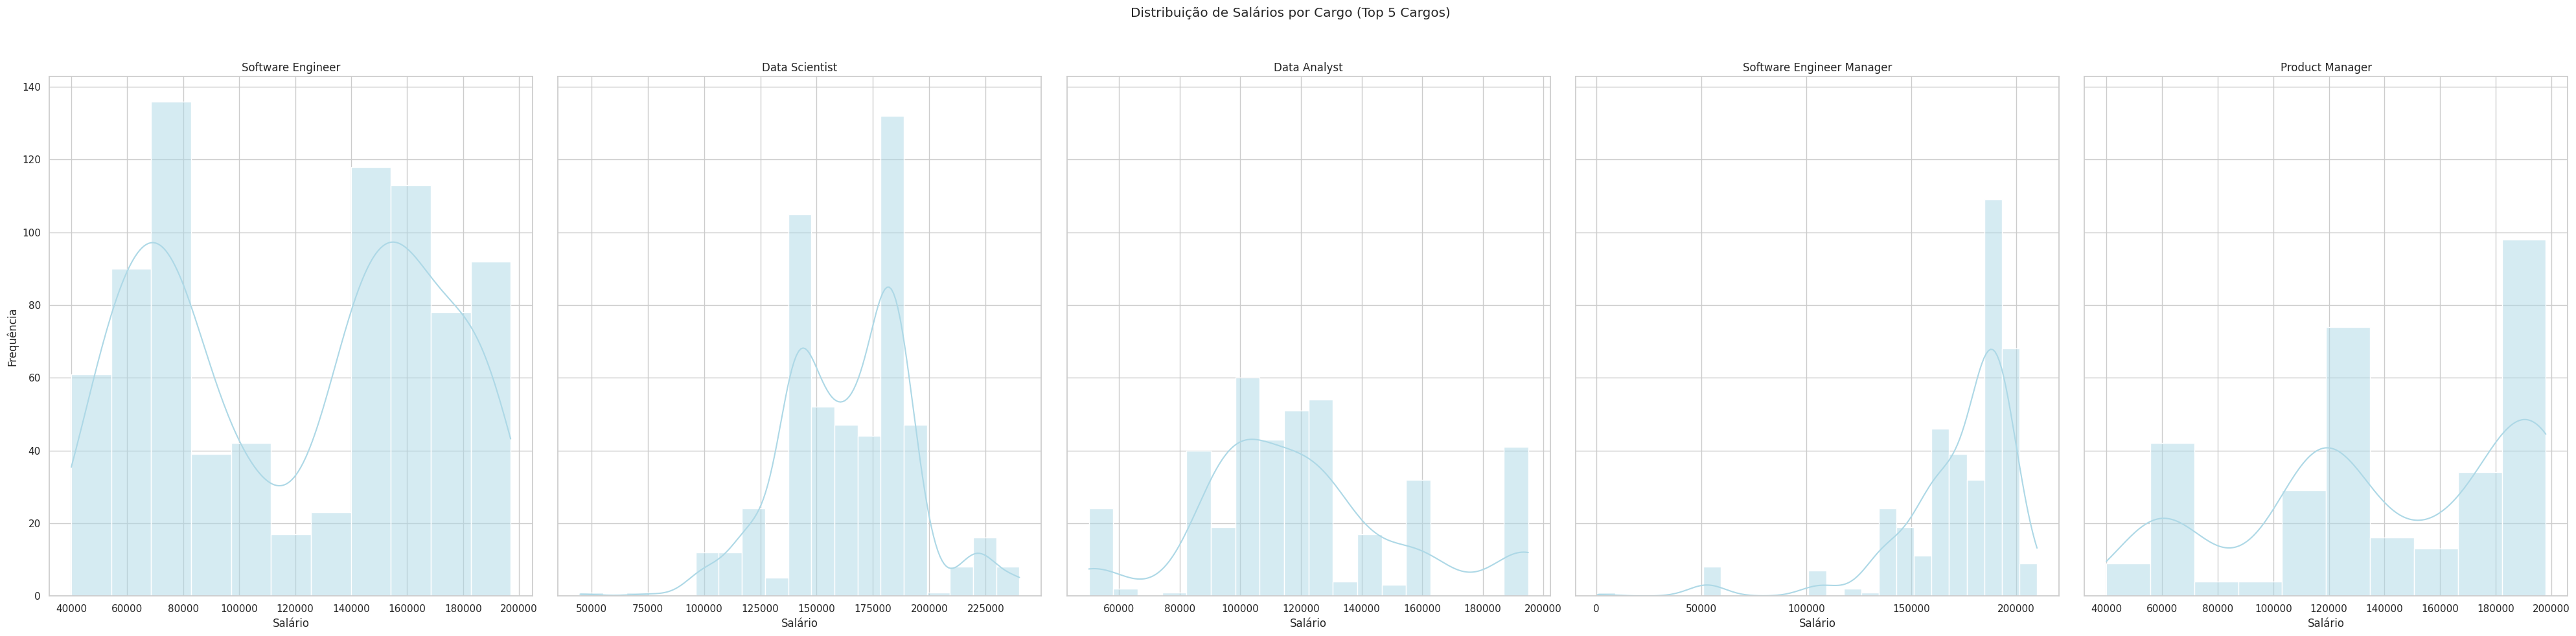

In [ ]:
top_job_titles = datasetSalary['Job Title'].value_counts().head(5).index
data_top_jobs = datasetSalary[datasetSalary['Job Title'].isin(top_job_titles)]

# Plotar histograma de salários por cargo
fig, axes = plt.subplots(1, 5, figsize=(40, 10), sharey=True)

for i, job in enumerate(top_job_titles):
    sns.histplot(data_top_jobs[data_top_jobs['Job Title'] == job]['Salary'],
                 kde=True, ax=axes[i], color="lightblue")
    axes[i].set_title(f'{job}')
    axes[i].set_xlabel('Salário')
    axes[i].set_ylabel('Frequência' if i == 0 else "")

plt.suptitle("Distribuição de Salários por Cargo (Top 5 Cargos)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Análise de Distribuição Salarial por Raça e Cargo

Neste trecho de código, utilizamos a biblioteca `seaborn` e `matplotlib` para visualizar a distribuição de salários em relação à raça e ao cargo. São apresentados boxplots e um gráfico de barras para analisar as médias salariais.

## Boxplot de Salário por Raça

- **Visualização**: Um boxplot é criado para representar a distribuição dos salários com base na raça. Essa visualização permite identificar mediana, quartis e potenciais outliers, facilitando a análise das disparidades salariais entre diferentes grupos raciais.

## Boxplot de Salário por Cargo e Raça

- **Visualização**: Um segundo boxplot é gerado para representar a distribuição de salários, agora segmentado pelos cinco cargos mais comuns e diferenciado por raça. Essa análise ajuda a observar como os salários variam não apenas por raça, mas também em função do cargo, oferecendo uma perspectiva mais detalhada sobre a intersecção entre raça e ocupação.

## Média Salarial por Cargo e Raça

- **Visualização**: Um gráfico de barras é utilizado para mostrar a média salarial agrupada por cargo e raça. Essa análise quantitativa permite entender melhor as diferenças salariais entre os grupos raciais dentro de cada cargo, facilitando a identificação de possíveis desigualdades.


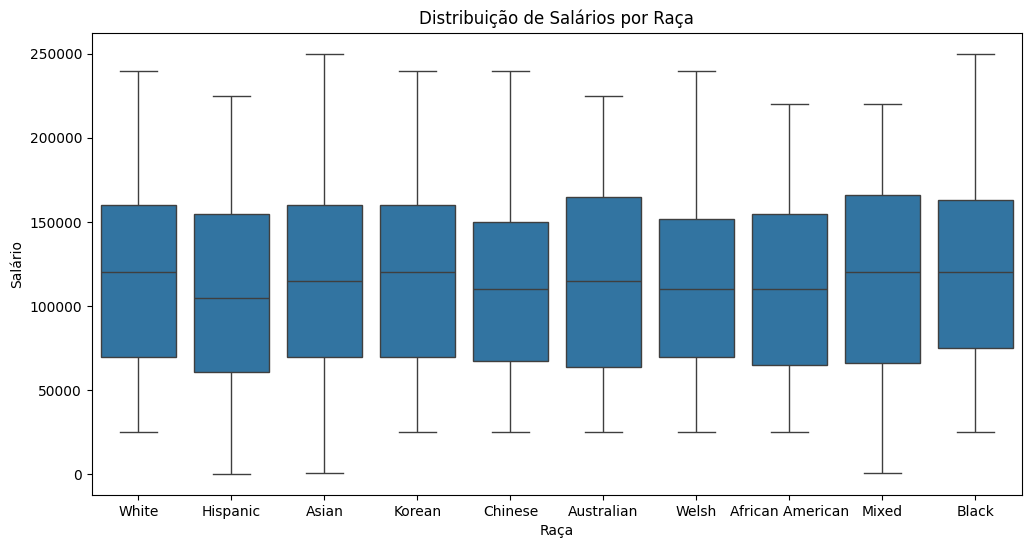

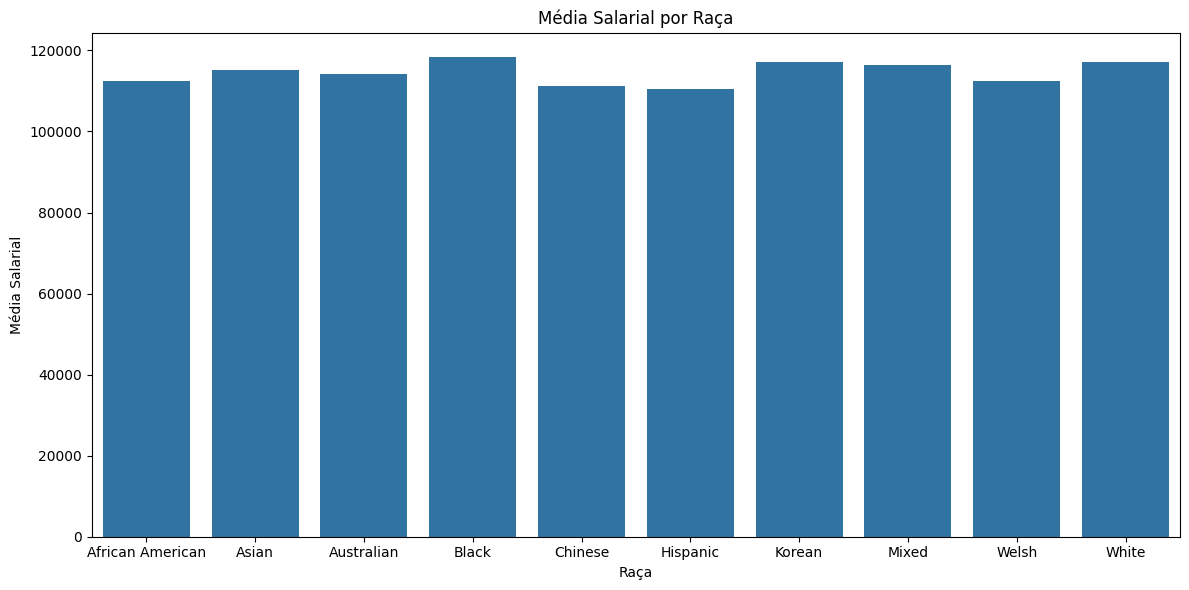

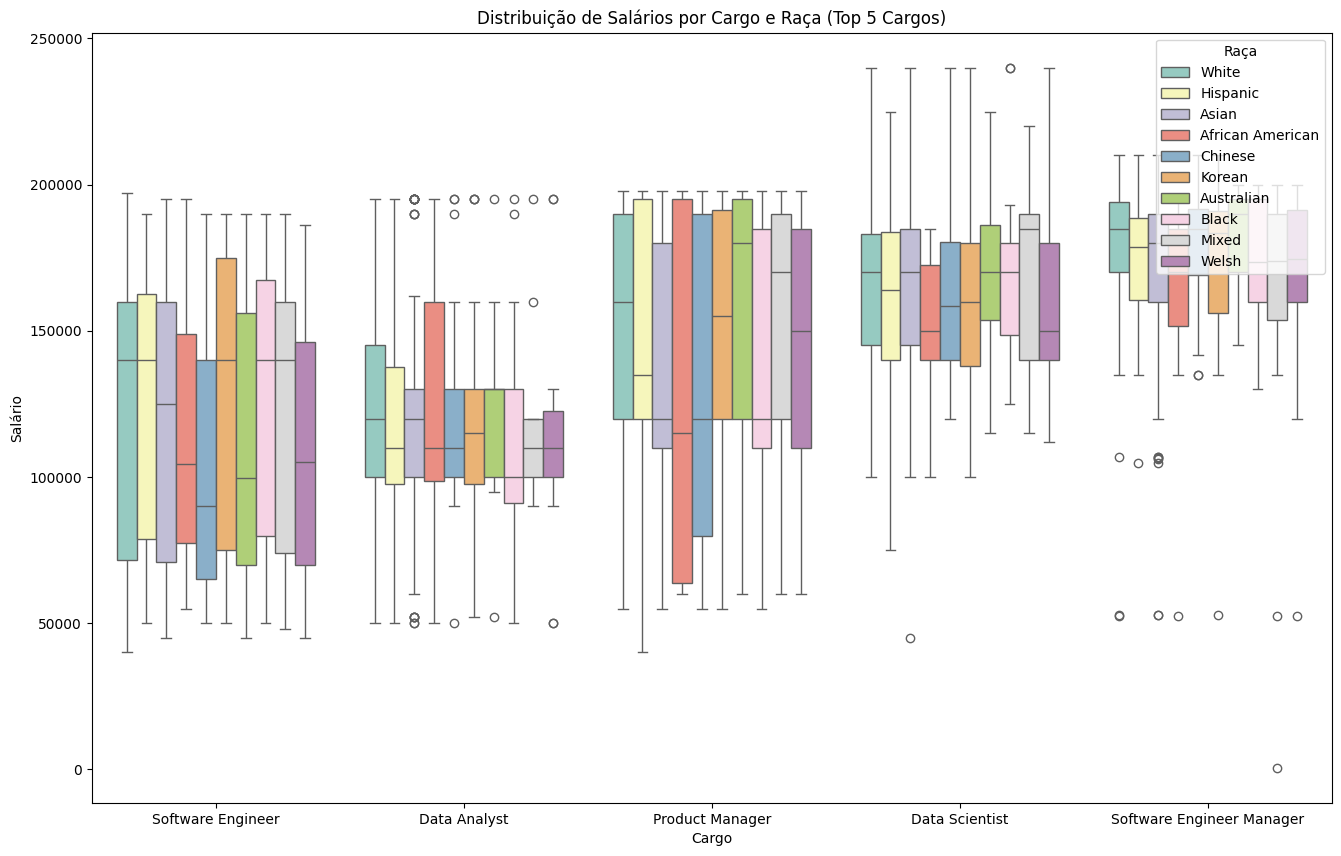

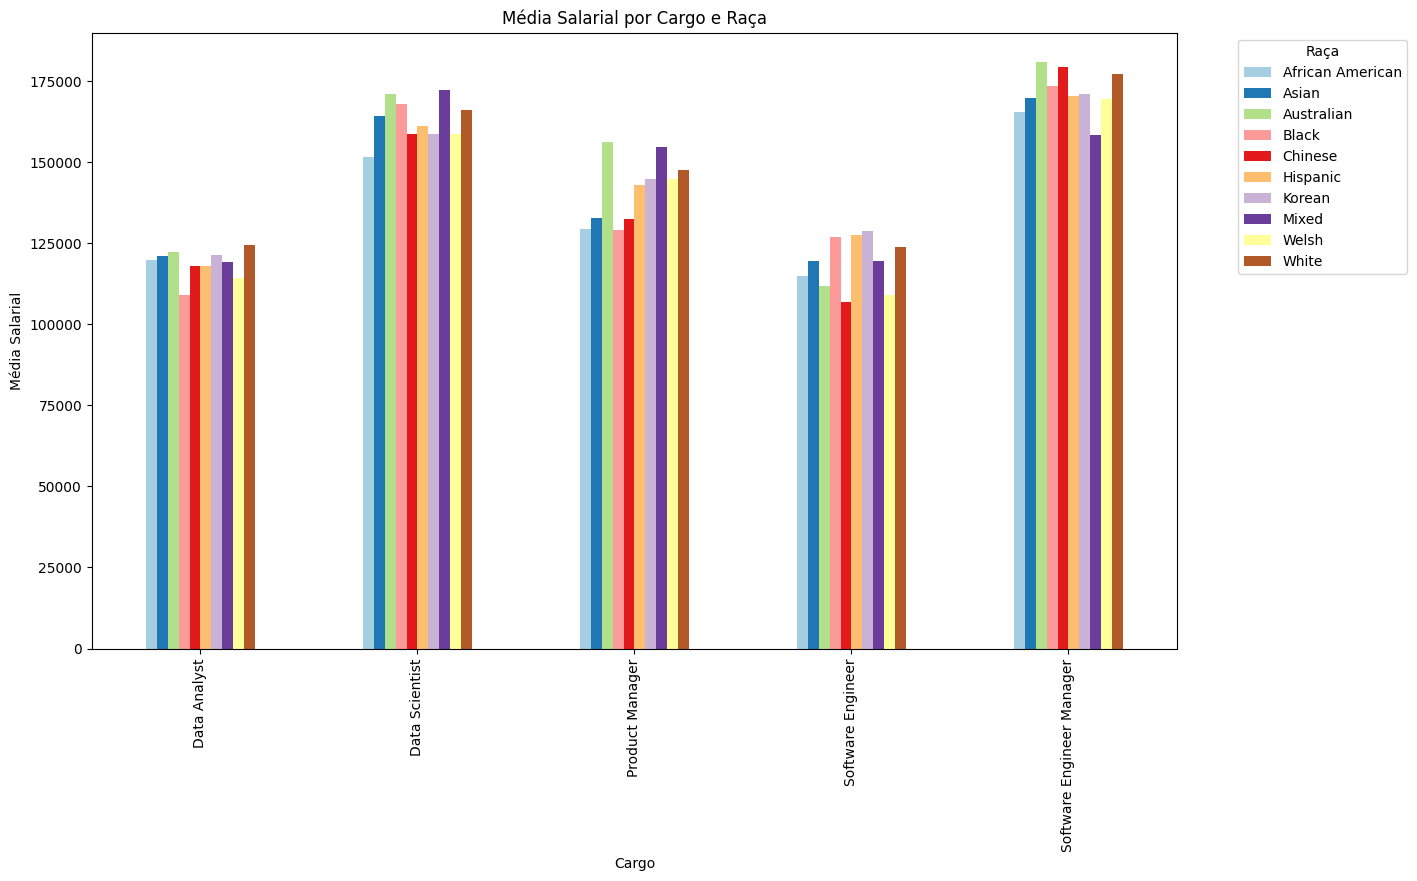

In [ ]:
# Boxplot de Salário por Raça
plt.figure(figsize=(12, 6))
sns.boxplot(x='Race', y='Salary', data=datasetSalary, legend=False)
plt.title("Distribuição de Salários por Raça")
plt.xlabel("Raça")
plt.ylabel("Salário")
plt.show()

mean_salary_by_race = datasetSalary.groupby('Race')['Salary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_salary_by_race, x='Race', y='Salary', legend=False)
plt.title("Média Salarial por Raça")
plt.xlabel("Raça")
plt.ylabel("Média Salarial")
plt.tight_layout()
plt.show()

# Boxplot de Salário por Cargo e Raça (focando nos 5 cargos mais comuns)
top_job_titles = datasetSalary['Job Title'].value_counts().head(5).index
data_top_jobs = datasetSalary[datasetSalary['Job Title'].isin(top_job_titles)]

plt.figure(figsize=(16, 10))
sns.boxplot(x='Job Title', y='Salary', hue='Race', data=data_top_jobs, palette="Set3")
plt.title("Distribuição de Salários por Cargo e Raça (Top 5 Cargos)")
plt.xlabel("Cargo")
plt.ylabel("Salário")
plt.legend(title="Raça", loc="upper right")
plt.show()

# Média Salarial por Cargo e Raça
mean_salary_by_race_job = data_top_jobs.groupby(['Job Title', 'Race'])['Salary'].mean().unstack()
mean_salary_by_race_job.plot(kind='bar', figsize=(14, 8), colormap="Paired")
plt.title("Média Salarial por Cargo e Raça")
plt.xlabel("Cargo")
plt.ylabel("Média Salarial")
plt.legend(title="Raça", bbox_to_anchor=(1.05, 1))
plt.show()

# Análise da Relação entre Idade, Anos de Experiência e Salário

Neste conjunto de visualizações, utilizamos a biblioteca `seaborn` e `matplotlib` para explorar as relações entre diferentes variáveis numéricas no conjunto de dados, com foco especial em como a idade e os anos de experiência influenciam os salários.

## Gráfico de Dispersão: Relação entre Idade e Salário

- **Visualização**: Um gráfico de dispersão é criado para representar a relação entre idade e salário, com os pontos coloridos de acordo com o gênero dos indivíduos.
- **Objetivo**: Essa visualização permite observar como os salários se distribuem em função da idade e se existem diferenças significativas entre os gêneros em termos de salário.

## Gráfico de Dispersão: Relação entre Anos de Experiência e Salário

- **Visualização**: Um segundo gráfico de dispersão é gerado, desta vez mostrando a relação entre os anos de experiência e o salário, com os pontos coloridos conforme o nível de escolaridade.
- **Objetivo**: Essa análise busca identificar padrões e tendências, como o impacto dos anos de experiência na variação salarial e se a escolaridade desempenha um papel significativo nessas variações.

## Gráfico de Dispersão: Relação entre Idade e Anos de Experiência

- **Visualização**: Um terceiro gráfico de dispersão explora a relação entre idade e anos de experiência, utilizando uma codificação por cores para indicar se o indivíduo é sênior ou não.
- **Objetivo**: Este gráfico permite analisar a correlação entre a idade e a experiência acumulada, fornecendo insights sobre como a progressão na carreira pode estar relacionada ao aumento da idade.


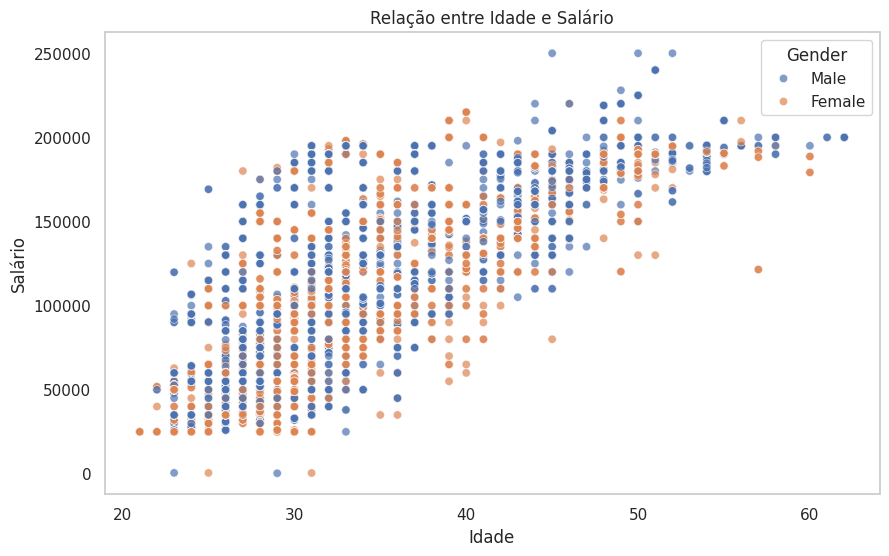

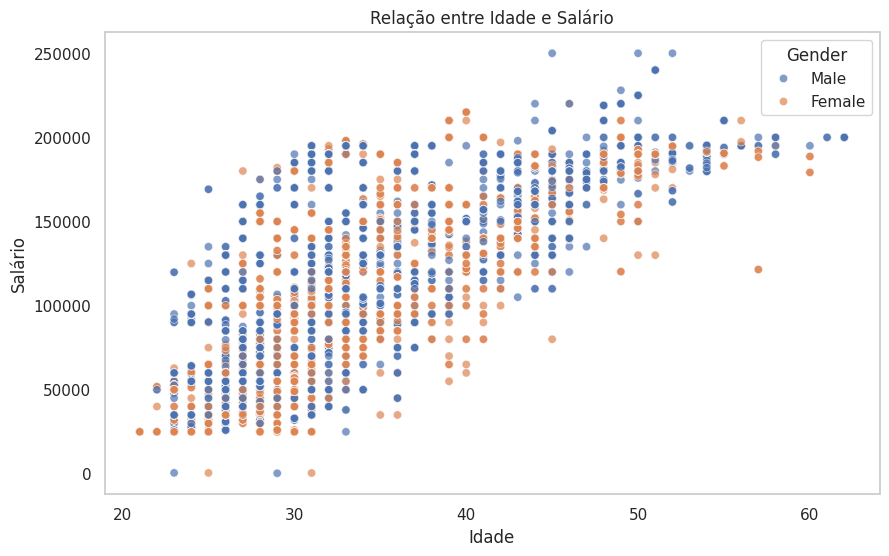

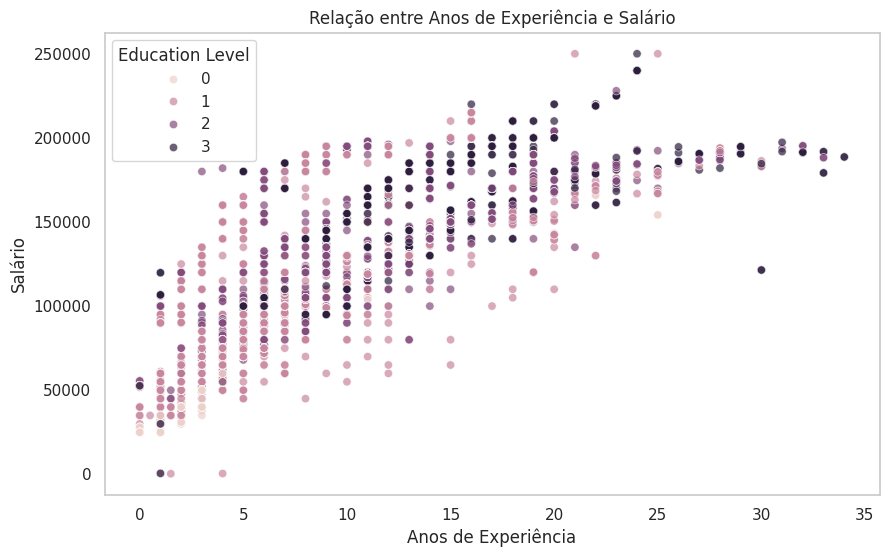

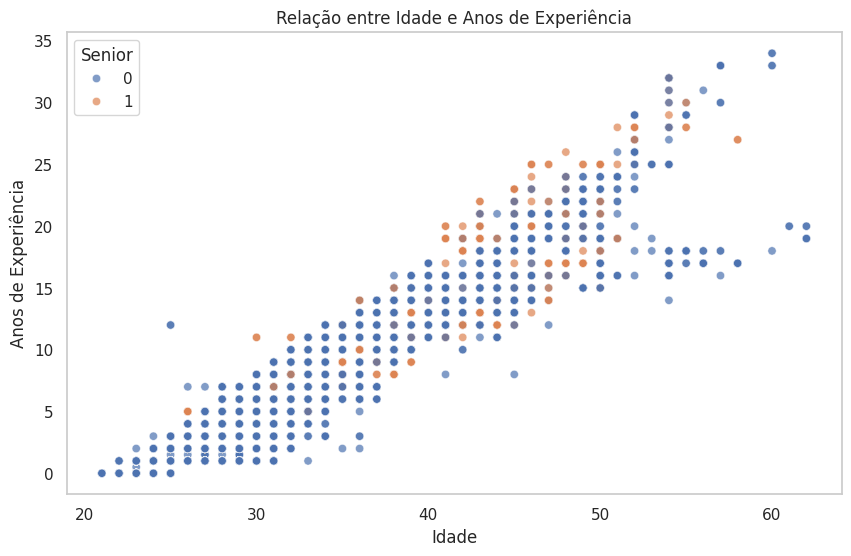

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=datasetSalary, hue='Gender', alpha=0.7)
plt.title('Relação entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=datasetSalary, hue='Gender', alpha=0.7)
plt.title('Relação entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=datasetSalary, hue='Education Level', alpha=0.7)
plt.title('Relação entre Anos de Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Years of Experience', data=datasetSalary, hue='Senior', alpha=0.7)
plt.title('Relação entre Idade e Anos de Experiência')
plt.xlabel('Idade')
plt.ylabel('Anos de Experiência')
plt.grid()
plt.show()

# Análise Descritiva da Distribuição Salarial

Neste segmento da análise, abordo a distribuição salarial de acordo com o gênero e a raça dos indivíduos, utilizando métodos estatísticos descritivos, visualizações gráficas e testes de hipóteses.

## Estatísticas Descritivas

- **Objetivo**: Utilizamos o método `describe()` do Pandas para calcular estatísticas descritivas como contagem, média, desvio padrão, mínimo, máximo, e quartis do salário, agrupando os dados por gênero e raça.
- **Resultado**: As estatísticas geradas permitem entender a distribuição do salário em diferentes subgrupos, identificando possíveis desigualdades.

                          count           mean           std      min  \
Gender Race                                                             
Female African American   151.0  103568.139073  50875.355264  25000.0   
       Asian              716.0  106380.923184  51471.601567    500.0   
       Australian         209.0  108245.014354  56868.527116  25000.0   
       Black              192.0  108602.208333  51760.354032  25000.0   
       Chinese            196.0  106422.709184  54435.475310  25000.0   
       Hispanic           139.0  104509.158273  52770.152431  25000.0   
       Korean             215.0  110948.144186  50354.180698  25000.0   
       Mixed              145.0  108091.310345  57155.949156    550.0   
       Welsh              165.0  108379.775758  50244.734140  25000.0   
       White              885.0  109595.268927  53236.950598  25000.0   
Male   African American   201.0  118956.572139  49677.475611  25000.0   
       Asian              883.0  122434.531144  520

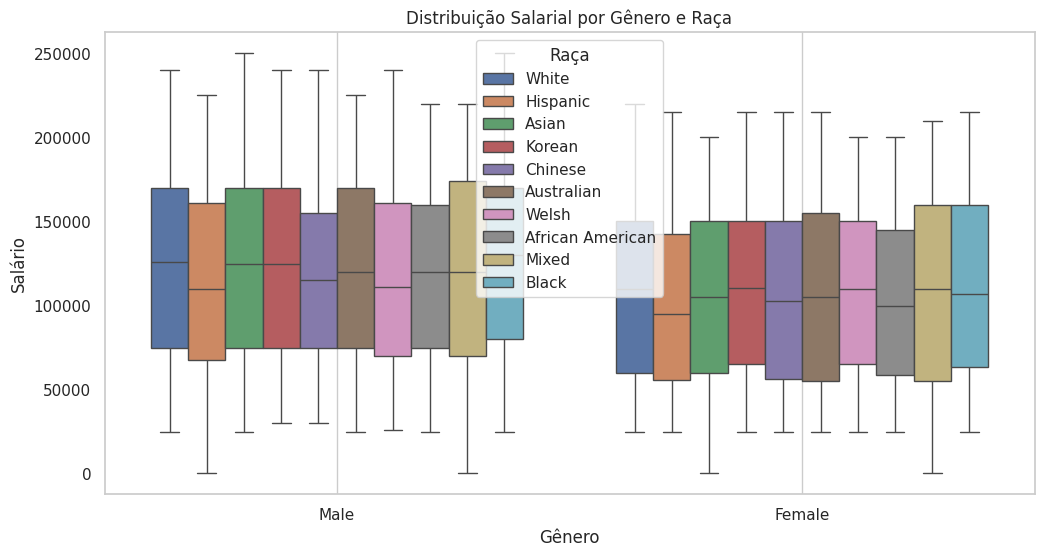

ANOVA results: F-statistic = 110.02553365094974, p-value = 1.5264743340371342e-25


In [ ]:
# Análise descritiva
descriptive_stats = datasetSalary.groupby(['Gender', 'Race'])['Salary'].describe()
print(descriptive_stats)

# Visualização: Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', hue='Race', data=datasetSalary)
plt.title('Distribuição Salarial por Gênero e Raça')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.grid()
plt.legend(title='Raça')
plt.show()

# Teste de ANOVA para verificar diferenças salariais
anova_results = stats.f_oneway(
    datasetSalary[datasetSalary['Gender'] == 'Female']['Salary'],
    datasetSalary[datasetSalary['Gender'] == 'Male']['Salary']
)

print(f"ANOVA results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

# Análise de Diferenças Salariais entre Gêneros

Neste trecho de código, analisamos a diferença salarial entre homens e mulheres utilizando um teste t para duas amostras independentes. Este teste é útil para determinar se as médias de duas populações diferentes (neste caso, salários de homens e mulheres) são estatisticamente diferentes.

## Separação de Salários por Gênero

- **Objetivo**: Filtrar os dados para obter os salários de homens e mulheres separadamente.
- **Implementação**: Utilizamos a indexação do Pandas para criar duas variáveis, `salario_homens` e `salario_mulheres`, que contêm os salários correspondentes a cada gênero.

In [ ]:
# Separar salários por gênero
salario_homens = datasetSalary[datasetSalary['Gender'] == 'Male']['Salary']
salario_mulheres = datasetSalary[datasetSalary['Gender'] == 'Female']['Salary']

# Teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(salario_homens, salario_mulheres, equal_var=False)

print(f"Estatística t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")
if p_value < 0.05:
    print("Diferença significativa de salário entre gêneros.")
else:
    print("Não há diferença significativa de salário entre gêneros.")

Estatística t: 10.477
Valor p: 0.000
Diferença significativa de salário entre gêneros.


# Análise de Variância (ANOVA) para Salários

Neste trecho de código, utilizamos a Análise de Variância (ANOVA) para investigar se existem diferenças significativas nos salários com base em dois fatores: senioridade e nível educacional. A ANOVA é uma técnica estatística que permite comparar as médias de três ou mais grupos.

## ANOVA para Salário com Base na Senioridade

- **Objetivo**: Determinar se há diferenças significativas nos salários entre diferentes níveis de senioridade (por exemplo, júnior, pleno e sênior).
- **Implementação**: A função `f_oneway` da biblioteca `scipy.stats` é utilizada para realizar o teste ANOVA. O código cria uma lista de salários para cada nível de senioridade e passa essa lista como argumento para a função.
- **Resultados**: O código imprime a estatística F e o valor p resultante do teste ANOVA.

In [ ]:
# ANOVA para salário com base na Senioridade
anova_senioridade = stats.f_oneway(*(datasetSalary[datasetSalary['Senior'] == level]['Salary'] for level in datasetSalary['Senior'].unique()))
print(f"ANOVA para Senioridade - F: {anova_senioridade.statistic:.3f}, p-valor: {anova_senioridade.pvalue:.3f}")

# ANOVA para salário com base no Nível Educacional
anova_educacao = stats.f_oneway(*(datasetSalary[datasetSalary['Education Level'] == level]['Salary'] for level in datasetSalary['Education Level'].unique()))
print(f"ANOVA para Nível Educacional - F: {anova_educacao.statistic:.3f}, p-valor: {anova_educacao.pvalue:.3f}")


ANOVA para Senioridade - F: 351.782, p-valor: 0.000
ANOVA para Nível Educacional - F: 1661.584, p-valor: 0.000


# Boxplot da Distribuição Salarial por Gênero

Neste trecho de código, utilizamos um boxplot para visualizar a distribuição dos salários em função do gênero dos funcionários. Os boxplots são uma ferramenta eficaz para resumir dados, permitindo observar a mediana, quartis e potenciais outliers.

## Objetivo

- **Analisar a Distribuição Salarial**: O objetivo é comparar a distribuição salarial entre os gêneros, identificando possíveis diferenças salariais e outliers.

## Implementação

O código a seguir utiliza a biblioteca Seaborn para criar um boxplot que mostra os salários agrupados por gênero.

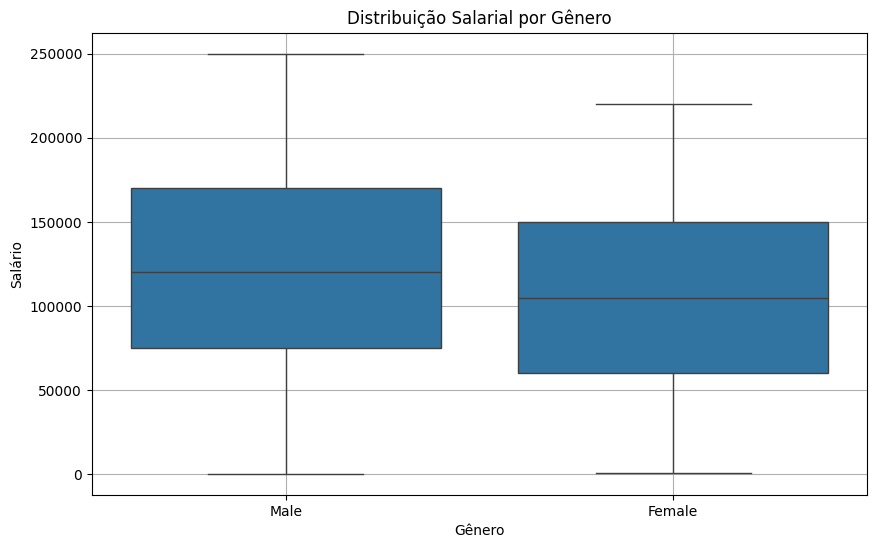

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=datasetSalary)
plt.title('Distribuição Salarial por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.grid()
plt.show()

# Análise de Variância (ANOVA) e Teste de Tukey para Salários por Gênero e Raça

Este código aplica uma análise de variância (ANOVA) e um teste de comparações múltiplas de Tukey para avaliar diferenças salariais com base no gênero e raça dos indivíduos.

## Objetivo

- **Avaliar Diferenças Salariais**: A ANOVA é utilizada para determinar se há diferenças estatisticamente significativas nos salários quando consideramos gênero e raça.
- **Comparações Múltiplas**: O teste de Tukey é aplicado para identificar entre quais grupos (combinando gênero e raça) as diferenças salariais são significativas.

## Implementação

O código a seguir utiliza a biblioteca `statsmodels` para ajustar um modelo ANOVA e, em seguida, aplicar o teste de Tukey para comparações múltiplas.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ajustar um modelo ANOVA
model = ols('Salary ~ C(Gender) + C(Race)', data=datasetSalary).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Realizar o teste de Tukey
tukey_results = pairwise_tukeyhsd(endog=datasetSalary['Salary'], groups=datasetSalary['Gender'] + " " + datasetSalary['Race'])
print(tukey_results)


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
         group1                 group2          meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------------------------------
Female African American          Female Asian   2812.7841    1.0 -13818.8704 19444.4387  False
Female African American     Female Australian   4676.8753    1.0 -15159.4182 24513.1688  False
Female African American          Female Black   5034.0693    1.0 -15167.2096 25235.3481  False
Female African American        Female Chinese   2854.5701    1.0 -17255.7563 22964.8965  False
Female African American       Female Hispanic    941.0192    1.0 -20890.0003 22772.0387  False
Female African American         Female Korean   7380.0051  0.999 -12339.8505 27099.8607  False
Female African American          Female Mixed   4523.1713    1.0 -17071.3844  26117.727  False
Female African American          Female Welsh   48

# Análise de Variância (ANOVA) e Teste de Tukey para Comparações Salariais com Gênero e Raça

Este código realiza uma análise descritiva de salários baseada nas variáveis **Gênero** e **Raça**. Ele utiliza um modelo ANOVA para identificar diferenças salariais significativas, seguido por um teste de comparações múltiplas de Tukey para explorar pares de grupos onde essas diferenças são significativas. Por fim, um gráfico de barras é gerado para visualizar as diferenças médias salariais para cada par comparado.

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                      group1       group2    meandiff   p-adj      lower  \
10   Female African American   Male Asian  18866.3921  0.0069  2510.9482   
12   Female African American   Male Black  22601.3013  0.0051  3355.8813   
18   Female African American   Male White  19623.2956  0.0027  3479.7749   
28              Female Asian   Male Asian  16053.6080  0.0000  6713.3631   
30              Female Asian   Male Black  19788.5171  0.0001  5999.9052   
33              Female Asian  Male Korean  16184.1099  0.0053  2374.2443   
34              Female Asian   Male Mixed  16271.2832  0.0209  1083.0321   
36              Female Asian   Male White  16810.5115  0.0000  7846.5343   
47         Female Australian   Male Black  17924.4260  0.0381   403.2267   
53         Female Australian   Male White  14946.4203  0.0229   902.9345   
69              Female Black   Male White  14589.2264  0.0486    34.7555   
76            Female Chinese   Male Asian  16011.8220  0.0160  1347.1205   
78          

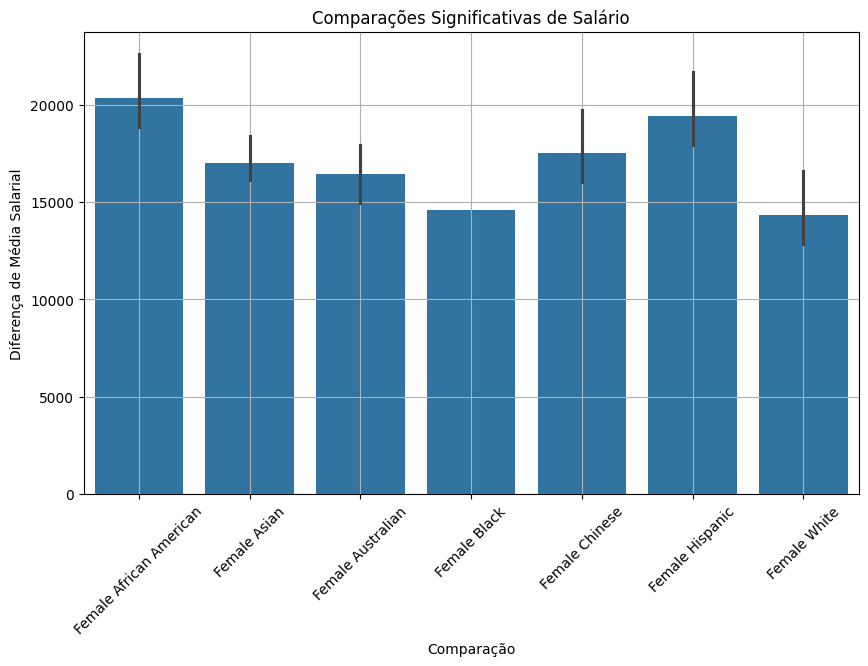

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ajustar um modelo ANOVA
model = ols('Salary ~ C(Gender) + C(Race)', data=datasetSalary).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Realizar o teste de Tukey
tukey_results = pairwise_tukeyhsd(endog=datasetSalary['Salary'], groups=datasetSalary['Gender'] + " " + datasetSalary['Race'])

# Criar um DataFrame a partir dos resultados do teste de Tukey
tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])

# Renomear as colunas
tukey_df.columns = ['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject']

# Filtrar apenas as comparações significativas
significant_comparisons = tukey_df[tukey_df['reject']]

# Exibir o DataFrame das comparações significativas
print(significant_comparisons)

# Criar um gráfico baseado nas comparações significativas
plt.figure(figsize=(10, 6))
sns.barplot(x='group1', y='meandiff', data=significant_comparisons)
plt.title('Comparações Significativas de Salário')
plt.xlabel('Comparação')
plt.ylabel('Diferença de Média Salarial')
plt.xticks(rotation=45)
plt.grid()
plt.show()


#Análise de normalidade das colunas numéricas de um dataset de salários usando gráficos Q-Q (Quantil-Quantil)

Este código realiza uma análise de normalidade das colunas numéricas de um dataset de salários usando gráficos Q-Q (Quantil-Quantil), que comparam a distribuição dos dados observados com uma distribuição teórica normal. A análise ajuda a verificar se as variáveis numéricas seguem uma distribuição normal, o que é útil para diversos testes estatísticos que assumem normalidade nos dados.

### Explicação do Procedimento

1. **Filtragem de Colunas Numéricas**:
   - Primeiramente, o código identifica e seleciona apenas as colunas numéricas do dataset. Essa filtragem evita a inclusão de colunas categóricas e texto na análise de normalidade.

2. **Loop para Geração dos Gráficos Q-Q**:
   - Para cada coluna numérica, o código executa as seguintes etapas:
     - Verifica se a coluna é de fato numérica e ignora colunas categóricas específicas, como nível educacional e senioridade, que não são relevantes para esta análise.
     - Limpa os dados, removendo valores nulos para garantir a precisão dos resultados.

3. **Plotagem dos Gráficos Q-Q**:
   - Utiliza-se a biblioteca `pingouin` para gerar os gráficos Q-Q, que plotam os quantis observados dos dados versus os quantis teóricos de uma distribuição normal.
   - Cada gráfico recebe um título correspondente ao nome da coluna, permitindo fácil identificação e interpretação visual de sua conformidade com a normalidade.


### Observações Importantes
- Colunas categóricas como **Nível Educacional** e **Senioridade** são ignoradas nesta análise, pois os gráficos Q-Q são específicos para variáveis contínuas e numéricas.

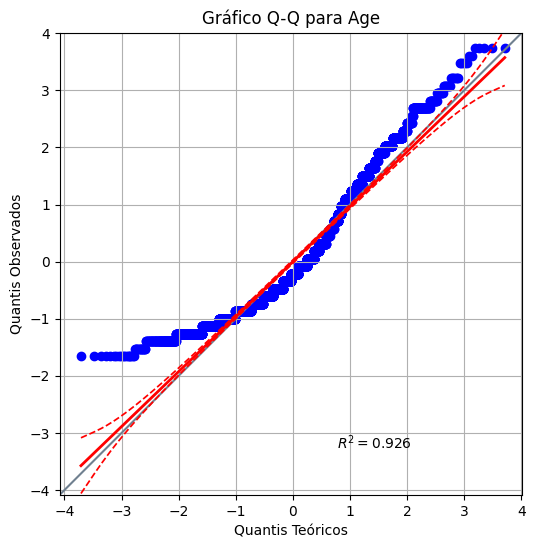

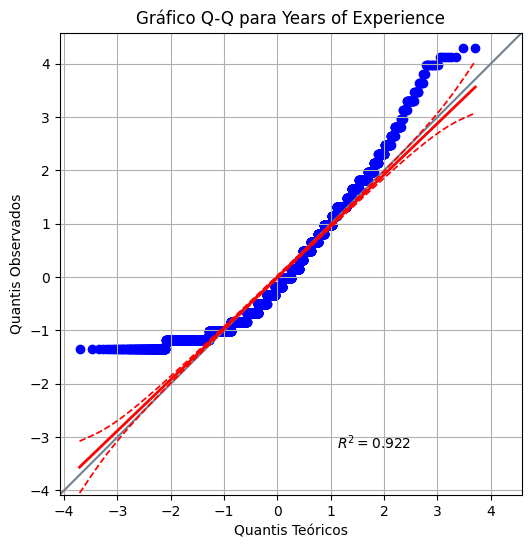

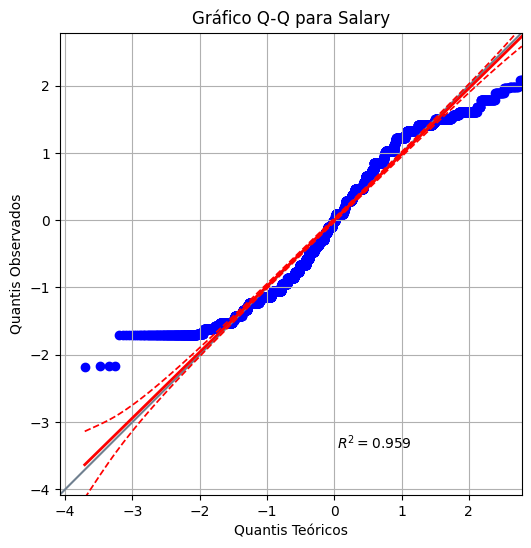

In [ ]:
# Filtrar apenas colunas numéricas
numerical_columns = datasetSalary.select_dtypes(include=['float64', 'int64']).columns

# Criar Gráficos Q-Q para cada coluna numérica
for campo in numerical_columns:
    # Verificar se a coluna é numérica
    if pd.api.types.is_numeric_dtype(datasetSalary[campo]):
      if campo == 'Education Level' or campo == 'Senior':
        continue
      # Limpar dados, removendo valores nulos
      data_clean = datasetSalary[campo].dropna()

      # Criar o gráfico Q-Q
      plt.figure(figsize=(10, 6))
      pg.qqplot(data_clean, dist='norm')
      plt.title(f'Gráfico Q-Q para {campo}')
      plt.xlabel('Quantis Teóricos')
      plt.ylabel('Quantis Observados')
      plt.grid()
      plt.show()
    else:
        print(f'A coluna {campo} não é numérica, portanto não será plotada.')


#Análise de Associação entre Gênero e Senioridade

Este código realiza uma análise de associação entre as variáveis categóricas "Gênero" e "Senioridade" presentes no conjunto de dados `datasetSalary`. A abordagem utiliza uma **tabela de contingência** e o **teste de Qui-quadrado** para verificar a existência de uma associação estatisticamente significativa entre essas duas variáveis.

#### Etapas da Análise

1. **Tabela de Contingência**:
   - É criada uma tabela de contingência que mostra a contagem de ocorrências para cada combinação de "Gênero" e "Senioridade". Isso permite visualizar a distribuição conjunta dessas variáveis.

2. **Teste de Qui-quadrado**:
   - O teste de Qui-quadrado é aplicado à tabela de contingência para determinar se existe uma associação significativa entre as variáveis. Ele compara as frequências observadas com as frequências esperadas sob a hipótese nula de que não há associação.


In [ ]:
# Tabela de contingência
contingencia = pd.crosstab(datasetSalary['Gender'], datasetSalary['Senior'])

# Teste Qui-quadrado
chi2_stat, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Estatística Qui-quadrado: {chi2_stat:.3f}")
print(f"p-valor: {p:.3f}")
if p < 0.05:
    print("Há uma associação significativa entre Gênero e Senioridade.")
else:
    print("Não há associação significativa entre Gênero e Senioridade.")


Estatística Qui-quadrado: 9.868
p-valor: 0.002
Há uma associação significativa entre Gênero e Senioridade.


#Análise da Distribuição de Gênero, Salário, Senioridade

Este código gera uma série de visualizações que analisam a distribuição de gênero e o salário em relação à senioridade, nível educacional e cargo. Através de gráficos de contagem e gráficos de barras, é possível observar as diferenças de gênero em várias categorias.

#### 1. Distribuição de Gênero por Senioridade
- **Descrição**: Um gráfico de contagem que mostra a distribuição de gênero para diferentes níveis de senioridade. Utiliza uma paleta de cores "Set2" para facilitar a distinção entre os gêneros.
- **Objetivo**: Visualizar a quantidade de homens e mulheres em cada nível de senioridade.

#### 2. Distribuição de Gênero por Nível Educacional
- **Descrição**: Um gráfico de contagem que apresenta a distribuição de gênero em relação ao nível educacional. A paleta "Accent" é utilizada para representar as categorias.
- **Objetivo**: Analisar como o gênero está distribuído entre os diferentes níveis educacionais.

#### 3. Distribuição de Gênero por Cargo (Top 5 Cargos Mais Comuns)
- **Descrição**: Um gráfico de contagem que representa a distribuição de gênero nos cinco cargos mais comuns. Os dados são filtrados para incluir apenas esses cargos, utilizando a paleta "Set1".
- **Objetivo**: Identificar as contagens de homens e mulheres em relação aos cargos mais frequentes na empresa.

#### 4. Salário Médio por Gênero, Senioridade e Nível Educacional
- **Descrição**: Um gráfico de barras que mostra o salário médio de homens e mulheres com base na senioridade e no nível educacional. Este gráfico utiliza a função `catplot` para facilitar a visualização.
- **Objetivo**: Comparar os salários médios por gênero, considerando a senioridade e o nível educacional.

#### 5. Salário Médio por Gênero e Cargo (Top 5 Cargos)
- **Descrição**: Um gráfico de barras que apresenta o salário médio de homens e mulheres nos cinco cargos mais comuns. A paleta "Paired" é utilizada para distinguir os gêneros.
- **Objetivo**: Analisar as diferenças salariais por gênero nos principais cargos da empresa.

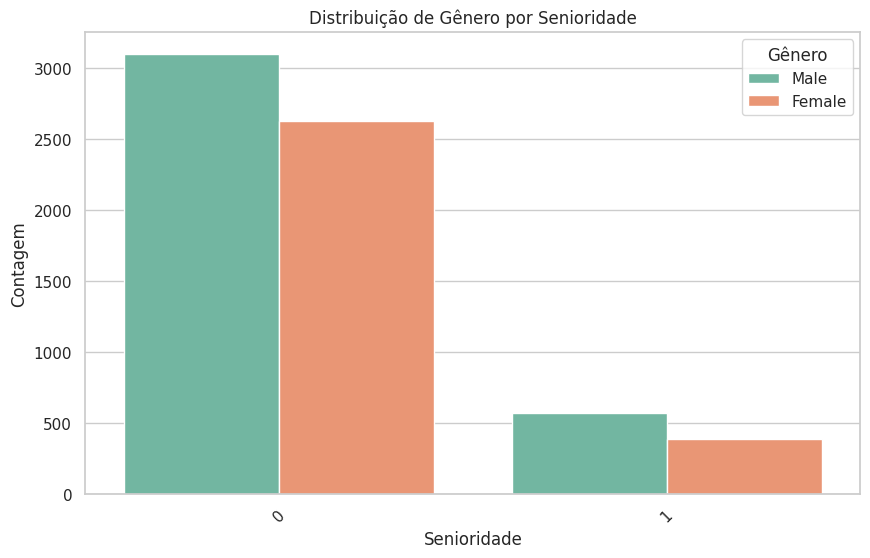

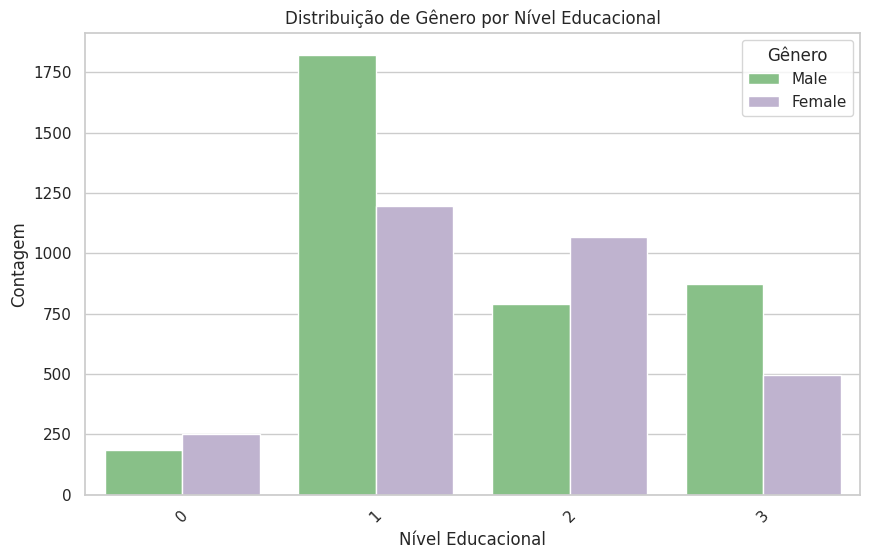

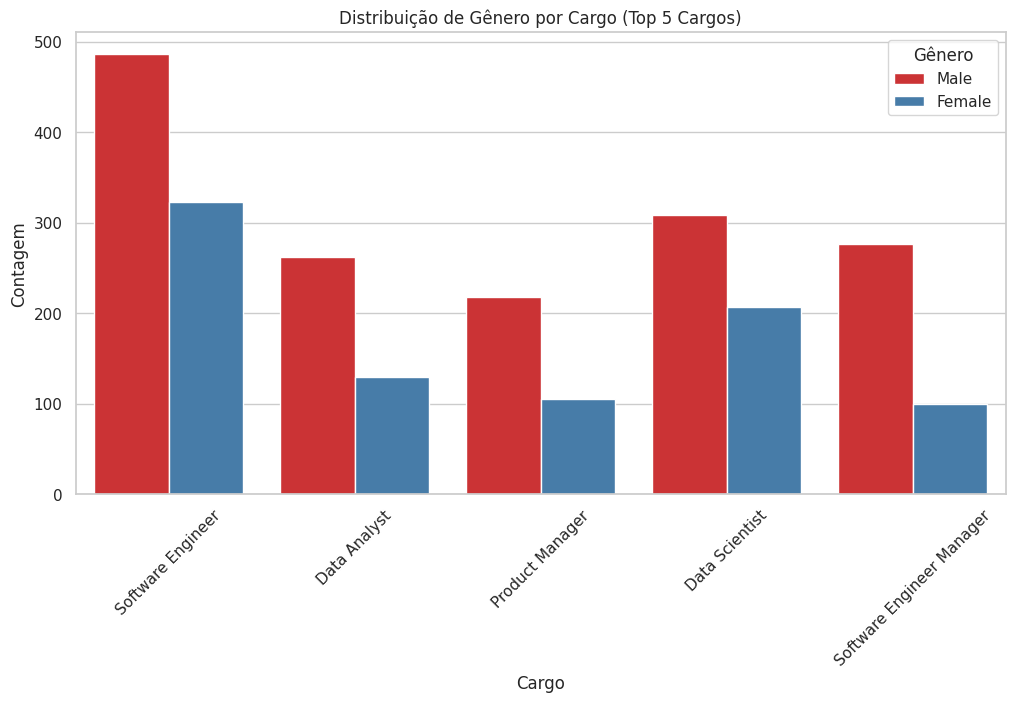

<Figure size 1200x800 with 0 Axes>

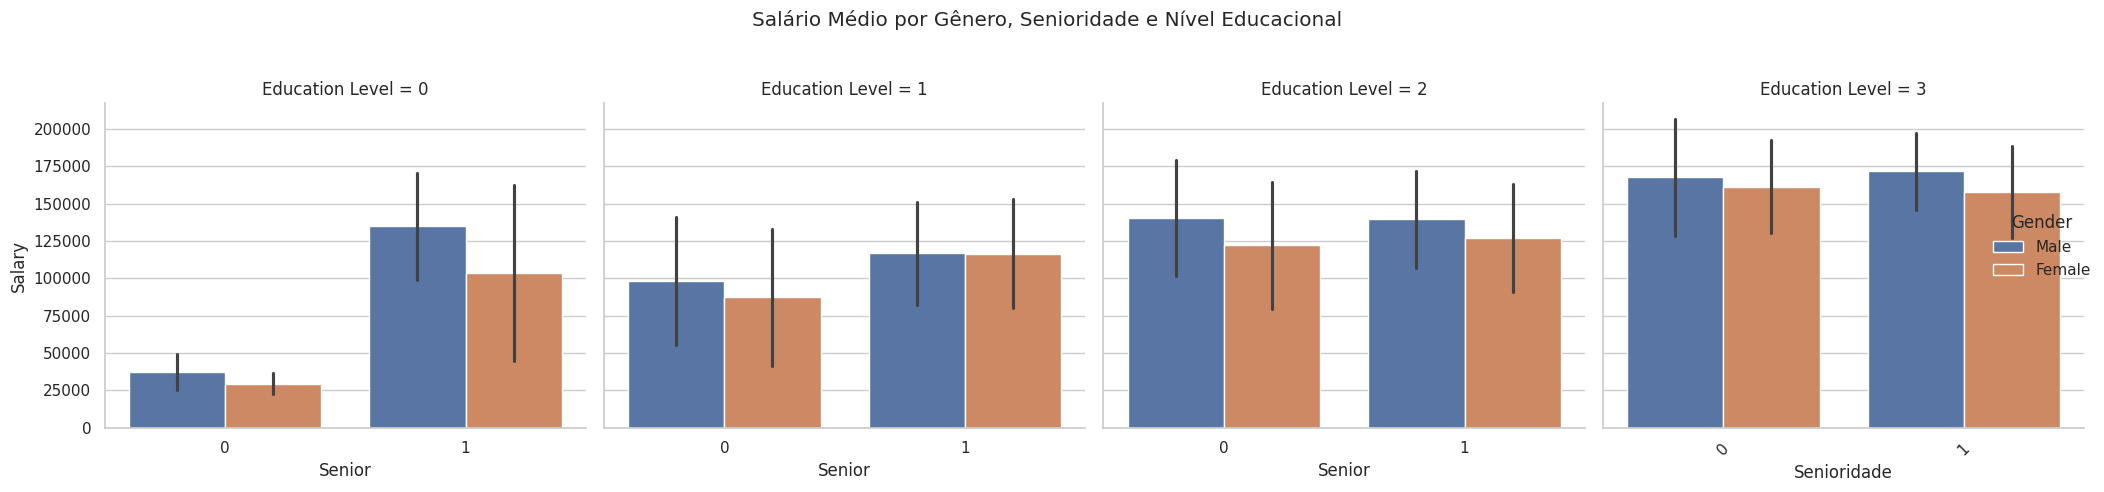

<Figure size 1200x800 with 0 Axes>

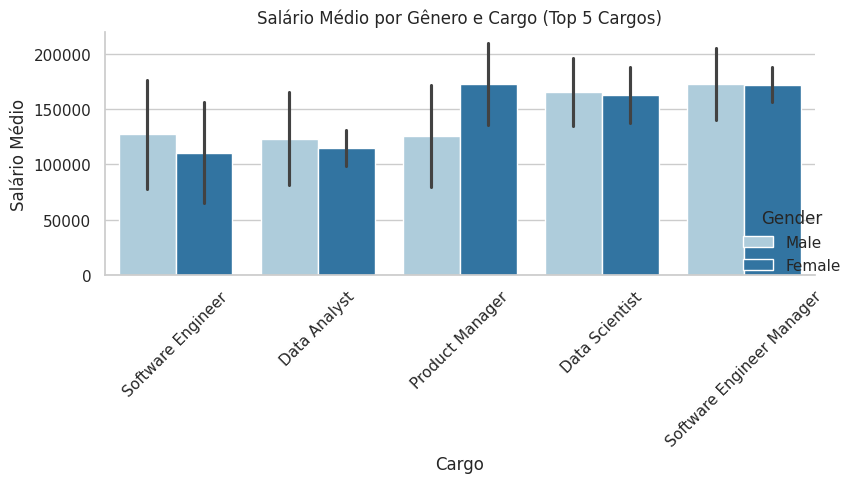

In [ ]:
# Configurações gerais
sns.set(style="whitegrid")

# 1. Distribuição de Gênero por Senioridade
plt.figure(figsize=(10, 6))
sns.countplot(data=datasetSalary, x='Senior', hue='Gender', palette="Set2")
plt.title("Distribuição de Gênero por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.show()

# 2. Distribuição de Gênero por Nível Educacional
plt.figure(figsize=(10, 6))
sns.countplot(data=datasetSalary, x='Education Level', hue='Gender', palette="Accent")
plt.title("Distribuição de Gênero por Nível Educacional")
plt.xlabel("Nível Educacional")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.show()

# 3. Distribuição de Gênero por Cargo (Top 5 Cargos Mais Comuns)
top_job_titles = datasetSalary['Job Title'].value_counts().head(5).index
data_top_jobs = datasetSalary[datasetSalary['Job Title'].isin(top_job_titles)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_jobs, x='Job Title', hue='Gender', palette="Set1")
plt.title("Distribuição de Gênero por Cargo (Top 5 Cargos)")
plt.xlabel("Cargo")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.show()

# 4. Salário Médio por Gênero, Senioridade e Nível Educacional
plt.figure(figsize=(12, 8))
sns.catplot(data=datasetSalary, x='Senior', y='Salary', hue='Gender', col='Education Level', kind='bar', errorbar='sd', height=5, aspect=1)
plt.suptitle("Salário Médio por Gênero, Senioridade e Nível Educacional")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Salário Médio por Gênero e Cargo (Top 5 Cargos)
plt.figure(figsize=(12, 8))
sns.catplot(data=data_top_jobs, x='Job Title', y='Salary', hue='Gender', kind='bar', palette="Paired", errorbar='sd', height=5, aspect=1.5)
plt.title("Salário Médio por Gênero e Cargo (Top 5 Cargos)")
plt.xlabel("Cargo")
plt.ylabel("Salário Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise de Salário por Raça e Gênero

Este código realiza uma análise da distribuição salarial considerando as variáveis de raça e gênero, seguindo as etapas abaixo:

1. **Codificação das Variáveis Categóricas**:
   - Utiliza `pd.get_dummies` para converter as colunas categóricas "Race" (raça) e "Gender" (gênero) em variáveis binárias (one-hot encoding), excluindo a primeira categoria como referência para evitar multicolinearidade.
   - Aplica o `LabelEncoder` do Scikit-Learn para transformar "Race" e "Gender" em valores numéricos, facilitando a criação dos gráficos e cálculos.

2. **Visualização da Distribuição Salarial por Raça e Gênero**:
   - Um gráfico de caixa (boxplot) é gerado para ilustrar a distribuição de salários para diferentes grupos de raça e gênero.
   - A variável "Race" é utilizada como eixo X, "Salary" como eixo Y, e o parâmetro `hue='Gender'` para segmentar a análise entre os gêneros, permitindo observar a dispersão salarial e comparações entre os grupos de gênero e raça.

3. **Cálculo das Médias Salariais por Raça e Gênero**:
   - A média de salários para cada combinação de raça e gênero é calculada e exibida, proporcionando uma visão quantitativa das disparidades ou similaridades salariais entre os diferentes grupos.

4. **Contagem de Observações por Raça e Gênero**:
   - Calcula a contagem de observações para cada combinação de raça e gênero, permitindo verificar a distribuição dos dados entre os grupos analisados e garantindo a representatividade de cada categoria.

Index(['Age', 'Education Level', 'Job Title', 'Years of Experience', 'Salary',
       'Country', 'Senior', 'Race_Asian', 'Race_Australian', 'Race_Black',
       'Race_Chinese', 'Race_Hispanic', 'Race_Korean', 'Race_Mixed',
       'Race_Welsh', 'Race_White', 'Gender_Male', 'Gender', 'Race'],
      dtype='object')
0        True
1       False
2        True
3       False
4        True
        ...  
6679    False
6680     True
6681    False
6682     True
6683    False
Name: Gender_Male, Length: 6684, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
6679    False
6680    False
6681    False
6682    False
6683     True
Name: Race_Black, Length: 6684, dtype: bool


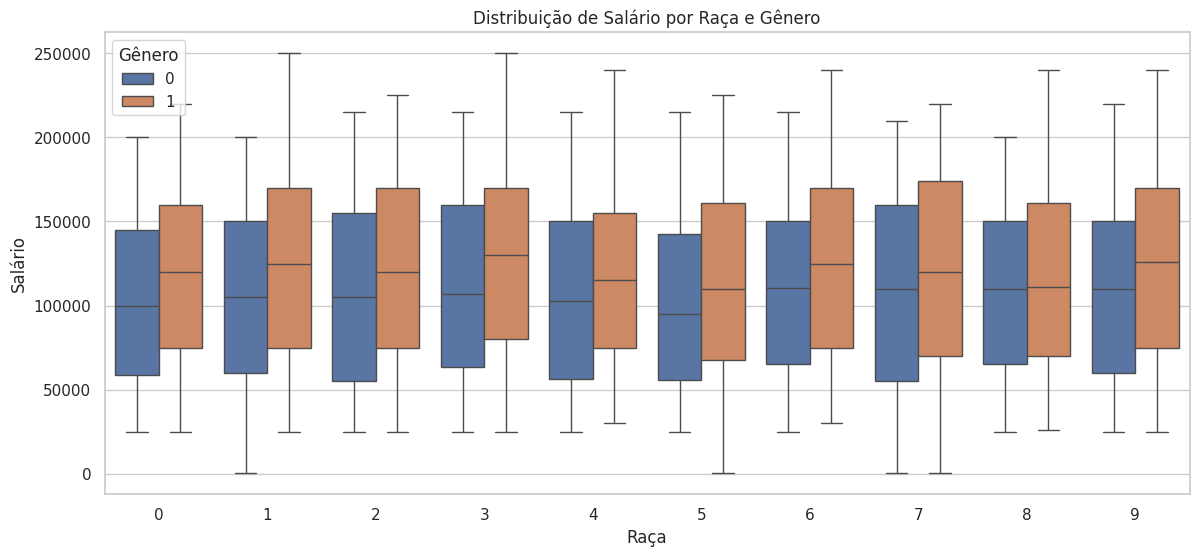


Médias de salário por raça e gênero:
Race  Gender
0     0         103568.139073
      1         118956.572139
1     0         106380.923184
      1         122434.531144
2     0         108245.014354
      1         119390.000000
3     0         108602.208333
      1         126169.440329
4     0         106422.709184
      1         115077.542510
5     0         104509.158273
      1         114892.306011
6     0         110948.144186
      1         122565.033058
7     0         108091.310345
      1         122652.206349
8     0         108379.775758
      1         116666.857143
9     0         109595.268927
      1         123191.434701
Name: Salary, dtype: float64

Contagem por raça e gênero:
Race  Gender
0     0          151
      1          201
1     0          716
      1          883
2     0          209
      1          243
3     0          192
      1          243
4     0          196
      1          247
5     0          139
      1          183
6     0          215
     

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, columns=['Race', 'Gender'], drop_first=True)

le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df['Gender'])
df_encoded['Race'] = le.fit_transform(df['Race'])

print(df_encoded.columns)
print(df_encoded.Gender_Male)
print(df_encoded.Race_Black)

# Distribuição de salário por raça e gênero
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_encoded, x='Race', y='Salary', hue='Gender')
plt.title("Distribuição de Salário por Raça e Gênero")
plt.xlabel("Raça")
plt.ylabel("Salário")
plt.legend(title='Gênero')
plt.show()

# Médias de salário por raça e gênero
print("\nMédias de salário por raça e gênero:")
mean_salary_race_gender = df_encoded.groupby(['Race', 'Gender'])['Salary'].mean()
print(mean_salary_race_gender)

# Contagem por raça e gênero
print("\nContagem por raça e gênero:")
race_gender_counts = df_encoded.groupby(['Race', 'Gender']).size()
print(race_gender_counts)


# Análise de Contagem por Raça e País

Este código realiza uma análise da distribuição de contagem de observações categorizadas por "Raça" e "País" no dataset, com os seguintes passos:

1. **Agrupamento de Dados**:
   - Utiliza `groupby` para agrupar as observações pela combinação das colunas "Race" (raça) e "Country" (país).
   - A função `size()` calcula o número de ocorrências em cada grupo de "Raça" e "País".

2. **Reformatação da Tabela**:
   - Após o agrupamento, `reset_index(name='Counts')` é usado para transformar a contagem resultante em uma coluna nomeada "Counts", criando uma tabela organizada com as colunas "Race", "Country" e "Counts".

3. **Exibição dos Resultados**:
   - O código exibe a tabela `race_city_counts`, que contém as contagens de observações por raça e país, permitindo visualizar quantas observações estão presentes em cada combinação.

In [ ]:
race_city_counts = datasetSalary.groupby(['Race', 'Country']).size().reset_index(name='Counts')
print(race_city_counts)

                Race    Country  Counts
0   African American        USA     352
1              Asian  Australia     476
2              Asian     Canada     455
3              Asian         UK     333
4              Asian        USA     335
5         Australian  Australia     452
6              Black     Canada     435
7            Chinese      China     443
8           Hispanic        USA     322
9             Korean      China     457
10             Mixed         UK     334
11             Welsh         UK     333
12             White  Australia     407
13             White     Canada     432
14             White      China     439
15             White         UK     332
16             White        USA     347


# Gráfico de Barras Empilhadas da Distribuição de Raças por País

Este gráfico de barras empilhadas permite visualizar a distribuição das raças em diferentes países do dataset. Abaixo estão as etapas e a análise interpretativa desse código:

1. **Configuração do Gráfico**:
   - Um gráfico de barras empilhadas é criado para representar a distribuição racial por país. O código usa `pivot_table` para reorganizar a tabela `race_city_counts`, criando uma matriz de valores onde o índice é o país ("Country"), as colunas são as raças ("Race"), e as células contêm as contagens de cada raça por país.

2. **Configurações de Eixo e Legenda**:
   - Os rótulos dos eixos "Country" (país) e "Counts" (número de pessoas) são configurados para facilitar a leitura.
   - A legenda é ajustada para o lado direito do gráfico com `bbox_to_anchor` e `loc`, e `tight_layout()` ajuda a evitar sobreposição, melhorando a clareza visual.

3. **Interpretação**:
   - Este gráfico permite observar as proporções de cada raça em cada país e identificar rapidamente as populações raciais predominantes em diferentes regiões. Essa análise pode fornecer insights sobre a diversidade e representatividade racial nos países analisados, além de ser útil para observar a presença ou ausência de certos grupos em determinadas áreas.

<Figure size 1200x600 with 0 Axes>

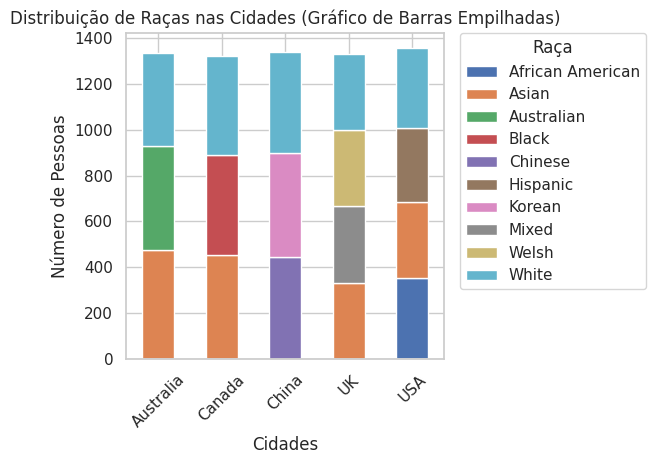

In [ ]:
# Gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
race_city_counts.pivot_table(index='Country', columns='Race', values='Counts', fill_value=0).plot(kind='bar', stacked=True)
plt.title('Distribuição de Raças nas Cidades (Gráfico de Barras Empilhadas)')
plt.xlabel('Cidades')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)
plt.legend(title='Raça', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Estatísticas Descritivas por País

O código acima calcula estatísticas descritivas agrupadas por país a partir do conjunto de dados `datasetSalary`. As métricas selecionadas ajudam a resumir características importantes para cada país em relação à idade, nível educacional, anos de experiência, salário e senioridade. Abaixo está a análise detalhada das operações realizadas:

1. **Agrupamento por País**:
   - Utiliza-se `groupby('Country')` para agrupar os dados por país, permitindo a análise comparativa de diferentes métricas entre os países.

2. **Métricas Calculadas**:
   - **Idade**: `mean`, `median`, e `std` (desvio padrão) são calculados, oferecendo uma visão da idade média, centralidade e dispersão em cada país.
   - **Nível Educacional**: `mean` e `count` são computados, onde `mean` indica o nível educacional médio (caso seja codificado numericamente), e `count` fornece a quantidade de pessoas por país, útil para amostragens e tamanho populacional.
   - **Anos de Experiência**: `mean` e `std` oferecem a média e dispersão da experiência de trabalho.
   - **Salário**: `mean`, `median`, e `std` são calculados para examinar a tendência central e variação salarial em cada país.
   - **Senioridade**: `mean` e `count` permitem analisar a proporção média de senioridade e o número de pessoas em posições seniores ou de maior experiência.

3. **Interpretação**:
   - Esta tabela de estatísticas descritivas fornece uma visão consolidada dos perfis de idade, experiência, educação, e salário para cada país. Ela permite a comparação entre países, identificando diferenças em níveis de experiência, educação e compensação. Esta análise pode ser valiosa para determinar fatores econômicos, culturais ou educacionais que influenciam esses aspectos por país.

In [ ]:
descriptive_stats = datasetSalary.groupby('Country').agg({
    'Age': ['mean', 'median', 'std'],
    'Education Level': ['mean', 'count'],
    'Years of Experience': ['mean', 'std'],
    'Salary': ['mean', 'median', 'std'],
    'Senior': ['mean', 'count']
})

print(descriptive_stats)


                 Age                  Education Level        \
                mean median       std            mean count   
Country                                                       
Australia  33.493633   32.0  7.601275        1.604494  1335   
Canada     33.684569   32.0  7.684519        1.624054  1322   
China      33.861090   32.0  7.664010        1.628081  1339   
UK         33.784535   32.0  7.708005        1.661411  1332   
USA        33.235251   32.0  7.315149        1.594395  1356   

          Years of Experience                   Salary            \
                         mean       std           mean    median   
Country                                                            
Australia            7.939326  6.050703  114925.465169  115000.0   
Canada               8.140318  6.088809  116455.090772  120000.0   
China                8.247946  6.025059  116282.589993  115920.0   
UK                   8.237988  6.148492  115919.916667  115000.0   
USA                

# Gráfico de Distribuição da Idade por País

Esse código cria um histograma empilhado para representar a **distribuição de idade** dos indivíduos no dataset `datasetSalary`, segmentado por país. Abaixo estão os detalhes da configuração e a interpretação da análise:

1. **Configuração da Figura**:
   - A figura é dimensionada para `(12, 6)` para uma visualização clara e detalhada, abrangendo as variações etárias em cada país.

2. **Histograma Empilhado**:
   - O método `sns.histplot()` cria um histograma empilhado, com as barras de cada país sendo sobrepostas em uma mesma escala para fácil comparação.
   - O parâmetro `multiple='stack'` organiza as barras por país em uma disposição empilhada, o que facilita a identificação visual das proporções de cada faixa etária por país.

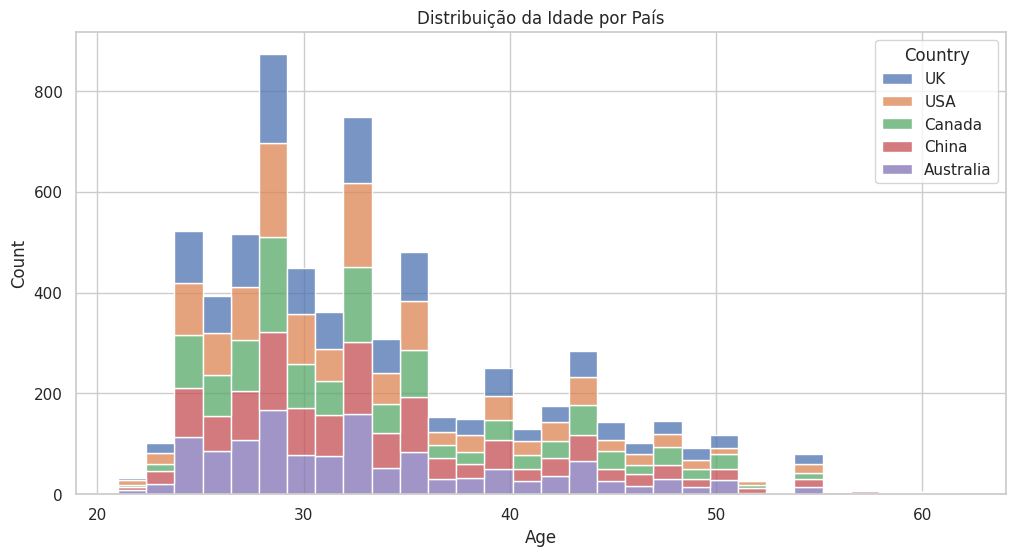

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=datasetSalary, x='Age', hue='Country', multiple='stack', bins=30)
plt.title('Distribuição da Idade por País')
plt.show()


# Análise da Distribuição e Média Salarial por País

Esta seção analisa a **distribuição salarial** por país usando cinco tipos de gráficos, cada um oferecendo uma perspectiva única para identificar padrões, variabilidades e comparações salariais entre os países no dataset `datasetSalary`.

### 1. Boxplot da Distribuição Salarial por País
- **Gráfico**: `sns.boxplot()`
- **Objetivo**: Visualizar a **distribuição de salários** em cada país, incluindo mediana, quartis e potenciais outliers.
- **Interpretação**: Esse gráfico mostra o intervalo interquartil e os valores atípicos, facilitando a comparação entre a dispersão salarial e a faixa de salários por país.

### 2. Barra da Média Salarial por País com Desvio Padrão
- **Gráfico**: `sns.barplot()` com `errorbar='sd'`
- **Objetivo**: Apresentar a **média salarial por país**, incluindo o desvio padrão como uma medida de dispersão.
- **Interpretação**: O desvio padrão (representado como barras de erro) fornece uma noção da variabilidade dos salários em torno da média, indicando países com maior homogeneidade ou dispersão salarial.

### 3. Violino da Densidade Salarial por País
- **Gráfico**: `sns.violinplot()`
- **Objetivo**: Exibir a **distribuição de densidade** dos salários, fornecendo uma visão mais detalhada das frequências e dos picos salariais em cada país.
- **Interpretação**: Este gráfico ajuda a entender onde estão concentrados os salários mais frequentes dentro de cada país, exibindo as regiões com maior densidade.

### 4. Gráfico de Pontos da Média Salarial com Intervalo de Confiança
- **Gráfico**: `sns.pointplot()` com `capsize=0.1`
- **Objetivo**: Expor a **média salarial** por país com intervalos de confiança, indicando a precisão da média salarial de cada país.
- **Interpretação**: Útil para visualizar as médias salariais de forma simplificada e verificar o intervalo de confiança de cada média, o que pode indicar a confiança nas estimativas salariais médias.

### 5. Gráfico de Barras Horizontais da Média Salarial por País
- **Gráfico**: `plot(kind='barh')`
- **Objetivo**: Comparar diretamente as médias salariais dos países de forma ordenada, usando um gráfico de barras horizontais.
- **Interpretação**: Ao ordenar os países pela média salarial, este gráfico facilita a identificação dos países com maiores e menores médias, sendo ideal para uma análise comparativa direta.

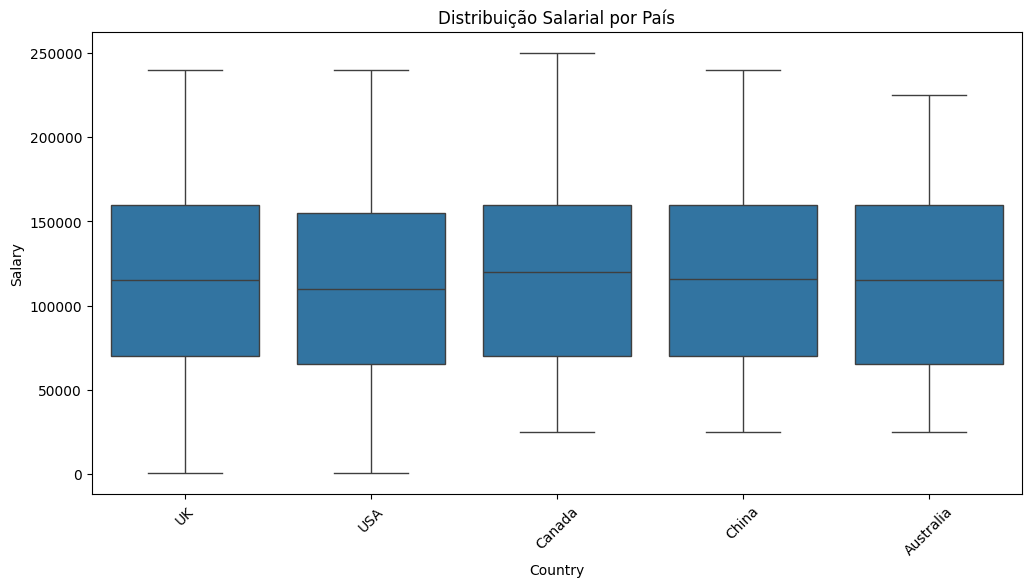

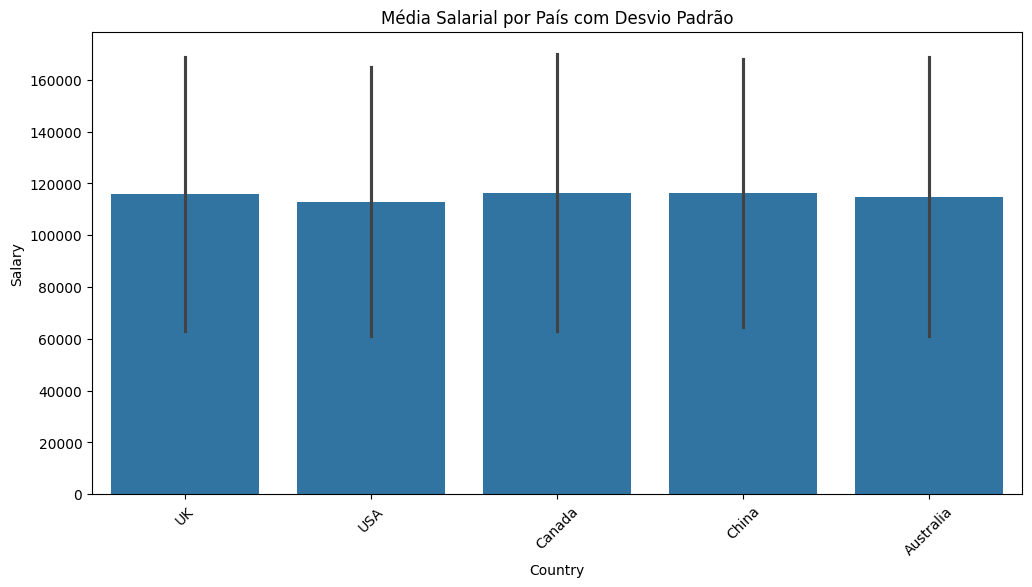

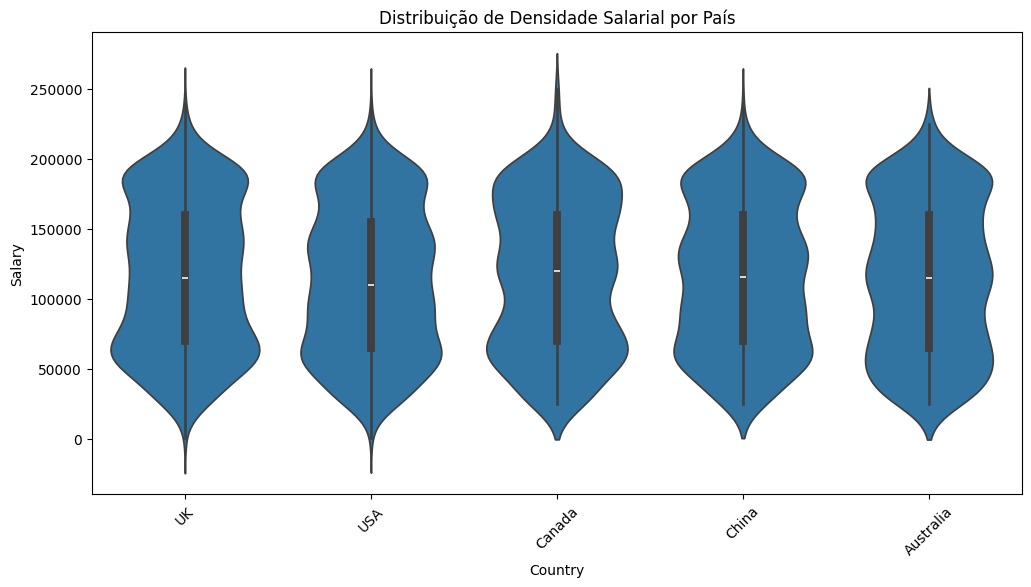

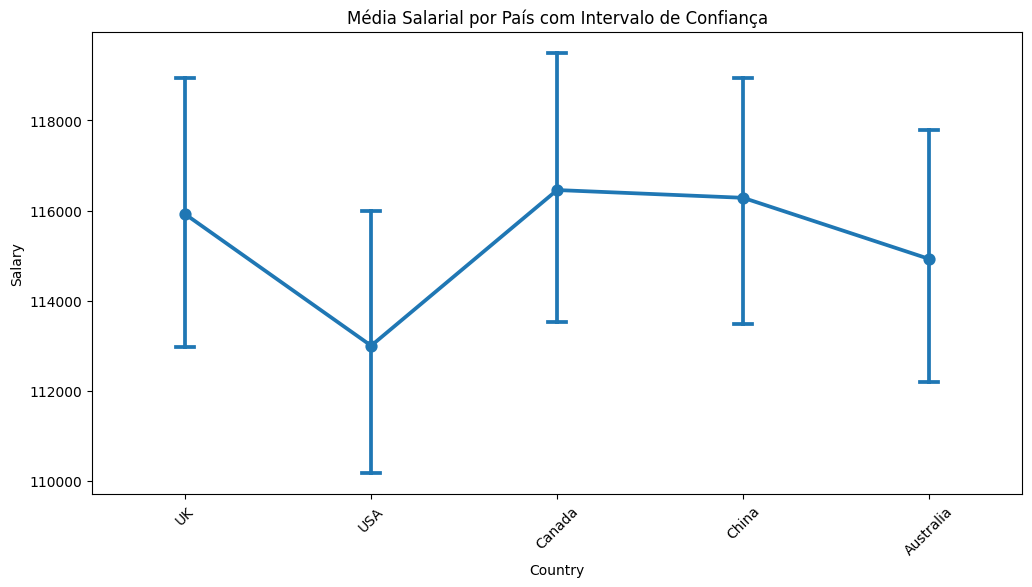

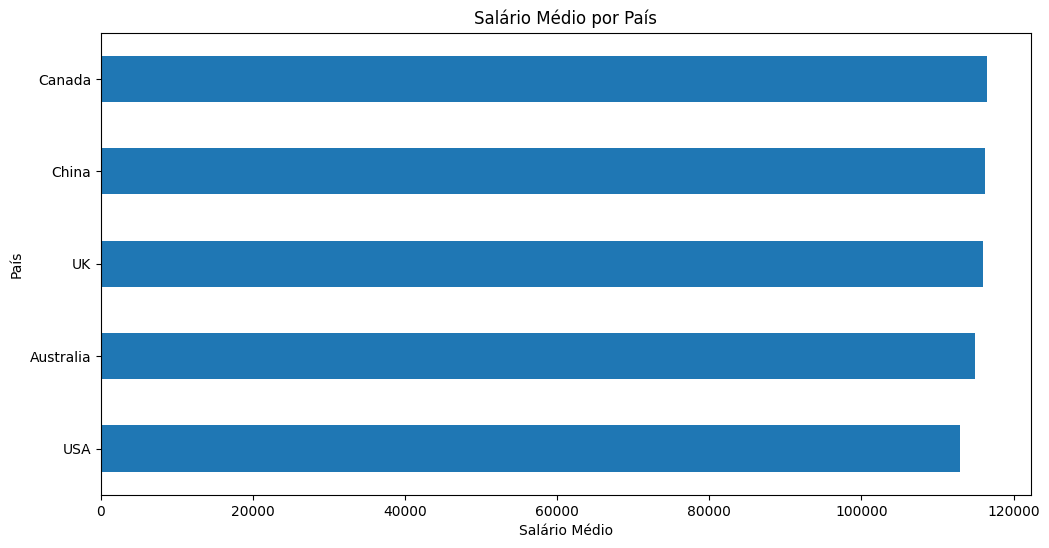

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Salary', data=datasetSalary)
plt.title('Distribuição Salarial por País')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Salary', data=datasetSalary, errorbar='sd')  # 'ci' indica intervalo de confiança
plt.title('Média Salarial por País com Desvio Padrão')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Country', y='Salary', data=datasetSalary)
plt.title('Distribuição de Densidade Salarial por País')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='Country', y='Salary', data=datasetSalary, capsize=0.1)
plt.title('Média Salarial por País com Intervalo de Confiança')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
average_salary_by_country = datasetSalary.groupby('Country')['Salary'].mean().sort_values()
average_salary_by_country.plot(kind='barh')
plt.title('Salário Médio por País')
plt.xlabel('Salário Médio')
plt.ylabel('País')
plt.show()


# Teste ANOVA para Comparação de Salários entre Países

Neste trecho, é aplicado o **teste ANOVA (Análise de Variância)** para verificar se existem diferenças estatisticamente significativas nos **salários médios** entre os diferentes países presentes no dataset.

### Passos Realizados

1. **Separação dos Grupos**:
   - Primeiro, os países únicos são extraídos do dataset `df` usando `df['Country'].unique()`.
   - Em seguida, são criados grupos salariais (`salary_groups`) para cada país, onde cada grupo contém os salários associados a um país específico.

2. **Aplicação do Teste ANOVA**:
   - O teste ANOVA é realizado usando `stats.f_oneway(*salary_groups)`, onde `*salary_groups` passa cada grupo salarial como um argumento separado para a função.
   - Esse teste examina se a variabilidade dos salários entre os grupos (países) é maior do que a variabilidade dentro dos grupos, o que indicaria que as médias salariais dos países são significativamente diferentes.

In [ ]:
from scipy import stats

countries = df['Country'].unique()
salary_groups = [df[df['Country'] == country]['Salary'] for country in countries]
anova_result = stats.f_oneway(*salary_groups)

print(f'ANOVA Result: F={anova_result.statistic}, p-value={anova_result.pvalue}')


ANOVA Result: F=0.9804622756367729, p-value=0.4167635622975737


# Análise do Conjunto de Dados de Salários

Este documento descreve as principais análises realizadas no conjunto de dados sobre salários, abrangendo diferentes dimensões, como país, gênero, idade, experiência, nível educacional e senioridade.

## 1. Distribuição por País
A distribuição de profissionais por país é apresentada utilizando a contagem de ocorrências na coluna `Country`. Isso fornece uma visão geral de onde os dados estão mais concentrados.

## 2. Estatísticas Salariais por País
As estatísticas salariais são agrupadas por país e incluem:
- **Média Salarial**: O salário médio em cada país.
- **Mediana Salarial**: O valor central dos salários, que ajuda a entender a distribuição dos dados.
- **Desvio Padrão**: Uma medida da variabilidade dos salários.
- **Contagem**: O número de profissionais registrados em cada país.

Essas estatísticas são importantes para comparar como os salários variam entre diferentes países.

## 3. Média de Idade e Experiência por País
Esta análise calcula a média de idade e de anos de experiência dos profissionais em cada país, permitindo uma compreensão das características demográficas da força de trabalho em diferentes regiões.

## 4. Distribuição de Gênero por País
A distribuição de gênero é apresentada como uma tabela de contingência, normalizada por país. Isso mostra a proporção de gêneros (masculino e feminino) em cada país, expressa em porcentagem.

## 5. Nível Educacional por País
A análise de níveis educacionais utiliza uma tabela de contingência para mostrar a contagem de profissionais em diferentes níveis educacionais por país, permitindo uma visão sobre a formação acadêmica da força de trabalho.

## 6. Distribuição Salarial por País
Um boxplot é utilizado para visualizar a distribuição salarial em cada país. Isso permite identificar outliers e a dispersão dos salários.

## 7. Média Salarial por País e Gênero
Um gráfico de barras é utilizado para mostrar a média salarial em cada país, segmentada por gênero. Isso ajuda a identificar disparidades salariais entre homens e mulheres.

## 8. Correlação entre Variáveis Numéricas
Uma matriz de correlação é apresentada para as variáveis numéricas (idade, anos de experiência, salário e nível educacional). Isso ajuda a identificar relações entre as variáveis, como a relação entre anos de experiência e salários.

## 9. Porcentagem de Profissionais Seniores por País
A porcentagem de profissionais seniores é calculada e apresentada, permitindo uma comparação da senioridade na força de trabalho entre países.

## 10. Distribuição Racial por País
A distribuição racial é analisada utilizando uma tabela de contingência, expressa em porcentagem, para entender a diversidade racial na força de trabalho por país.

## 11. Média Salarial por País e Nível Educacional
As médias salariais são agrupadas por país e nível educacional, permitindo a análise de como a educação impacta os salários em diferentes países.

## 12. Distribuição de Níveis Educacionais por País
Um gráfico de barras empilhadas é utilizado para mostrar a distribuição percentual de níveis educacionais por país, destacando as diferenças na formação acadêmica em cada região.

Distribuição por País:
Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Estatísticas Salariais por País:
                mean    median       std  count
Country                                        
Australia  114925.47  115000.0  53867.51   1335
Canada     116455.09  120000.0  53447.95   1322
China      116282.59  115920.0  51760.38   1339
UK         115919.92  115000.0  53049.22   1332
USA        112998.76  110000.0  51901.39   1356
Média de Idade e Experiência por País:
             Age  Years of Experience
Country                              
Australia  33.49                 7.94
Canada     33.68                 8.14
China      33.86                 8.25
UK         33.78                 8.24
USA        33.24                 7.83
Distribuição de Gênero por País (%):
Gender     Female   Male
Country                 
Australia   45.99  54.01
Canada      44.02  55.98
China       44.14  55.86
UK          45.72

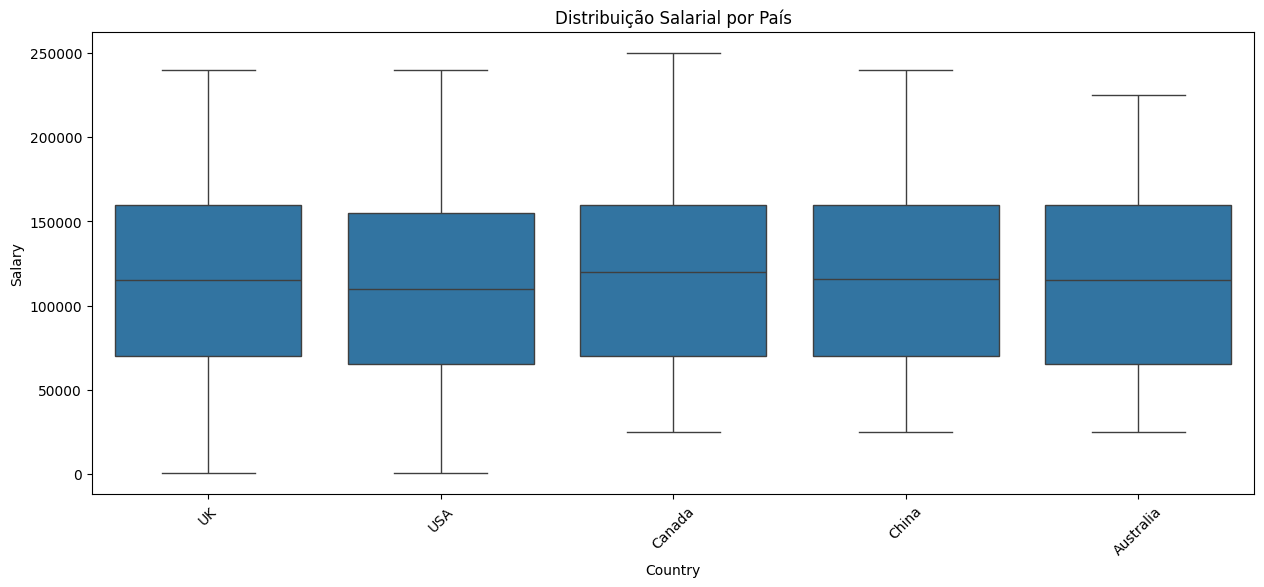

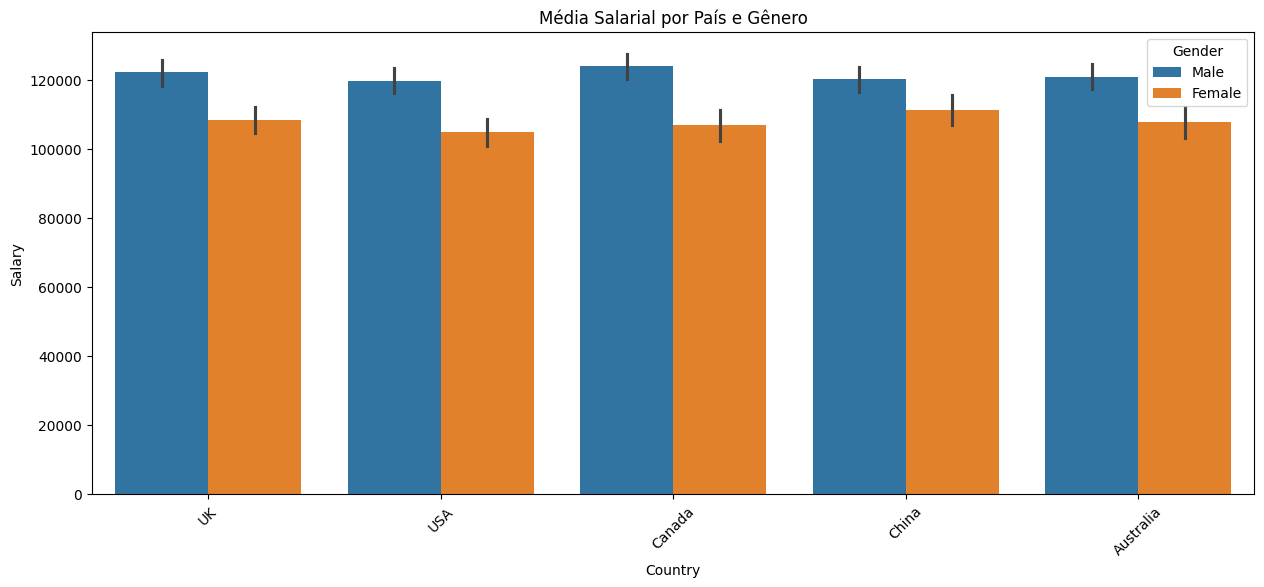

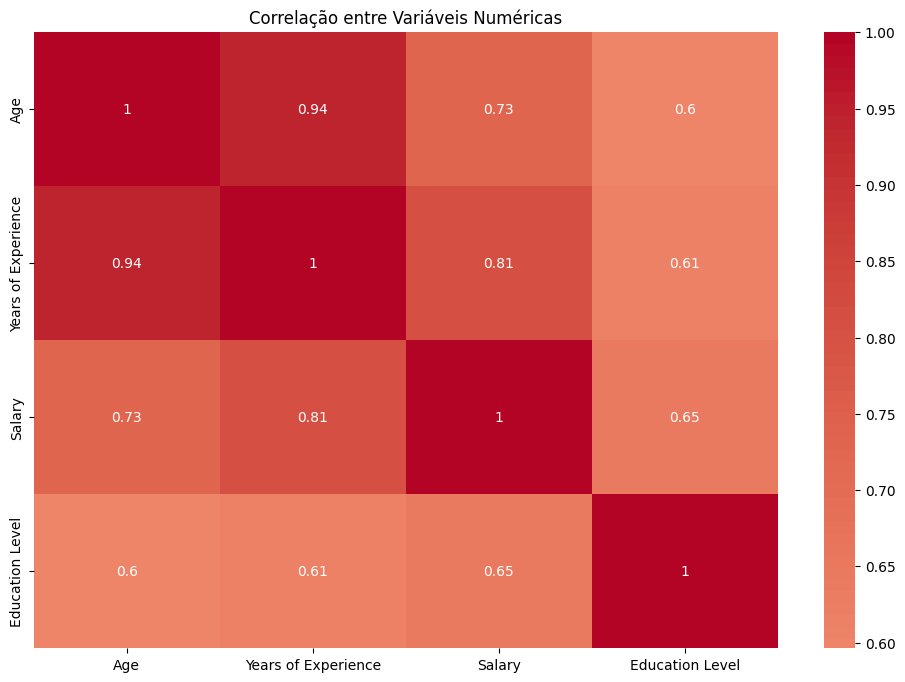

Porcentagem de Profissionais Seniores por País:
Senior         0      1
Country                
Australia  86.07  13.93
Canada     84.80  15.20
China      84.62  15.38
UK         85.74  14.26
USA        87.02  12.98
Distribuição Racial por País (%):
Race       African American  Asian  Australian  Black  Chinese  Hispanic  \
Country                                                                    
Australia              0.00  35.66       33.86    0.0     0.00      0.00   
Canada                 0.00  34.42        0.00   32.9     0.00      0.00   
China                  0.00   0.00        0.00    0.0    33.08      0.00   
UK                     0.00  25.00        0.00    0.0     0.00      0.00   
USA                   25.96  24.71        0.00    0.0     0.00     23.75   

Race       Korean  Mixed  Welsh  White  
Country                                 
Australia    0.00   0.00    0.0  30.49  
Canada       0.00   0.00    0.0  32.68  
China       34.13   0.00    0.0  32.79  
UK          

<Figure size 1500x600 with 0 Axes>

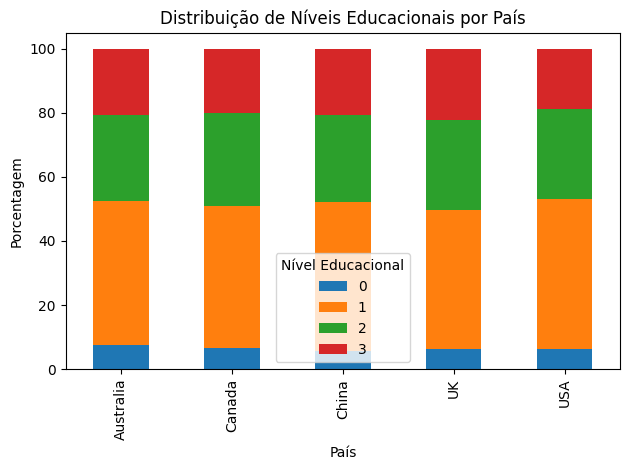

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fernando/Curso ciencia de dados/trabalho_final/Salary.csv")

country_dist = df['Country'].value_counts()
print("Distribui\u00e7\u00e3o por Pa\u00eds:")
print(country_dist)

salary_by_country = df.groupby('Country')['Salary'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\
Estat\u00edsticas Salariais por Pa\u00eds:")
print(salary_by_country)

age_exp_by_country = df.groupby('Country').agg({
    'Age': 'mean',
    'Years of Experience': 'mean'
}).round(2)
print("\
M\u00e9dia de Idade e Experi\u00eancia por Pa\u00eds:")
print(age_exp_by_country)

gender_by_country = pd.crosstab(df['Country'], df['Gender'], normalize='index') * 100
print("\
Distribui\u00e7\u00e3o de G\u00eanero por Pa\u00eds (%):")
print(gender_by_country.round(2))

education_by_country = pd.crosstab(df['Country'], df['Education Level'])
print("\
N\u00edvel Educacional por Pa\u00eds:")
print(education_by_country)

plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='Salary', data=df)
plt.title('Distribui\u00e7\u00e3o Salarial por Pa\u00eds')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Salary', hue='Gender', data=df)
plt.title('M\u00e9dia Salarial por Pa\u00eds e G\u00eanero')
plt.xticks(rotation=45)
plt.show()

numeric_cols = ['Age', 'Years of Experience', 'Salary', 'Education Level']
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correla\u00e7\u00e3o entre Vari\u00e1veis Num\u00e9ricas')
plt.show()

senior_by_country = pd.crosstab(df['Country'], df['Senior'], normalize='index') * 100
print("\
Porcentagem de Profissionais Seniores por Pa\u00eds:")
print(senior_by_country.round(2))

race_by_country = pd.crosstab(df['Country'], df['Race'], normalize='index') * 100
print("\
Distribui\u00e7\u00e3o Racial por Pa\u00eds (%):")
print(race_by_country.round(2))

salary_by_country_edu = df.groupby(['Country', 'Education Level'])['Salary'].mean().unstack()
print("\
M\u00e9dia Salarial por Pa\u00eds e N\u00edvel Educacional:")
print(salary_by_country_edu.round(2))

plt.figure(figsize=(15, 6))
education_by_country_pct = pd.crosstab(df['Country'], df['Education Level'], normalize='index') * 100
education_by_country_pct.plot(kind='bar', stacked=True)
plt.title('Distribui\u00e7\u00e3o de N\u00edveis Educacionais por Pa\u00eds')
plt.xlabel('Pa\u00eds')
plt.ylabel('Porcentagem')
plt.legend(title='N\u00edvel Educacional')
plt.tight_layout()
plt.show()

# Análise de Regressão Linear entre Variáveis Numéricas e Salário

Neste trecho de código, utilizamos a biblioteca `sklearn` para realizar a análise de regressão linear entre variáveis numéricas selecionadas e o **Salário**. O objetivo é entender como cada uma dessas variáveis influencia o salário.

Regressão Linear para 'Age' e 'Salary'
Coeficiente angular: 5063.388
Intercepto: -54876.146



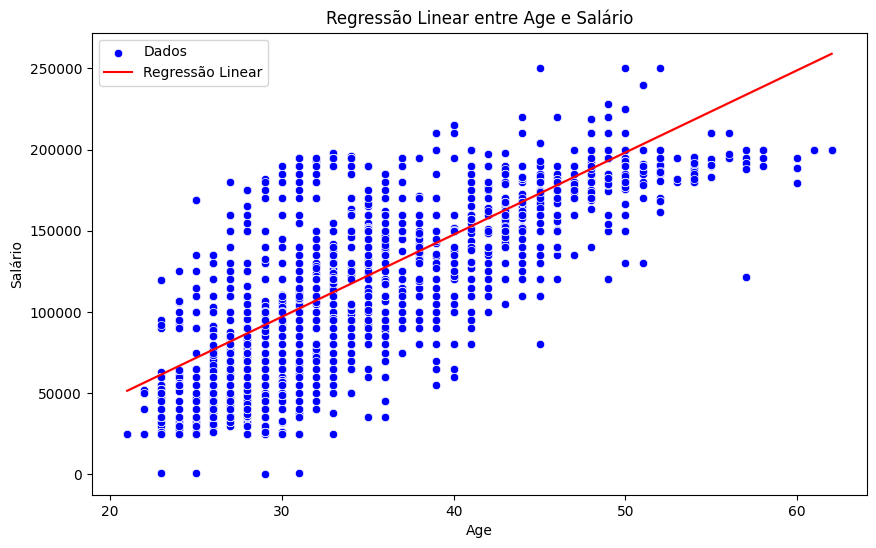

Regressão Linear para 'Years of Experience' e 'Salary'
Coeficiente angular: 7102.517
Intercepto: 57935.013



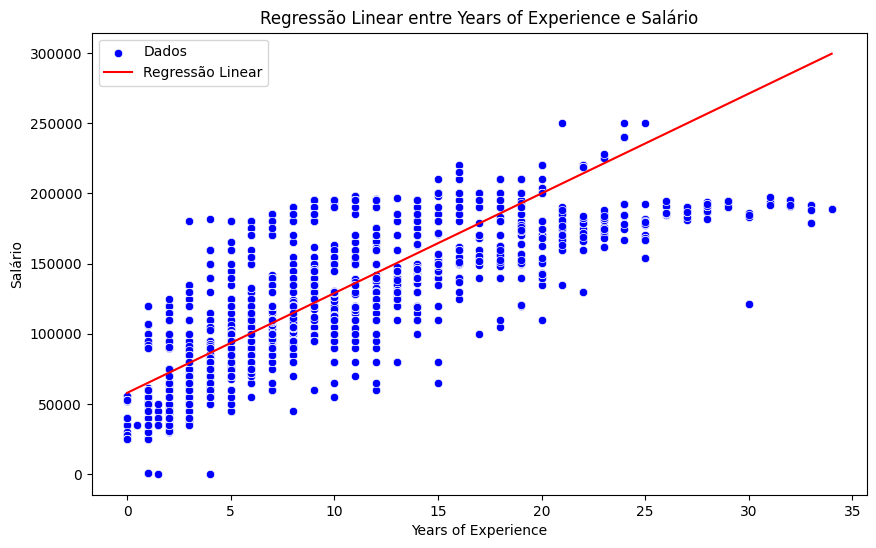

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleção de variáveis numéricas e definição da variável dependente
numeric_columns = ['Age', 'Education Level', 'Years of Experience', 'Senior']  # Excluímos Salary e variáveis categóricas
y = datasetSalary['Salary']  # variável dependente

for campo in numeric_columns:
    if campo == "Senior" or campo == "Education Level":
      continue
    # Selecionar a variável independente
    X = datasetSalary[[campo]]  # variável independente atual

    # Treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X, y)

    # Coeficientes da regressão
    print(f"Regressão Linear para '{campo}' e 'Salary'")
    print(f"Coeficiente angular: {model.coef_[0]:.3f}")
    print(f"Intercepto: {model.intercept_:.3f}\n")

    # Prever os salários
    y_pred = model.predict(X)

    # Visualizar a regressão linear
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=datasetSalary[campo], y=datasetSalary['Salary'], color='blue', label='Dados')
    sns.lineplot(x=datasetSalary[campo], y=y_pred, color='red', label='Regressão Linear')
    plt.title(f"Regressão Linear entre {campo} e Salário")
    plt.xlabel(campo)
    plt.ylabel("Salário")
    plt.legend()
    plt.show()


# Pré-processamento dos Dados de Salários

Neste código, realizamos uma série de etapas para pré-processar os dados e prepará-los para uma análise ou modelagem subsequente. O dataset `Salary.csv` é carregado e convertido para um formato que facilita a análise numérica.

### Etapas do Código

1. **Importação dos Dados**:
   - Os dados são carregados usando `pd.read_csv()` e armazenados no DataFrame `df`.

2. **Codificação de Variáveis Categóricas com One-Hot Encoding**:
   - O `pd.get_dummies()` é aplicado em colunas categóricas (`Country`, `Race`, `Job Title`, `Gender`) para transformar essas variáveis em variáveis indicadoras (binárias).
   - `drop_first=True` remove a primeira coluna de cada variável dummy para evitar redundância, o que ajuda a reduzir a multicolinearidade nos modelos de regressão.

3. **Codificação com Label Encoder**:
   - Adicionalmente, `LabelEncoder` do Scikit-Learn é utilizado para transformar variáveis categóricas (`Gender`, `Race`, `Job Title`, `Country`) em valores numéricos.
   - Esta codificação é particularmente útil para algoritmos de aprendizado de máquina que necessitam de valores numéricos, porém sem expandir as colunas como em `get_dummies()`.

4. **Verificação de Valores Nulos**:
   - `df_encoded.isnull().sum()` verifica se existem valores ausentes no DataFrame `df_encoded`, garantindo que não há dados faltantes que possam afetar análises futuras.

5. **Verificação dos Tipos de Dados**:
   - `df_encoded.dtypes` exibe os tipos de dados de cada coluna para confirmar que as colunas foram corretamente transformadas em variáveis numéricas.

6. **Separação de Variáveis Dependentes e Independentes**:
   - `X = df_encoded.drop('Salary', axis=1)`: `X` contém as variáveis independentes (todas as variáveis exceto `Salary`).
   - `y = df_encoded['Salary']`: `y` armazena a variável dependente (`Salary`), que será usada como variável-alvo para previsões ou análises.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/Fernando/Curso ciencia de dados/trabalho_final/Salary.csv")

df_encoded = pd.get_dummies(df, columns=['Country', 'Race', 'Job Title', 'Gender'], drop_first=True)

le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df['Gender'])
df_encoded['Race'] = le.fit_transform(df['Race'])
df_encoded['Job Title'] = le.fit_transform(df['Job Title'])
df_encoded['Country'] = le.fit_transform(df['Country'])

print(df_encoded.isnull().sum())  # Verifica se há valores nulos
print(df_encoded.dtypes)  # Verifica os tipos de dados
df_encoded

X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']


Age                    0
Education Level        0
Years of Experience    0
Salary                 0
Senior                 0
                      ..
Gender_Male            0
Gender                 0
Race                   0
Job Title              0
Country                0
Length: 151, dtype: int64
Age                    float64
Education Level          int64
Years of Experience    float64
Salary                 float64
Senior                   int64
                        ...   
Gender_Male               bool
Gender                   int64
Race                     int64
Job Title                int64
Country                  int64
Length: 151, dtype: object


# Análise de Modelos de Regressão

Este código realiza a comparação de diferentes modelos de regressão para prever valores a partir de um conjunto de dados. Ele avalia o desempenho de cada modelo utilizando métricas de erro e visualiza os resultados de forma gráfica.

## Passos do Código

1. **Separação dos Dados**:
   - Os dados são divididos em conjuntos de treino e teste utilizando a função `train_test_split` do scikit-learn. O conjunto de teste representa 20% dos dados totais, garantindo que o modelo seja avaliado em dados que não foram vistos durante o treinamento.

2. **Definição dos Modelos**:
   - Uma variedade de modelos de regressão é definida para avaliação:
     - **Ridge Regression**
     - **Lasso Regression**
     - **Decision Tree Regressor**
     - **Random Forest Regressor**
     - **Gradient Boosting Regressor**
     - **Support Vector Regressor (SVR)**
     - **Neural Network Regressor (MLP)**

3. **Avaliação de Modelos**:
   - Para cada modelo, é realizada a seguinte análise:
     - O modelo é treinado com o conjunto de treino.
     - As previsões são geradas utilizando o conjunto de teste.
     - As métricas de desempenho são calculadas:
       - **MSE (Mean Squared Error)**: Mede a média dos erros ao quadrado, fornecendo uma indicação da precisão das previsões.
       - **R² (R-squared)**: Representa a proporção da variância dos dados que é explicada pelo modelo; valores mais próximos de 1 indicam um bom ajuste.

4. **Visualização das Previsões**:
   - Para cada modelo, são gerados gráficos que ajudam a interpretar os resultados:
     - **Gráfico de Dispersão (Valores Reais vs. Valores Previstos)**:
       - Compara os valores reais com as previsões do modelo. Uma linha de perfeição é traçada para ajudar a visualizar quão próximas estão as previsões dos valores reais.
     - **Gráfico de Resíduos**:
       - Exibe os resíduos (diferença entre valores reais e previstos) em relação às previsões. Uma linha horizontal é adicionada para indicar onde os resíduos seriam iguais a zero, ajudando a identificar viés no modelo.
     - **Histograma dos Erros Absolutos**:
       - Mostra a distribuição dos erros absolutos, permitindo uma análise da frequência dos erros em relação ao tamanho dos erros.

5. **Comparação das Previsões**:
   - Um DataFrame é criado para mostrar uma comparação dos valores reais, previsões e erros absolutos para as primeiras 10 instâncias, permitindo uma análise mais detalhada de como cada modelo se comporta em relação aos dados.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados dos Modelos:
Ridge: MSE = 484490007.84, R² = 0.83
Lasso: MSE = 485272524.88, R² = 0.83
Decision Tree: MSE = 126125566.37, R² = 0.95
Random Forest: MSE = 86074110.06, R² = 0.97
Gradient Boosting: MSE = 260706325.28, R² = 0.91
SVR: MSE = 2773233644.85, R² = 0.00
Neural Network: MSE = 629119759.07, R² = 0.77


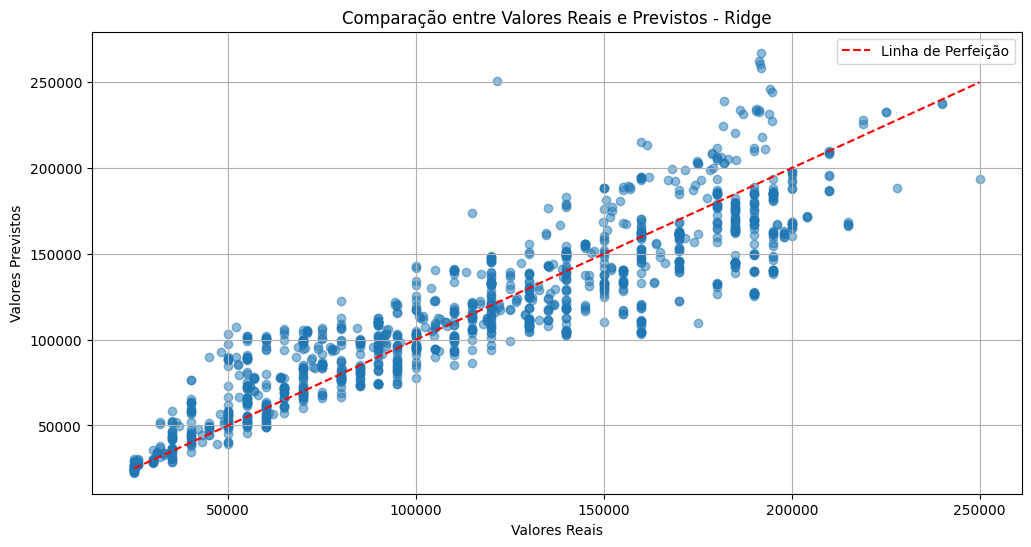

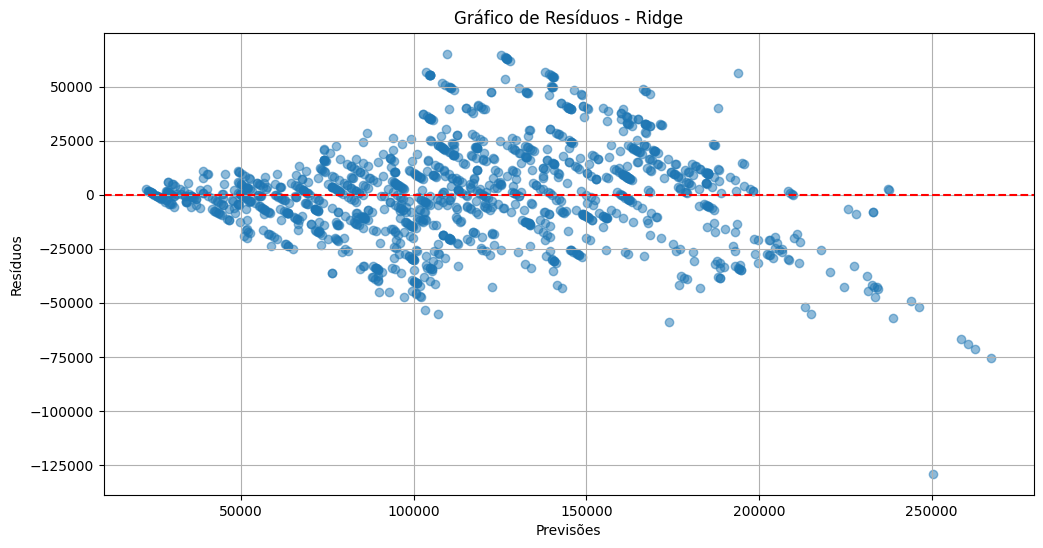

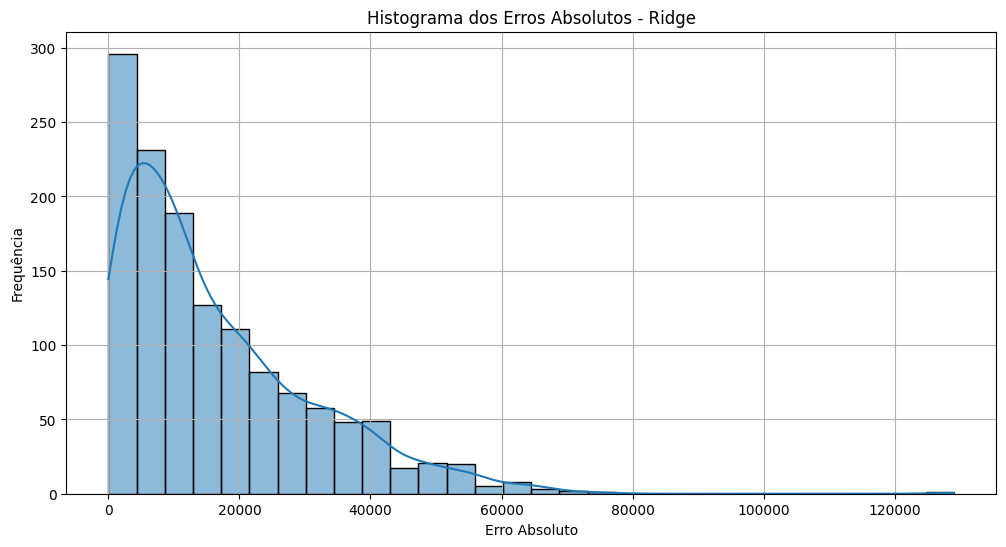


Comparação das Previsões para o Modelo Ridge:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   95986.287765    7308.287765
5825       160000.0  161994.412956    1994.412956
1452        80000.0   76413.121313    3586.878687
5927       120000.0  133276.942089   13276.942089
6071       215000.0  166308.069174   48691.930826
4755        57000.0   77562.460162   20562.460162
3332       120000.0  148811.919810   28811.919810
4728        55000.0   63509.532502    8509.532502
3098       121120.0  116326.573140    4793.426860
2526       126593.0  123332.999139    3260.000861


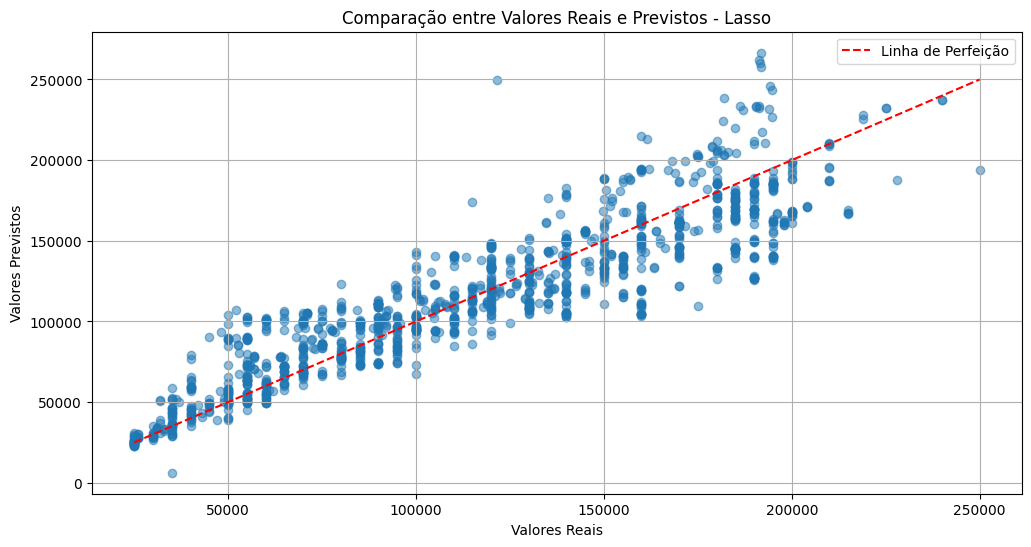

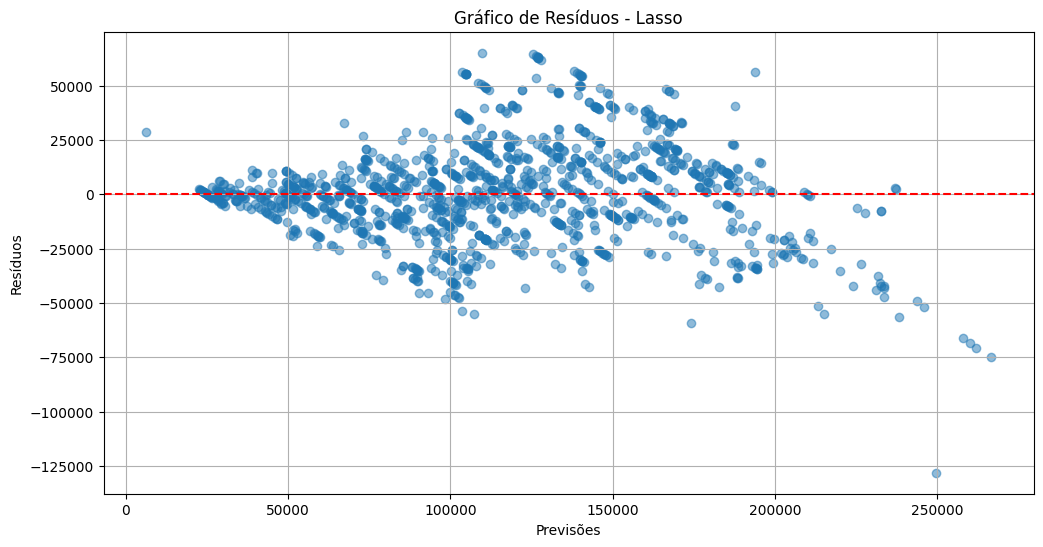

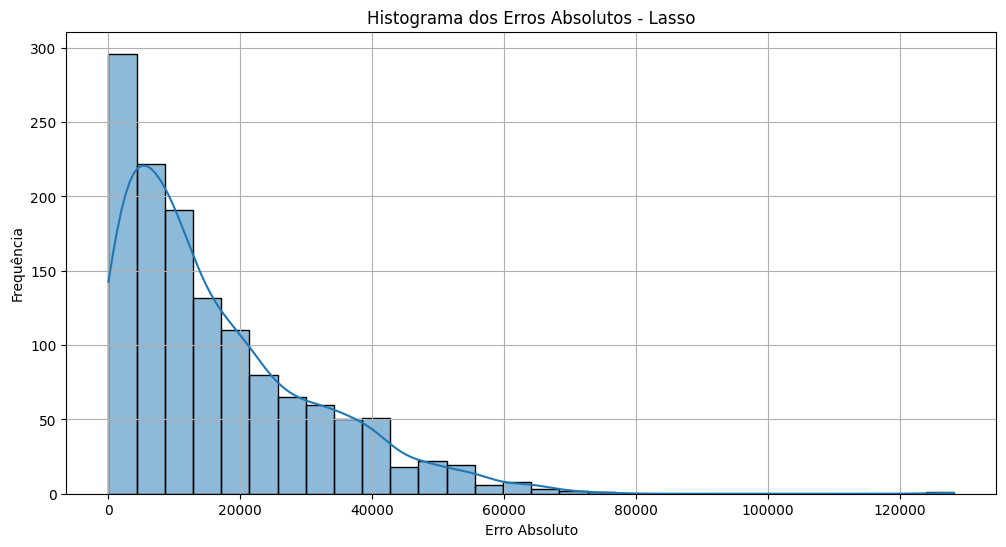


Comparação das Previsões para o Modelo Lasso:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   95897.071859    7219.071859
5825       160000.0  162393.292327    2393.292327
1452        80000.0   76422.019212    3577.980788
5927       120000.0  133584.003442   13584.003442
6071       215000.0  166518.301174   48481.698826
4755        57000.0   78101.672232   21101.672232
3332       120000.0  148755.643267   28755.643267
4728        55000.0   63621.290460    8621.290460
3098       121120.0  115942.078441    5177.921559
2526       126593.0  123394.985583    3198.014417


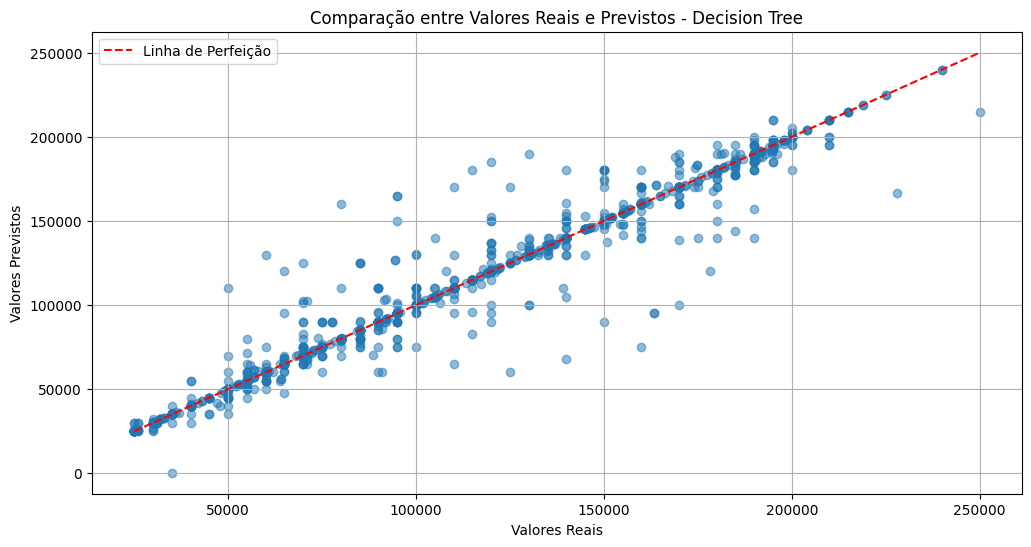

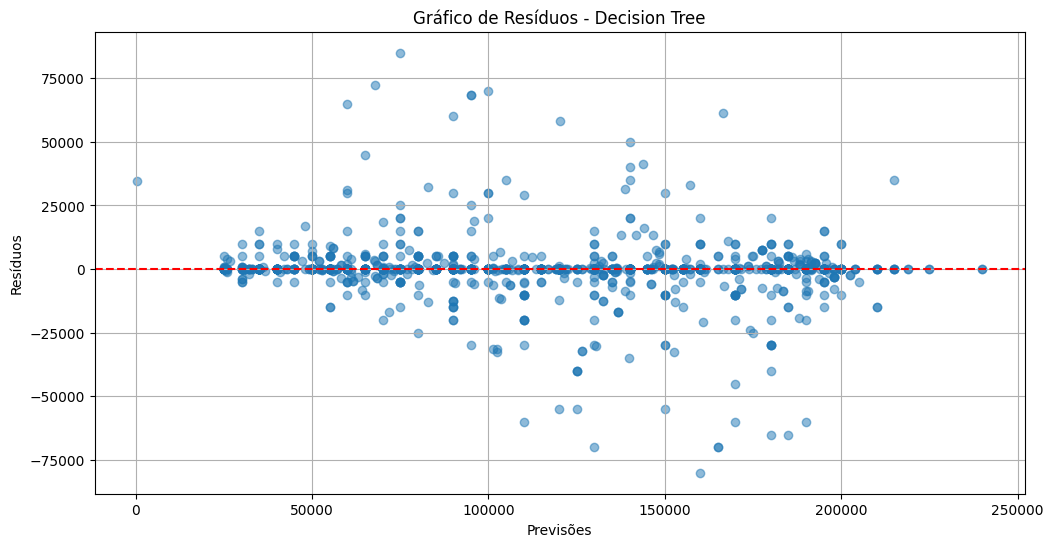

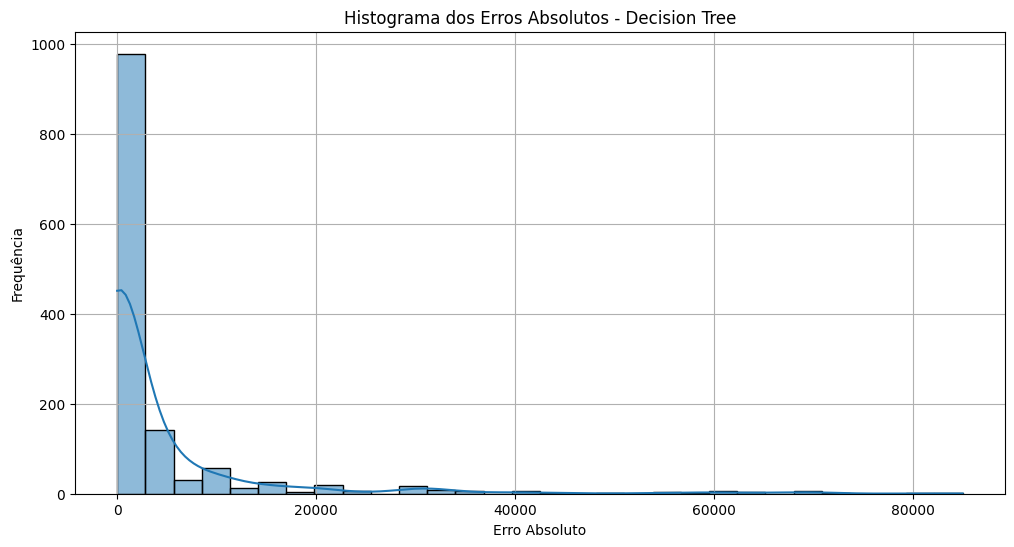


Comparação das Previsões para o Modelo Decision Tree:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   70216.000000   18462.000000
5825       160000.0  160000.000000       0.000000
1452        80000.0   80000.000000       0.000000
5927       120000.0  136666.666667   16666.666667
6071       215000.0  215000.000000       0.000000
4755        57000.0   57000.000000       0.000000
3332       120000.0  120000.000000       0.000000
4728        55000.0   55000.000000       0.000000
3098       121120.0  119918.000000    1202.000000
2526       126593.0  126520.000000      73.000000


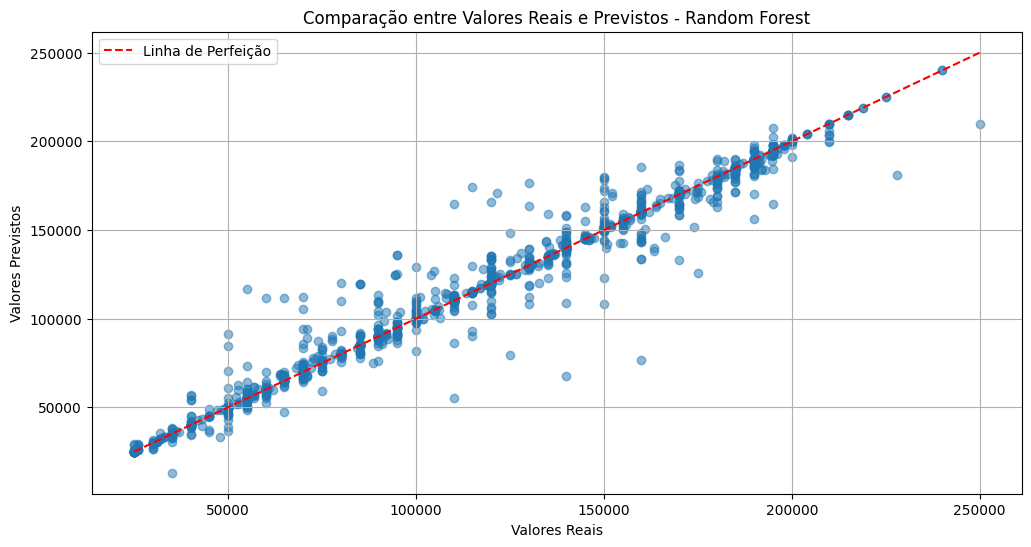

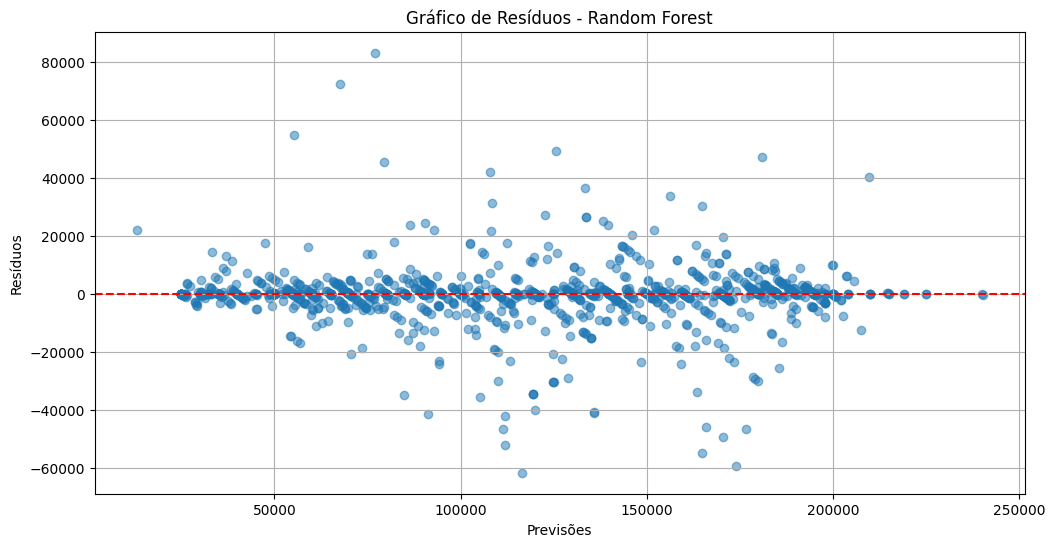

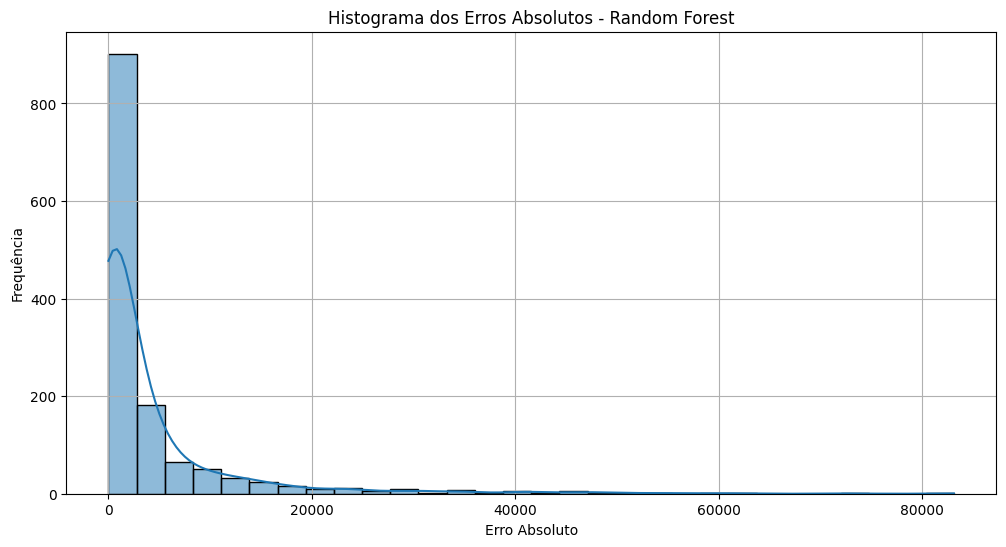


Comparação das Previsões para o Modelo Random Forest:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   74768.120000   13909.880000
5825       160000.0  161500.000000    1500.000000
1452        80000.0   80000.000000       0.000000
5927       120000.0  135109.199134   15109.199134
6071       215000.0  214650.000000     350.000000
4755        57000.0   56170.000000     830.000000
3332       120000.0  120000.000000       0.000000
4728        55000.0   55200.000000     200.000000
3098       121120.0  124317.460000    3197.460000
2526       126593.0  125063.670000    1529.330000


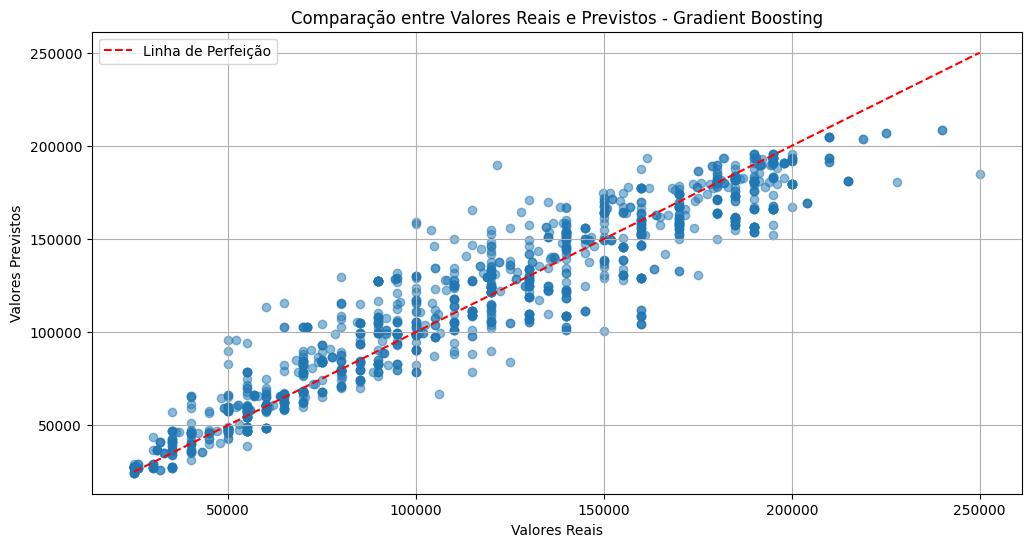

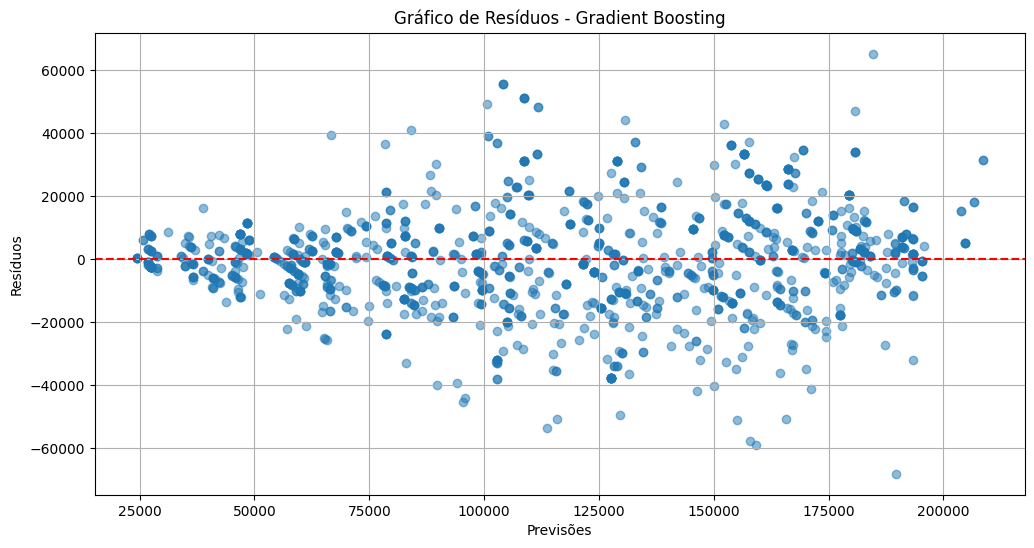

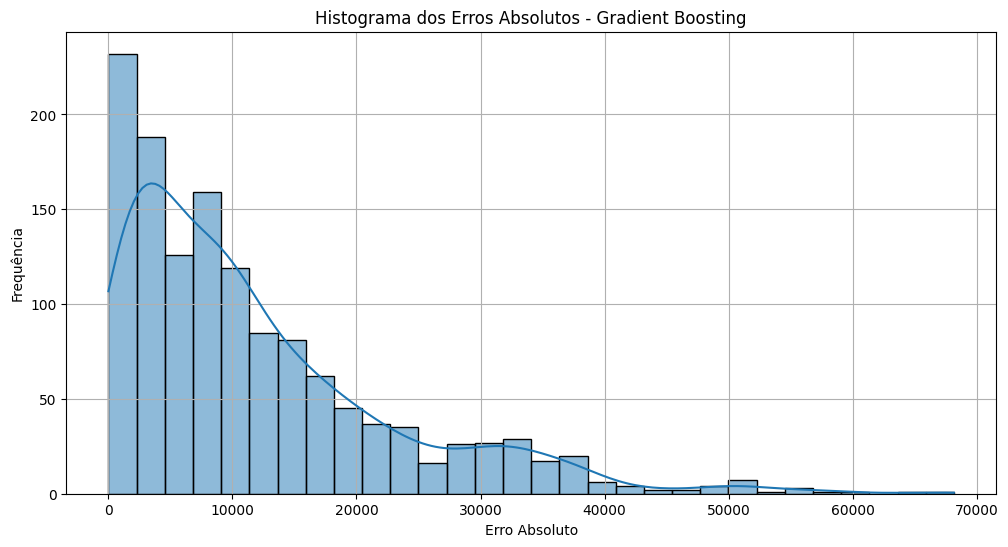


Comparação das Previsões para o Modelo Gradient Boosting:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   78632.372136   10045.627864
5825       160000.0  160071.684660      71.684660
1452        80000.0   71061.781489    8938.218511
5927       120000.0  123944.686277    3944.686277
6071       215000.0  180849.621429   34150.378571
4755        57000.0   66356.681680    9356.681680
3332       120000.0  121493.604948    1493.604948
4728        55000.0   57188.118324    2188.118324
3098       121120.0  130982.523129    9862.523129
2526       126593.0  128299.735989    1706.735989


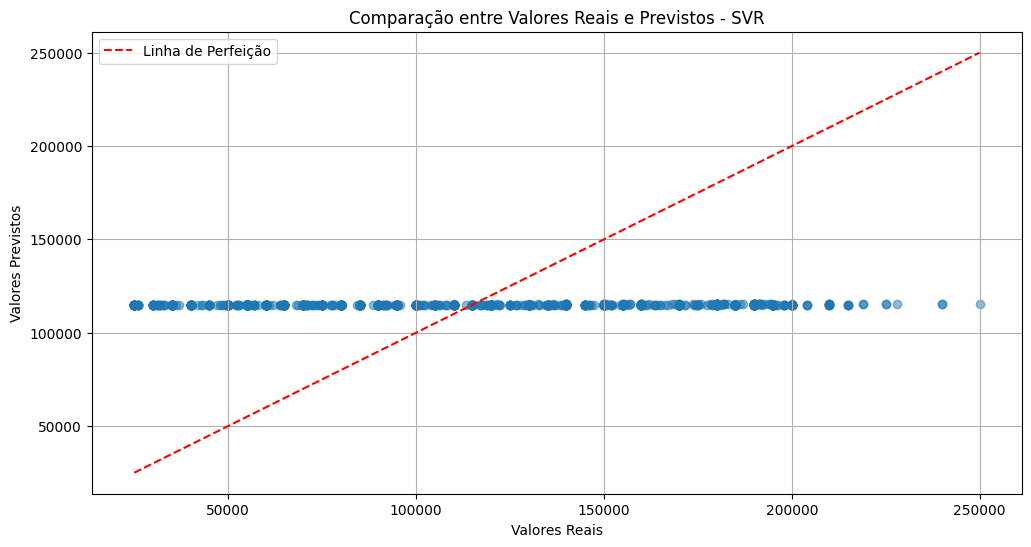

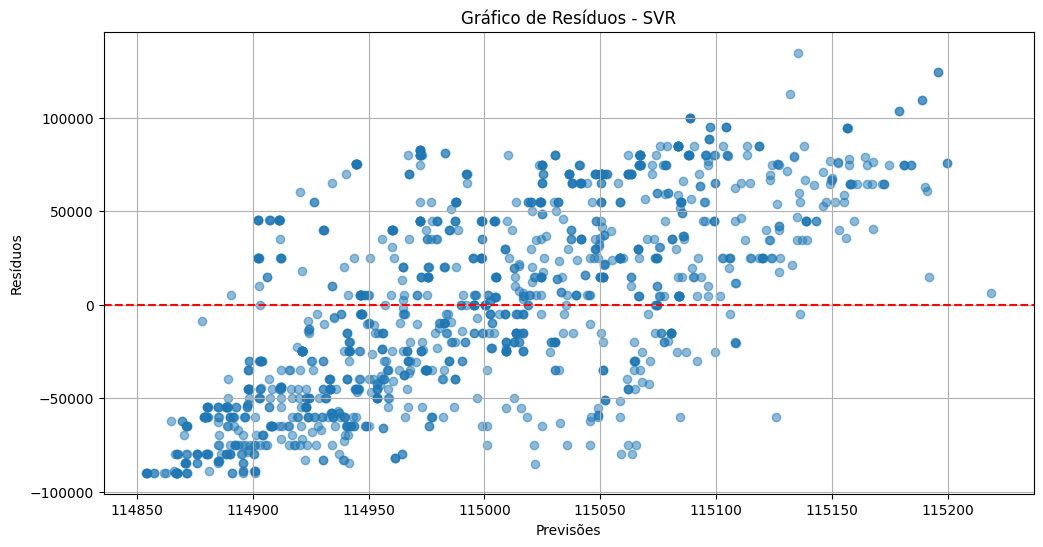

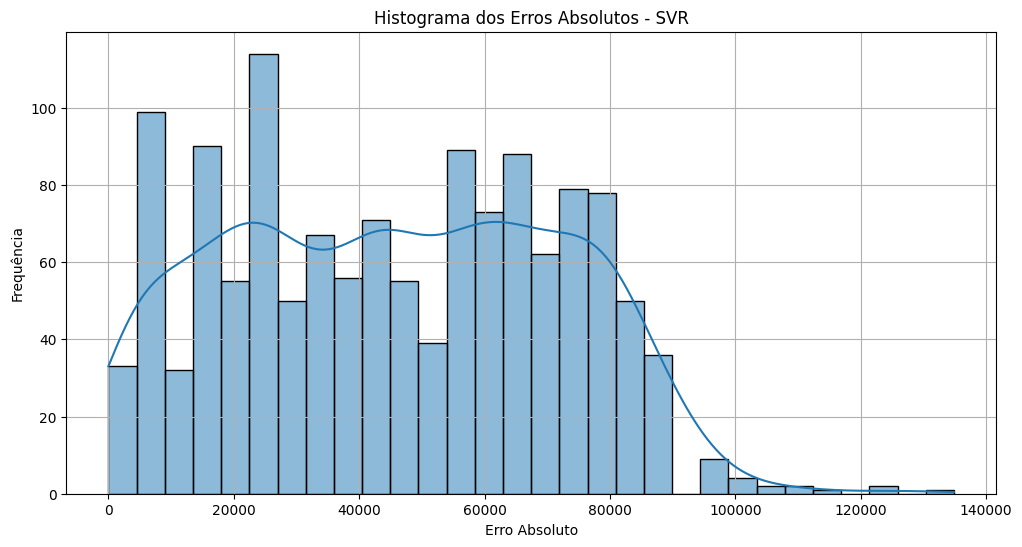


Comparação das Previsões para o Modelo SVR:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0  114951.262655   26273.262655
5825       160000.0  114972.207834   45027.792166
1452        80000.0  114958.193305   34958.193305
5927       120000.0  114946.507113    5053.492887
6071       215000.0  115088.655918   99911.344082
4755        57000.0  114934.087389   57934.087389
3332       120000.0  115083.871423    4916.128577
4728        55000.0  114926.689702   59926.689702
3098       121120.0  115016.775684    6103.224316
2526       126593.0  115108.343853   11484.656147


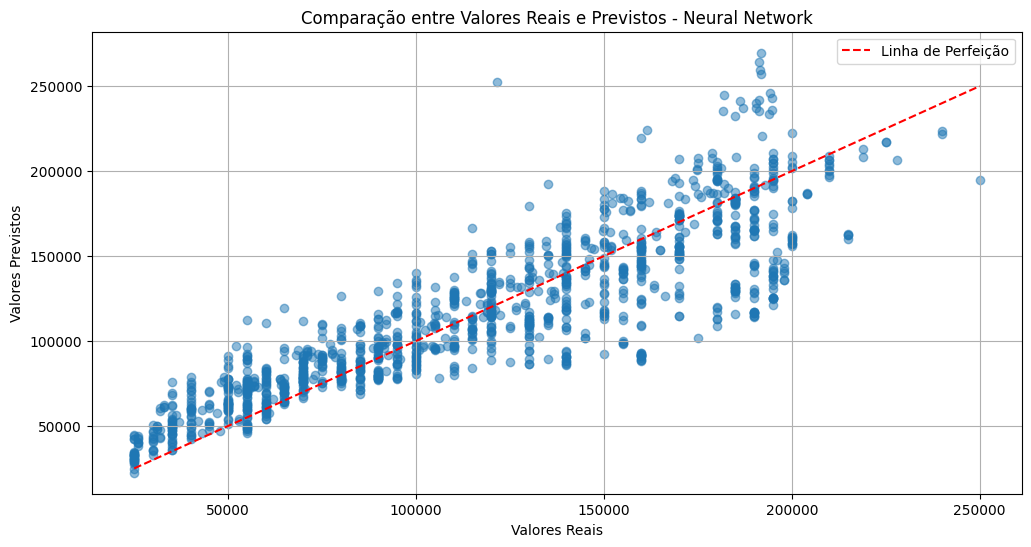

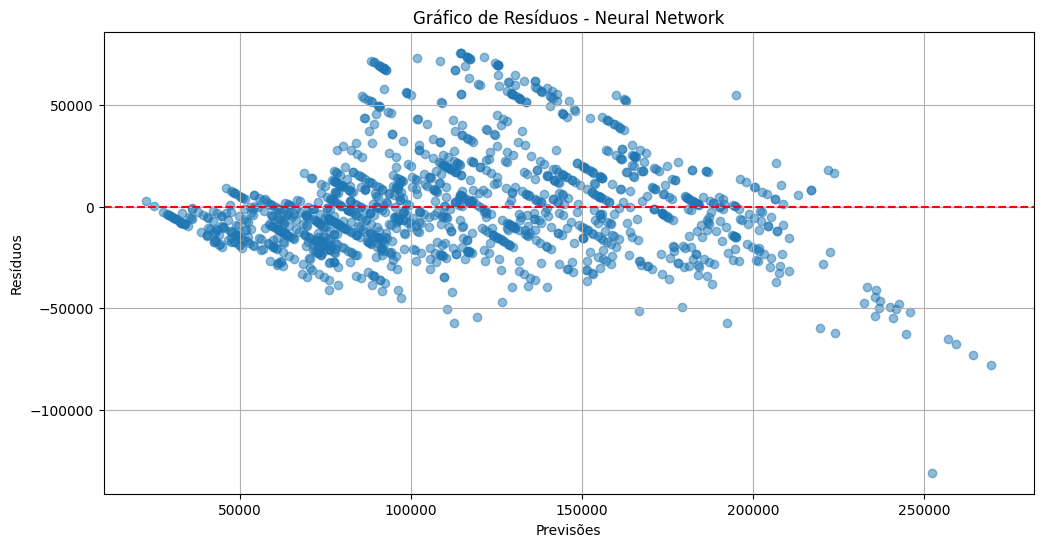

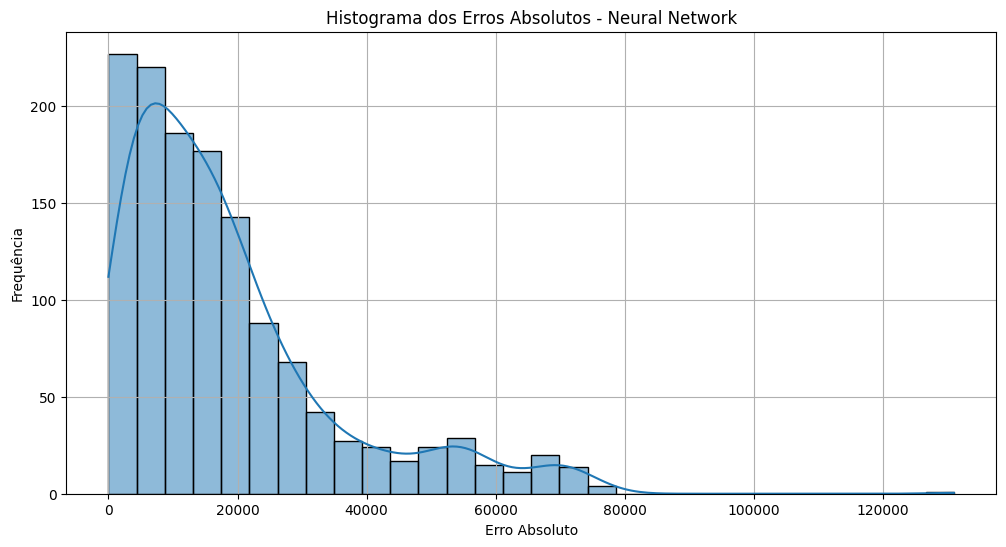


Comparação das Previsões para o Modelo Neural Network:
      Valores Reais      Previsões  Erro Absoluto
3089        88678.0   96060.366933    7382.366933
5825       160000.0  155797.694675    4202.305325
1452        80000.0   77433.987043    2566.012957
5927       120000.0  117474.750470    2525.249530
6071       215000.0  160063.063698   54936.936302
4755        57000.0   77928.166626   20928.166626
3332       120000.0  137749.635956   17749.635956
4728        55000.0   68653.137670   13653.137670
3098       121120.0  118124.469117    2995.530883
2526       126593.0  119917.574732    6675.425268


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dicionário para armazenar os modelos e seus resultados
model_results = {}

# Função para treinar e avaliar um modelo
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Armazenar os resultados e as previsões
    model_results[model_name] = {
        'MSE': mse,
        'R2': r2,
        'Predictions': predictions
    }

# Testar cada modelo
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

for model_name, model in models.items():
    evaluate_model(model, model_name)

# Mostrar os resultados de todos os modelos
print("Resultados dos Modelos:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R2']:.2f}")

# Análise e visualização das previsões de cada modelo
for model_name, metrics in model_results.items():
    predictions = metrics['Predictions']
    actual_values = y_test

    # Cálculo do erro absoluto
    absolute_errors = np.abs(predictions - actual_values)
    mean_absolute_error = np.mean(absolute_errors)

    # Plotar gráfico de dispersão das previsões vs valores reais
    plt.figure(figsize=(12, 6))
    plt.scatter(actual_values, predictions, alpha=0.5)
    plt.plot([actual_values.min(), actual_values.max()],
             [actual_values.min(), actual_values.max()],
             '--r', label='Linha de Perfeição')
    plt.title(f'Comparação entre Valores Reais e Previstos - {model_name}')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico de Resíduos
    residuals = actual_values - predictions
    plt.figure(figsize=(12, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Gráfico de Resíduos - {model_name}')
    plt.xlabel('Previsões')
    plt.ylabel('Resíduos')
    plt.grid()
    plt.show()

    # Histograma dos erros absolutos
    plt.figure(figsize=(12, 6))
    sns.histplot(absolute_errors, bins=30, kde=True)
    plt.title(f'Histograma dos Erros Absolutos - {model_name}')
    plt.xlabel('Erro Absoluto')
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

    # Exibir comparação de previsões
    comparison_df = pd.DataFrame({
        'Valores Reais': actual_values,
        'Previsões': predictions,
        'Erro Absoluto': absolute_errors
    })
    print(f"\nComparação das Previsões para o Modelo {model_name}:")
    print(comparison_df.head(10))


# Visualização do Desempenho dos Modelos de Regressão

Este código cria um gráfico para comparar o desempenho de diferentes modelos de regressão com base em duas métricas principais: Erro Quadrático Médio (MSE) e Coeficiente de Determinação (R²).

## Etapas do Código

1. **Importação de Bibliotecas**:
   - O código utiliza `matplotlib.pyplot` para a criação de gráficos e `numpy` para manipulações numéricas.

2. **Preparação dos Dados**:
   - `model_names`: Uma lista dos nomes dos modelos de regressão obtidos do dicionário `model_results`.
   - `mse_values`: Uma lista contendo os valores de MSE para cada modelo.
   - `r2_values`: Uma lista contendo os valores de R² para cada modelo.

3. **Criação do Gráfico**:
   - Um gráfico de barras é criado para representar o MSE dos diferentes modelos. A cor vermelha é utilizada para essa métrica.
   - Um segundo eixo Y é adicionado ao gráfico para representar o R², utilizando uma linha azul com marcadores para melhor visualização.

4. **Configurações do Gráfico**:
   - Os rótulos dos eixos e o título do gráfico são definidos.
   - As configurações de layout são ajustadas para garantir que os elementos do gráfico não se sobreponham.

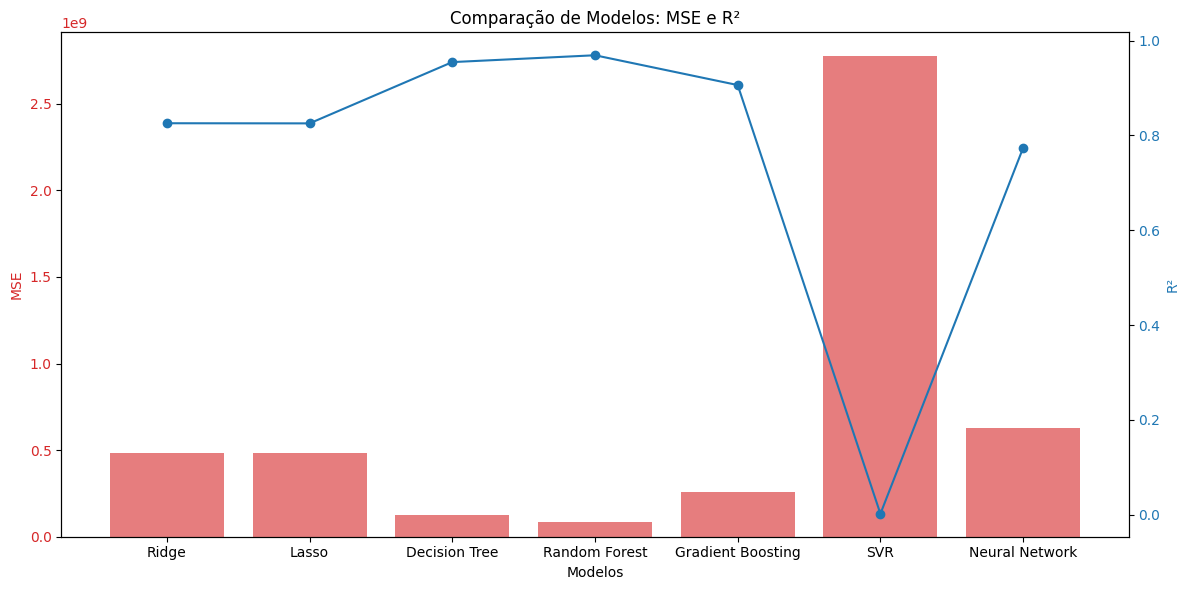

In [ ]:
# Dados para o gráfico
model_names = list(model_results.keys())
mse_values = [metrics['MSE'] for metrics in model_results.values()]
r2_values = [metrics['R2'] for metrics in model_results.values()]

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de MSE
color = 'tab:red'
ax1.set_xlabel('Modelos')
ax1.set_ylabel('MSE', color=color)
ax1.bar(model_names, mse_values, color=color, alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

# Criar um segundo eixo y para R²
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R²', color=color)
ax2.plot(model_names, r2_values, color=color, marker='o', label='R²')
ax2.tick_params(axis='y', labelcolor=color)

# Adicionar título e legendas
plt.title('Comparação de Modelos: MSE e R²')
fig.tight_layout()
plt.show()


# Análise da Distribuição dos Erros dos Modelos

Este código tem como objetivo avaliar a performance de diferentes modelos de regressão, coletando e visualizando os erros de previsão para cada modelo em comparação.

## Etapas do Código

1. **Coleta dos Erros**:
   - Para cada modelo definido no dicionário `models`, o código realiza o seguinte:
     - O modelo é ajustado (fit) com os dados de treinamento (`X_train`, `y_train`).
     - Em seguida, o modelo faz previsões sobre os dados de teste (`X_test`).
     - A diferença entre os valores reais (`y_test`) e as previsões é calculada, resultando nos erros de cada modelo. Esses erros são armazenados em uma lista chamada `errors`.

2. **Criação de um DataFrame**:
   - Um `DataFrame` chamado `error_df` é criado a partir da lista de erros. Cada linha do DataFrame corresponde aos erros de um modelo específico, e as colunas são nomeadas com os nomes dos modelos presentes no dicionário `models`.

3. **Visualização dos Erros**:
   - Um boxplot é gerado utilizando a biblioteca `seaborn` para visualizar a distribuição dos erros de cada modelo.
   - O gráfico mostra como os erros se distribuem para cada modelo, permitindo identificar a variabilidade e a presença de outliers.
   - O boxplot é rotulado com um título "Distribuição dos Erros dos Modelos", e os eixos são identificados como 'Erro' (y) e 'Modelos' (x). As marcações dos eixos x são rotacionadas em 45 graus para melhor legibilidade.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


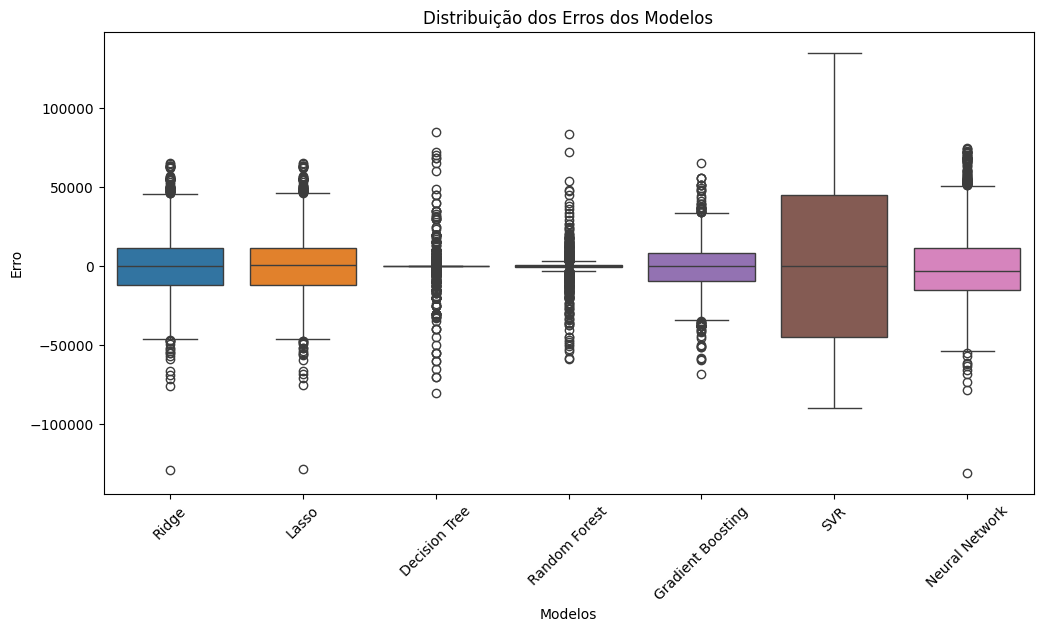

In [ ]:
# Coletar os erros de cada modelo
errors = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    errors.append(y_test - predictions)

# Criar um DataFrame para o boxplot
error_df = pd.DataFrame(errors).T
error_df.columns = models.keys()

# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=error_df)
plt.title('Distribuição dos Erros dos Modelos')
plt.ylabel('Erro')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()


# Análise do Modelo Random Forest

Este código realiza uma análise detalhada do modelo Random Forest para prever uma variável alvo. A seguir, descreve-se cada parte do código e seu propósito.

## Etapas do Código

1. **Treinamento do Modelo**:
   - O modelo Random Forest, armazenado em `models['Random Forest']`, é treinado usando os dados de treinamento (`X_train`, `y_train`).
   - Após o treinamento, o modelo realiza previsões sobre os dados de teste (`X_test`), armazenando os resultados na variável `predictions`.

2. **Importância das Características**:
   - A importância das características é obtida através do método `feature_importances_` do modelo Random Forest. Este método indica a contribuição de cada variável na previsão da variável alvo.
   - As importâncias são armazenadas em uma série do pandas, `feature_importances`, que é classificada em ordem decrescente para facilitar a visualização.

3. **Visualização das Importâncias**:
   - As 20 características mais importantes são selecionadas e plotadas em um gráfico de barras. Este gráfico ajuda a identificar quais variáveis têm maior impacto nas previsões do modelo.
   - O gráfico é rotulado com um título "Importância das Principais Variáveis - Random Forest" e eixos apropriados para melhor interpretação.

4. **Análise de Resíduos**:
   - Os resíduos (diferença entre os valores reais e as previsões) são calculados e plotados em um gráfico de dispersão. Este gráfico é útil para verificar se os erros estão aleatoriamente distribuídos. Uma linha horizontal em y=0 é adicionada para referência.
   - A visualização ajuda a identificar qualquer padrão nos resíduos que possa indicar problemas com o modelo.

5. **Comparação entre Valores Reais e Previstos**:
   - Um gráfico de dispersão é gerado para comparar os valores reais (`y_test`) com as previsões do modelo (`predictions`).
   - Uma linha de referência (reta) é traçada, indicando onde os valores previstos seriam iguais aos reais. Este gráfico ajuda a avaliar a precisão das previsões.

6. **Validação Cruzada**:
   - A validação cruzada é realizada para avaliar a robustez do modelo. O erro quadrático médio (MSE) é calculado através de validação cruzada com 3 dobras.
   - O resultado é invertido para obter o MSE positivo, que é impresso como a média do MSE de validação cruzada.

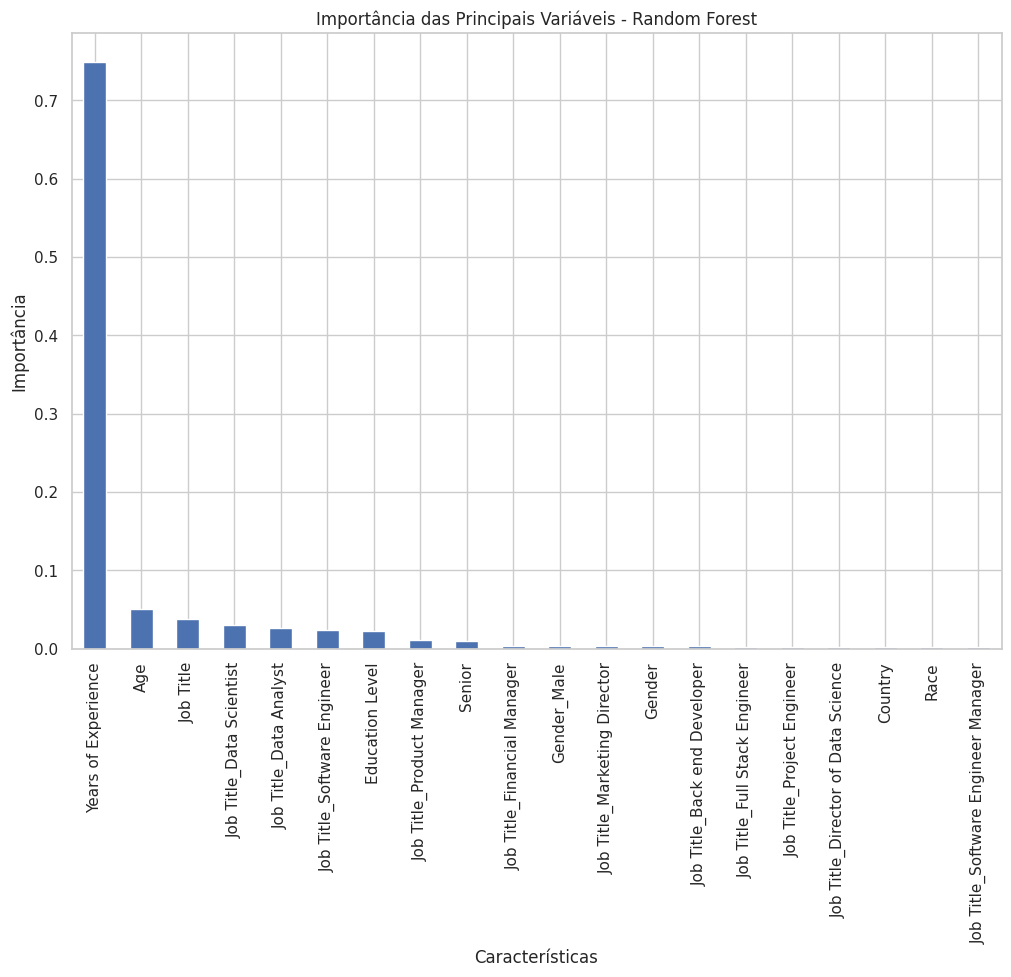

Mean Cross-Validated MSE: 793602799.52


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exemplo com o modelo Random Forest
best_model = RandomForestRegressor()  # Cria uma nova instância do modelo
best_model.fit(X_train, y_train)  # Treina o modelo
predictions = best_model.predict(X_test)  # Faz previsões

# Obtendo a importância das características do modelo
importances = best_model.feature_importances_  # Acessando as importâncias diretamente do modelo
feature_names = X.columns

# Criando um DataFrame com importâncias e nomes das características
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Selecionando as top 20 características
top_n = 20
top_features = feature_importances.head(top_n)

# Plotando as importâncias
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title("Importância das Principais Variáveis - Random Forest")
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()

# Cálculo dos resíduos
residuals = y_test - predictions

# Validação cruzada com 5 folds
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Mean Cross-Validated MSE: {mean_cv_mse:.2f}')


#Análise Comparativa de Previsões e Valores Reais utilizando Random Forest

Este código realiza uma análise visual entre os valores reais e as previsões de um modelo Random Forest para uma amostra aleatória dos dados de teste. Abaixo está uma descrição do processo e da finalidade de cada trecho do código:

1. **Seleção de Amostra Aleatória**:
   - O código utiliza a função `random.sample` para selecionar 50 índices aleatórios dos dados de teste (`y_test`). Essa amostra permite visualizar uma comparação entre as previsões e os valores reais sem sobrecarregar o gráfico com o conjunto completo de dados.

2. **Extração dos Valores Reais e das Previsões**:
   - Com os índices aleatórios, extraímos os valores reais (`y_test_sample`) e as previsões (`predictions_sample`) correspondentes. Essa amostra representa uma visão reduzida e simplificada da performance do modelo.

3. **Visualização com Gráfico de Linhas**:
   - Utilizando a biblioteca `matplotlib.pyplot`, o código gera um gráfico comparativo de linhas:
     - `plt.plot(y_test_sample.values)` plota os valores reais.
     - `plt.plot(predictions_sample)` plota as previsões do modelo Random Forest.
   - Essa visualização permite identificar de forma intuitiva a precisão das previsões do modelo ao observar como as linhas (representando os valores reais e previstos) se alinham.

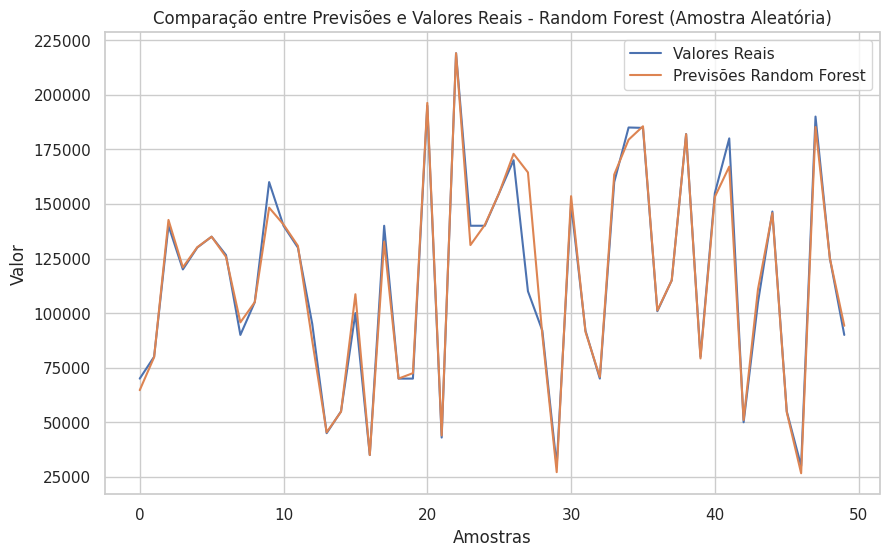

In [ ]:
import random

random_indices = random.sample(range(len(y_test)), 50)

# Extraindo os valores reais e as previsões correspondentes
y_test_sample = y_test.iloc[random_indices]
predictions_sample = predictions[random_indices]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(y_test_sample.values, label='Valores Reais')
plt.plot(predictions_sample, label='Previsões Random Forest')
plt.legend()
plt.title("Comparação entre Previsões e Valores Reais - Random Forest (Amostra Aleatória)")
plt.xlabel("Amostras")
plt.ylabel("Valor")
plt.show()

# Análise de Clustering no Dataset de Salários

Este documento descreve a análise de clustering realizada no dataset de salários, utilizando o algoritmo KMeans. O objetivo principal é identificar a estrutura dos dados em relação ao salário e à raça, e avaliar a adequação do número de clusters escolhidos. A análise é feita em três etapas principais: Método do Cotovelo, Coeficiente de Silhueta e Índice de Davies-Bouldin.

## 1. Carregamento e Preparação dos Dados

- **Carregar o dataset real**: O arquivo CSV contendo os dados de salários e raças é carregado em um DataFrame.
  
- **Codificação da Variável de Raça**: A variável categórica 'Race' é codificada em valores numéricos usando `LabelEncoder`, facilitando a análise de clustering.

- **Seleção das Colunas de Interesse**: As colunas 'Salary' e 'Race_Encoded' são selecionadas para a análise.

- **Normalização dos Dados**: Os dados são normalizados usando `StandardScaler` para garantir que todas as características contribuam igualmente para a distância calculada no clustering.

## 2. Método do Cotovelo

O Método do Cotovelo é utilizado para determinar o número apropriado de clusters (k) a serem usados no algoritmo KMeans. O objetivo é identificar o ponto em que a soma das distâncias ao quadrado (WCSS) começa a se estabilizar.

- **Cálculo do WCSS**: Para cada valor de k (número de clusters variando de 1 a 4), o WCSS é calculado e armazenado.

- **Visualização**: Um gráfico é gerado para visualizar a relação entre o número de clusters e o WCSS, ajudando a identificar o "cotovelo" que indica o número ideal de clusters.

## 3. Coeficiente de Silhueta

O Coeficiente de Silhueta mede a qualidade do clustering, indicando o quão bem cada ponto está posicionado em relação ao seu próprio cluster versus os outros clusters.

- **Cálculo do Coeficiente de Silhueta**: Para cada valor de k (variando de 2 a 4), o coeficiente de silhueta é calculado e armazenado.

- **Visualização**: Um gráfico é gerado para visualizar a variação do coeficiente de silhueta em relação ao número de clusters. Um valor mais alto indica um melhor agrupamento.

## 4. Índice de Davies-Bouldin

O Índice de Davies-Bouldin avalia a separação e a compactação dos clusters, sendo um índice mais baixo melhor para a qualidade do clustering.

- **Cálculo do Índice de Davies-Bouldin**: Para cada valor de k (variando de 2 a 4), o índice é calculado e armazenado.

- **Visualização**: Um gráfico é gerado para mostrar a relação entre o número de clusters e o índice de Davies-Bouldin, onde valores mais baixos indicam uma melhor definição dos clusters.

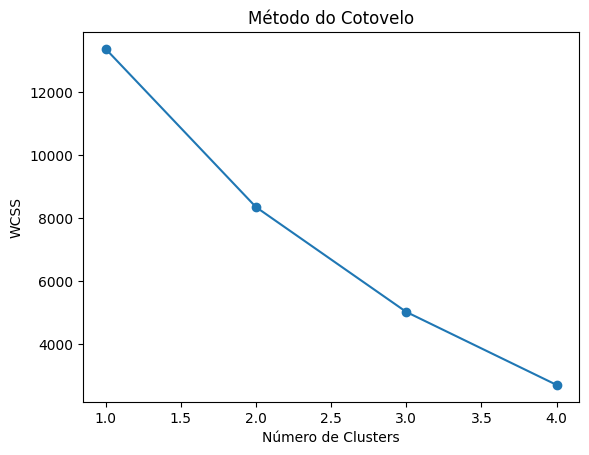

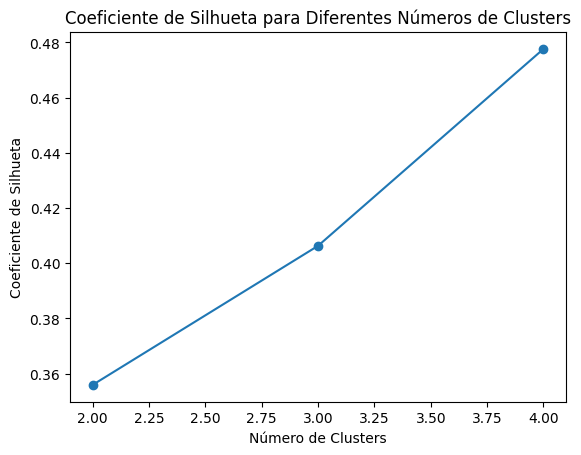

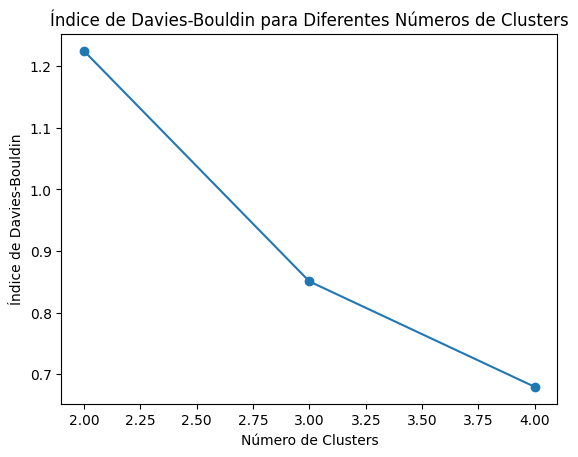

In [ ]:
# Carregar o dataset real
df = pd.read_csv('/content/drive/MyDrive/Fernando/Curso ciencia de dados/trabalho_final/Salary.csv')

# Codificar a variável de raça para valores numéricos
label_encoder = LabelEncoder()
df['Race_Encoded'] = label_encoder.fit_transform(df['Race'])

# Selecionar as colunas de interesse
data_for_clustering = df[['Salary', 'Race_Encoded']]

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.plot(range(1, 5), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plotar o gráfico do Coeficiente de Silhueta
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.show()

from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for i in range(2, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    davies_bouldin_scores.append(davies_bouldin_score(data_scaled, labels))

# Plotar o gráfico do Índice de Davies-Bouldin
plt.plot(range(2, 5), davies_bouldin_scores, marker='o')
plt.title('Índice de Davies-Bouldin para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Davies-Bouldin')
plt.show()


# Análise de Clustering de Salário por Raça

Este documento descreve a análise de clustering realizada em um dataset de salários, utilizando o algoritmo KMeans. O objetivo é identificar grupos de dados em relação ao salário e à raça, analisando a média salarial por cluster.

## 1. Importação das Bibliotecas Necessárias

O código importa as bibliotecas necessárias para processamento de dados e visualização:
- `LabelEncoder` e `StandardScaler` da biblioteca `sklearn` para codificação e normalização dos dados.
- `KMeans` para aplicar o algoritmo de clustering.
- `pandas` para manipulação de dados.
- `matplotlib` e `seaborn` para visualização.

## 2. Carregamento e Preparação dos Dados

- **Carregar o Dataset**: O arquivo CSV é carregado em um DataFrame, onde cada linha representa um registro de salário e raça.

- **Codificação da Variável de Raça**: A variável categórica 'Race' é convertida em valores numéricos utilizando `LabelEncoder`. Isso é importante para permitir que o algoritmo KMeans trabalhe com dados numéricos.

- **Normalização dos Dados de Salário**: Os valores de salário são normalizados com `StandardScaler`, que transforma os dados para que tenham média 0 e desvio padrão 1. Isso é fundamental para garantir que o KMeans não seja influenciado por escalas de diferentes variáveis.

## 3. Aplicação do Algoritmo de Clustering KMeans

- O algoritmo KMeans é aplicado ao conjunto de dados normalizados, especificando 3 clusters. O resultado é armazenado em uma nova coluna chamada 'Cluster' no DataFrame.

## 4. Visualização dos Clusters

- Um gráfico de dispersão é gerado para visualizar a distribuição dos dados em relação ao salário e à raça, com os pontos coloridos de acordo com os clusters identificados. Isso permite uma análise visual de como os dados estão agrupados.

## 5. Mapeamento de Raça Codificada para Raça Original

- Um dicionário de mapeamento é criado para relacionar os códigos numéricos de raça aos nomes originais. Isso facilita a interpretação dos resultados.

## 6. Análise da Média Salarial por Cluster e Raça

- A média salarial é calculada para cada cluster e cada raça. A análise é feita agrupando os dados por 'Cluster' e 'Race_Encoded', e a média dos salários é computada.

- O resultado é impresso, mostrando a média salarial por cluster, juntamente com a raça correspondente (decodificada).

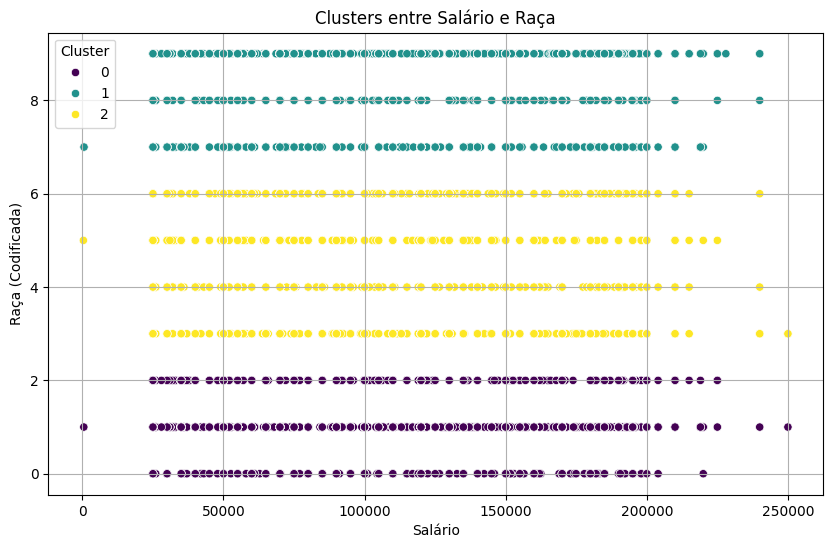

Mapeamento de Raça Codificada para Raça Original:
Codificação 0: African American
Codificação 1: Asian
Codificação 2: Australian
Codificação 3: Black
Codificação 4: Chinese
Codificação 5: Hispanic
Codificação 6: Korean
Codificação 7: Mixed
Codificação 8: Welsh
Codificação 9: White

Análise de Salário Médio por Cluster e Raça:
   Cluster      Race_Decoded         Salary
0        0  African American  112355.284091
1        0             Asian  115246.048780
2        0        Australian  114236.676991
3        1             Mixed  116330.859281
4        1             Welsh  112560.645646
5        1             White  117042.938682
6        2             Black  118415.627586
7        2           Chinese  111248.316027
8        2          Hispanic  110410.139752
9        2            Korean  117099.757112


In [ ]:
# Importar as bibliotecas necessárias
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Fernando/Curso ciencia de dados/trabalho_final/Salary.csv')

# Codificar a variável de raça
label_encoder = LabelEncoder()
df['Race_Encoded'] = label_encoder.fit_transform(df['Race'])

# Normalizar os dados de Salário
scaler = StandardScaler()
df['Salary_Scaled'] = scaler.fit_transform(df[['Salary']])

# Aplicar o algoritmo de clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Salary_Scaled', 'Race_Encoded']])

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='Race_Encoded', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters entre Salário e Raça')
plt.xlabel('Salário')
plt.ylabel('Raça (Codificada)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Mapeamento de Raça Codificada para Raça Original
race_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Exibir o mapeamento e a análise dos clusters
print("Mapeamento de Raça Codificada para Raça Original:")
for code, race in race_mapping.items():
    print(f"Codificação {code}: {race}")

# Analisar a média do salário por cluster e raça
cluster_analysis = df.groupby(['Cluster', 'Race_Encoded']).agg({'Salary': 'mean'}).reset_index()
cluster_analysis['Race_Decoded'] = cluster_analysis['Race_Encoded'].map(race_mapping)
print("\nAnálise de Salário Médio por Cluster e Raça:")
print(cluster_analysis[['Cluster', 'Race_Decoded', 'Salary']].sort_values(by='Cluster'))

# Análise de Clustering entre Anos de Experiência e Nível de Educação

Este documento descreve o processo de clustering realizado em um conjunto de dados que relaciona anos de experiência e nível de educação. O objetivo é identificar grupos de funcionários com características semelhantes.

## 1. Seleção das Colunas de Interesse

- **Selecionar Colunas**: O código seleciona as colunas 'Years of Experience' (Anos de Experiência) e 'Education Level' (Nível de Educação) do DataFrame `df`, que serão usadas para análise.

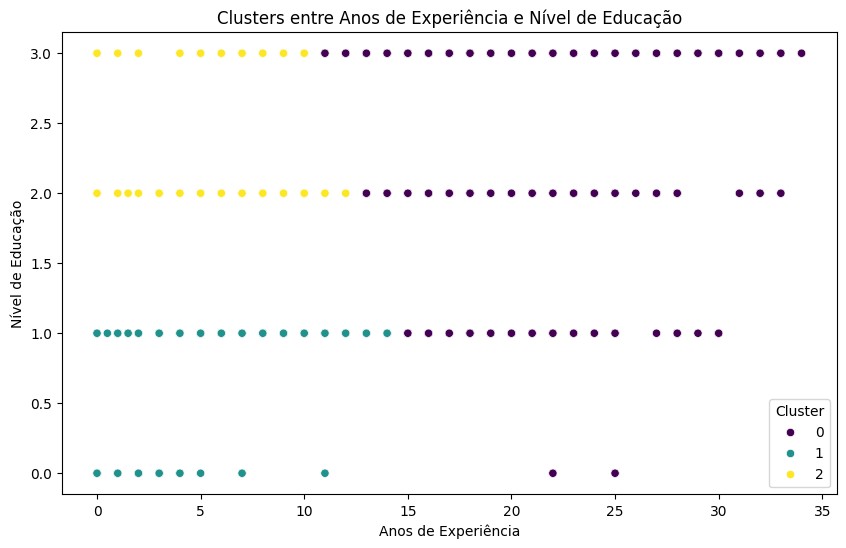

                              Years of Experience  Education Level
Cluster_Experience_Education                                      
0                                       16.516477         2.539245
1                                        4.252270         0.869249
2                                        7.233197         2.182350


In [ ]:
# Selecionar as colunas de interesse
data_for_clustering = df[['Years of Experience', 'Education Level']]

# Normalizar os dados
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar o algoritmo de clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Experience_Education'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Education Level', hue='Cluster_Experience_Education', data=df, palette='viridis')
plt.title('Clusters entre Anos de Experiência e Nível de Educação')
plt.xlabel('Anos de Experiência')
plt.ylabel('Nível de Educação')
plt.legend(title='Cluster')
plt.show()

# Analisar os clusters
print(df.groupby('Cluster_Experience_Education')[['Years of Experience', 'Education Level']].mean())


# Análise de Clustering entre Idade e Salário

Este documento descreve o processo de clustering realizado em um conjunto de dados que relaciona idade e salário. O objetivo é identificar grupos de funcionários com características semelhantes com base em sua idade e faixa salarial.

## 1. Seleção das Colunas de Interesse

- **Selecionar Colunas**: O código seleciona as colunas 'Age' (Idade) e 'Salary' (Salário) do DataFrame `df`, que serão usadas para análise.

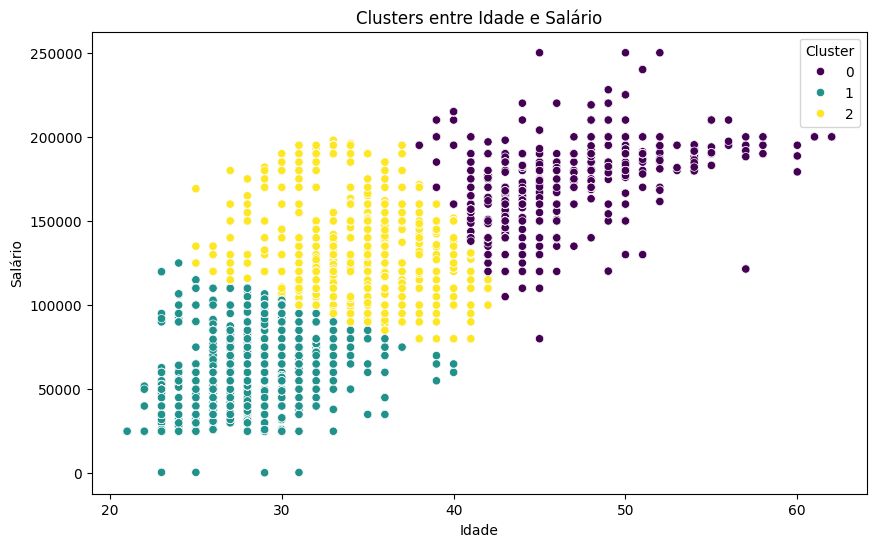

                          Age         Salary
Cluster_Age_Salary                          
0                   45.822254  176541.091763
1                   27.708512   63091.542918
2                   33.451278  139766.906550


In [ ]:
# Selecionar as colunas de interesse
data_for_clustering = df[['Age', 'Salary']]

# Normalizar os dados
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar o algoritmo de clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Age_Salary'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', hue='Cluster_Age_Salary', data=df, palette='viridis')
plt.title('Clusters entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend(title='Cluster')
plt.show()

# Analisar os clusters
print(df.groupby('Cluster_Age_Salary')[['Age', 'Salary']].mean())


# Análise de Clustering entre Salário e Gênero

Este documento descreve o processo de clustering realizado em um conjunto de dados que relaciona salário e gênero. O objetivo é identificar grupos de funcionários com características semelhantes com base em seu gênero e faixa salarial.

## 1. Codificação da Variável de Gênero

- **Codificação**: A variável de gênero é convertida para valores numéricos usando o `LabelEncoder`. Essa transformação é essencial para que o algoritmo de clustering possa trabalhar com dados categóricos.

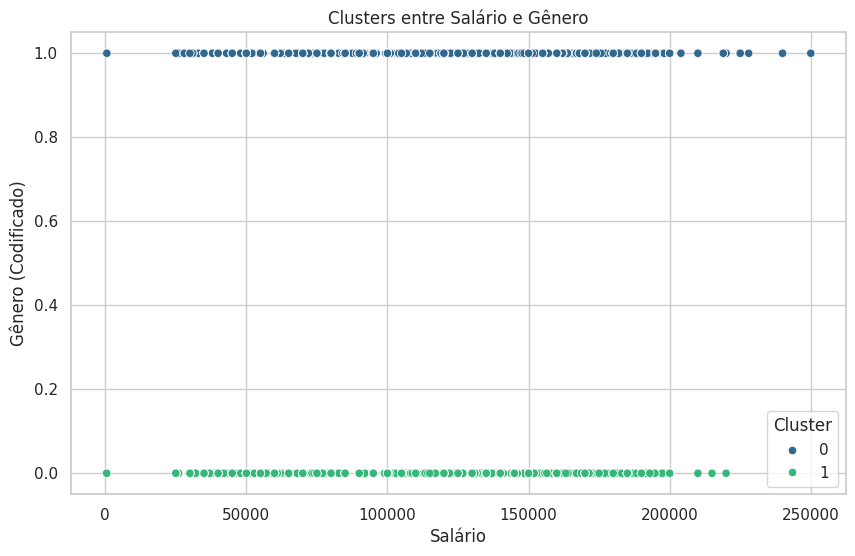

                              Salary  Gender_Encoded
Cluster_Gender_Salary                               
0                      121395.697630             1.0
1                      107888.998672             0.0
Mapeamento de Gênero Codificado para Gênero Original:
Codificação 0: Female
Codificação 1: Male


In [ ]:
# Codificar a variável de gênero para valores numéricos
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

# Selecionar as colunas de interesse
data_for_clustering = df[['Salary', 'Gender_Encoded']]

# Normalizar os dados
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar o algoritmo de clustering KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_Gender_Salary'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='Gender_Encoded', hue='Cluster_Gender_Salary', data=df, palette='viridis')
plt.title('Clusters entre Salário e Gênero')
plt.xlabel('Salário')
plt.ylabel('Gênero (Codificado)')
plt.legend(title='Cluster')
plt.show()

# Analisar os clusters
print(df.groupby('Cluster_Gender_Salary')[['Salary', 'Gender_Encoded']].mean())

# Exibir o mapeamento de cada código de gênero para o gênero original
gender_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Mapeamento de Gênero Codificado para Gênero Original:")
for code, gender in gender_mapping.items():
    print(f"Codificação {code}: {gender}")